<div style="border-radius:1px;
            border : black solid;
            background-color: DodgerBlue;
            font-size:150%;
            font-family: Times;
            text-align: right">

<h1 style='; border:0; border-radius: 1px; text-shadow: 1px 1px black; font-weight: bold; color:white'><center> HOUSE PRICES - MACHINE LEARNING </center></h1>

<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:DodgerBlue; font-family:Times;color:#FFFFFF;font-size:150%;text-align:center;border-radius:1px 1px;">INTRODUCTION</p>

When buying a house, buyers look at various factors other than just an appealing outlook of a house. These factors for example are, the height of the basement ceiling, the neighborhood style, the condtion of the house and the proximity to a proper public transport system. A combination of such factors help to determine the price of a house and these factors have been given in a dataset comprising of 81 explanatory variables. This dataset describes every aspect of residential homes in Ames, Iowa. Therefore, the given data will be explored to draw insights about what influnces prices for different houses in this town. The main factors influencing the negotiation of prices of houses in Ames, Iowa will be extracted using feature engineering. Finally, a prediction model for prediting house prices will be developed using machine learning.


**Work flow** 
- Import libraries
- Read and check the data
- Data exploration
- Data wrangling
- Feature engineering
- Data training
- Data preditions
- Results submission

<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:DodgerBlue; font-family:Times;color:#FFFFFF;font-size:150%;text-align:center;border-radius:1px 1px;">IMPORT LIBRARIES</p>

In [1]:
# Data loading, data check-ups and wrangling
import pandas as pd
import numpy as np

# Data exploration - graphical presentations and analysis
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, norm
from scipy import stats

# Feature engineering and data wrangling
from sklearn import preprocessing
from sklearn.feature_selection import chi2
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import RFE

# Machine learning
from sklearn import preprocessing
from xgboost import XGBRegressor
import sklearn.metrics as metrics
from sklearn.metrics import make_scorer
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error

<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:DodgerBlue; font-family:Times;color:#FFFFFF;font-size:150%;text-align:center;border-radius:1px 1px;">DATA READING AND SIMPLE CHECK UPS</p>

In [2]:
# Read train data
train_df = pd.read_csv('train.csv')
# Read test data
test_df = pd.read_csv('test.csv')

In [3]:
# Check the sizes of the train and test data sets
print("Train data set size:", train_df.shape)
print("Test data set size:", test_df.shape)

Train data set size: (1460, 81)
Test data set size: (1459, 80)


In [4]:
# Check the first five values of the train data set
train_df.head().style.background_gradient(axis=0, gmap=train_df['SalePrice'], cmap='Blues')

In [5]:
# Identify the train data types
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

The given data is a mixture of integers, objects and floating point data types. It also seems to have a lot of missing values but these will be handled in another section of this notebook.

In [6]:
# Separate the data set to include numerical data only
numerical_df = train_df.select_dtypes(include=[np.number])
numerical_df = numerical_df.drop(['Id'], axis = 1)

# Show the first five values of the numerical data
numerical_df.head().style.background_gradient(axis=0, gmap=train_df['SalePrice'], cmap='Blues')

In [7]:
# Identify the titles of numerical features
numerical_features = numerical_df.columns
numerical_features

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [8]:
# Separate the data set to include categorical data only
categorical_df = train_df.select_dtypes(exclude=[np.number])

# Show the first five values of the categorical data
categorical_df.head()

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1  ... GarageType GarageFinish GarageQual GarageCond  \
0      CollgCr       Norm  ...     Attchd          RFn         TA         TA   
1      Veenker      Feedr  ...     Attchd          RFn         TA         TA   
2      CollgCr       Norm  ...     Attchd          RFn         TA         TA   
3      Crawfor       Norm  ...     Detchd          Unf         TA         TA   
4      NoRidge       Norm  ...     Attchd          RFn         TA         TA   

  PavedDrive PoolQC Fence MiscFeature SaleType SaleCondition  
0          Y    NaN   NaN         NaN       WD        Normal  
1          Y    NaN   NaN         NaN       WD        Normal  
2          Y    NaN   NaN         NaN       WD        Normal  
3          Y    NaN   NaN         NaN       WD       Abnorml  
4          Y    NaN   NaN         NaN       WD        Normal  

[5 rows x 43 columns]

In [9]:
# Identify the titles of categorical features
categorical_features = categorical_df.columns
categorical_features

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:DodgerBlue; font-family:Times;color:#FFFFFF;font-size:150%;text-align:center;border-radius:1px 1px;">DATA EXPLORATION</p>

Below is an exploration of the numerical data. Statistics of the data such as standard deviation, the mean values and the quantiles of data values will be identified and discussed. Also the distrbution of the numerical data as well as relationships among the given numerical variables will be shown and explained.

In [10]:
# Check the statistics in the numerical data set
numerical_df.describe().T.style.background_gradient(cmap = "Blues") 

A summary showing a discussion of the statitics indicated above is highlighted below:

- The target variable ***SalePrice*** has the highest standard deviation (79442.503) in the data set. This because the difference in the minimum and maxmimum prices is very large which is a normal occurance in the real world as prices of houses vary greatly depending the different factors which can be seen in the already given data set. As such, this variable is expected to be either positively or negatively skewed and to have outliers.
- Amongst the features, the standard deviation is also relatively higher in almost all features with ***LotArea*** having the highest value of 9981.265. However, standard deviation is seen to be lower in the variables such as ***OverallQual***, ***OverallCond***, ***MoSold***, and ***YrSold***. Therefore, in such variables, the data skewness is expected to be lower as well as the number of outliers.
- The oldest building was built in the year 1872 and the newest building was built in the year 2010.
- One building was last remodeled in the year 1950 which is the oldest year to remodel a building in this data set. The recent remodelling of a building was done in the year 2010.
- The oldest garage among these houses was built in the year 1900 while the recently built garage was done in the year 2010.
- Most of the houses were sold in the month of August and in the year 2009 as this data falls in the 75 % quantile.
- The cheapest house was sold at 34 900 dollars while the most expesive was sold at the price of 755 000 dollars.

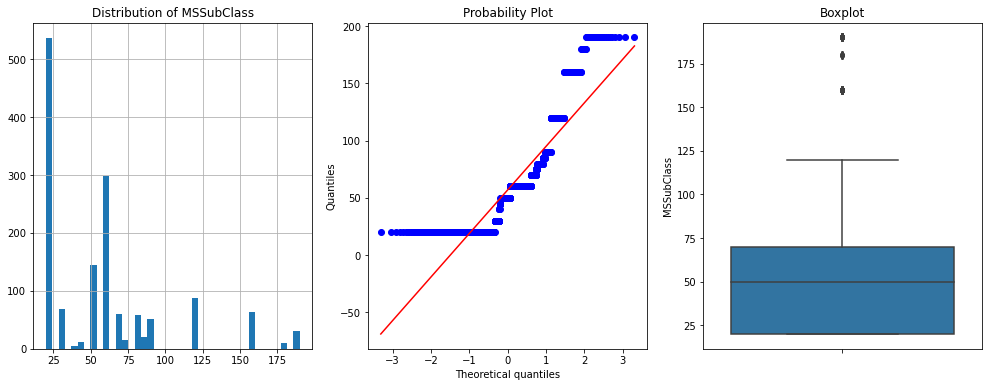

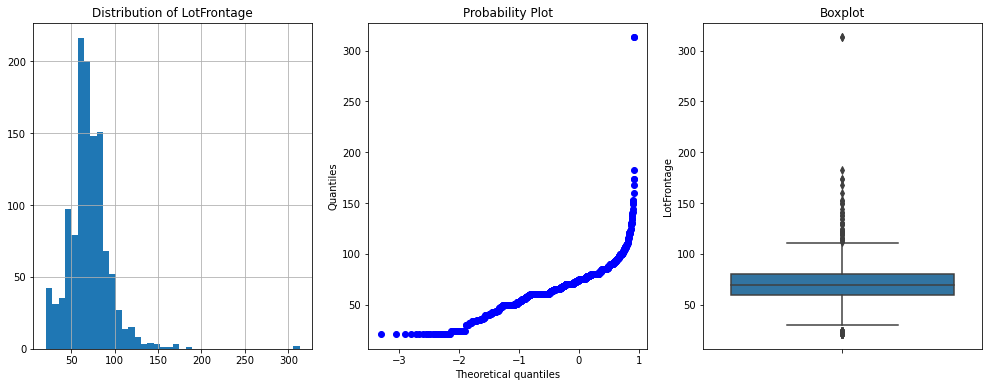

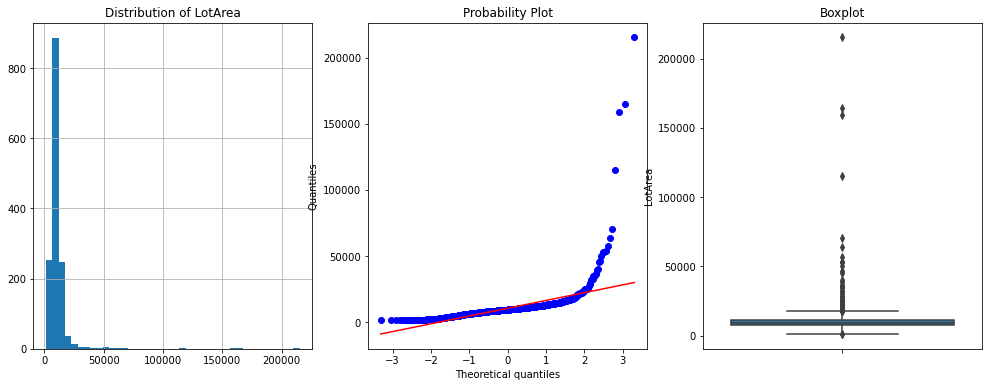

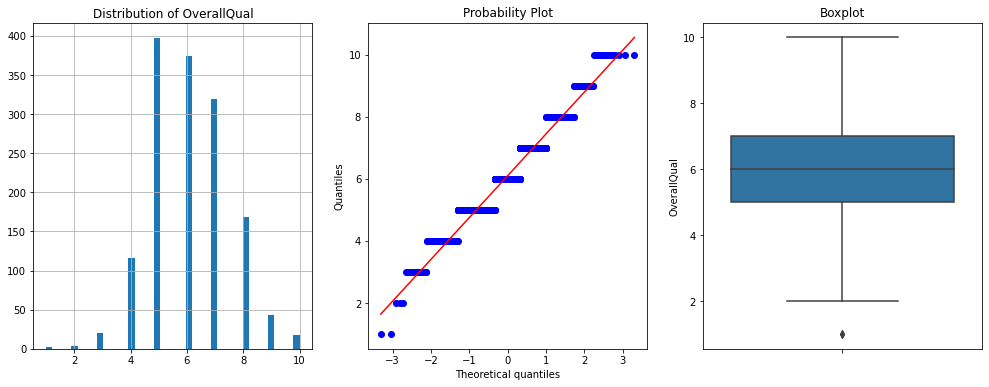

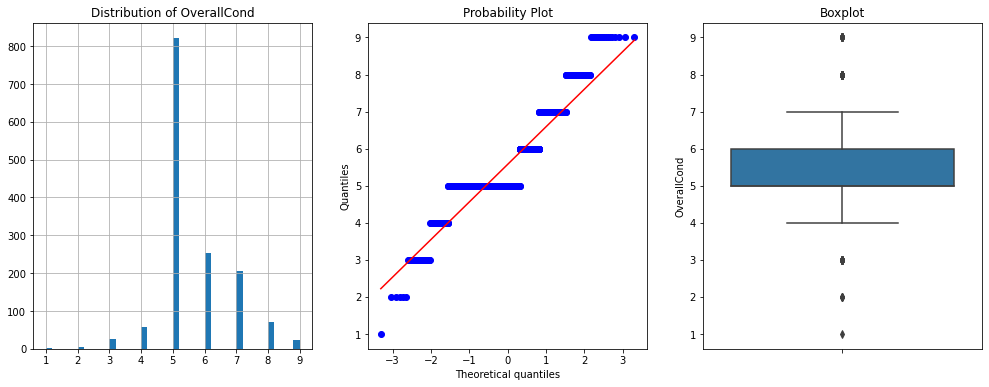

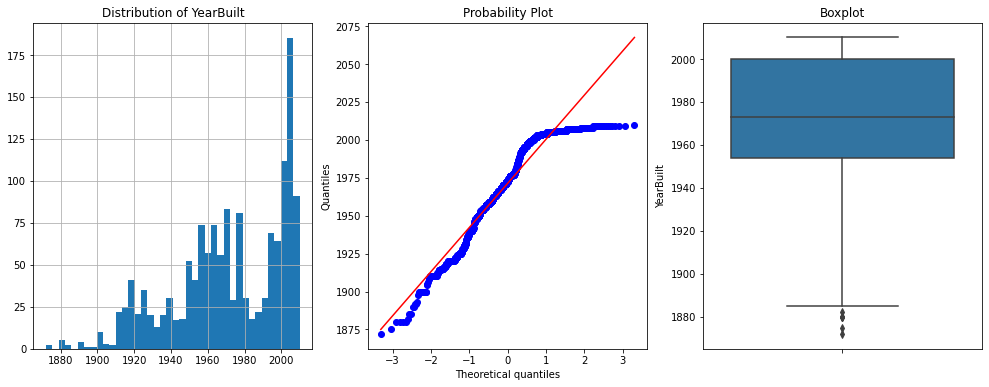

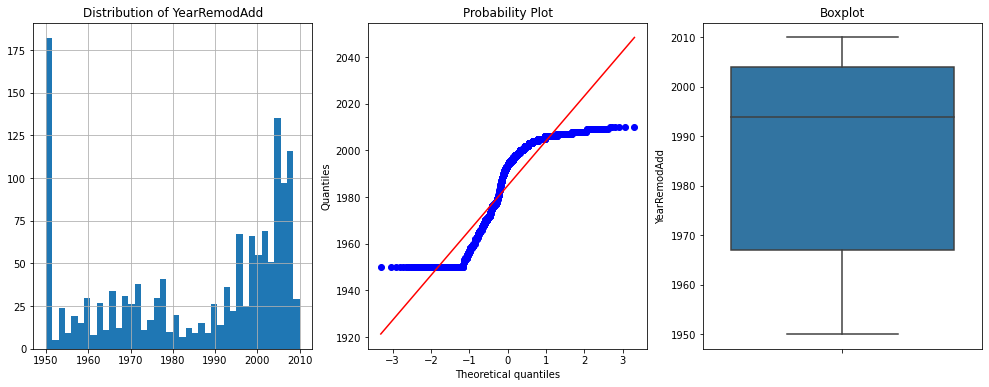

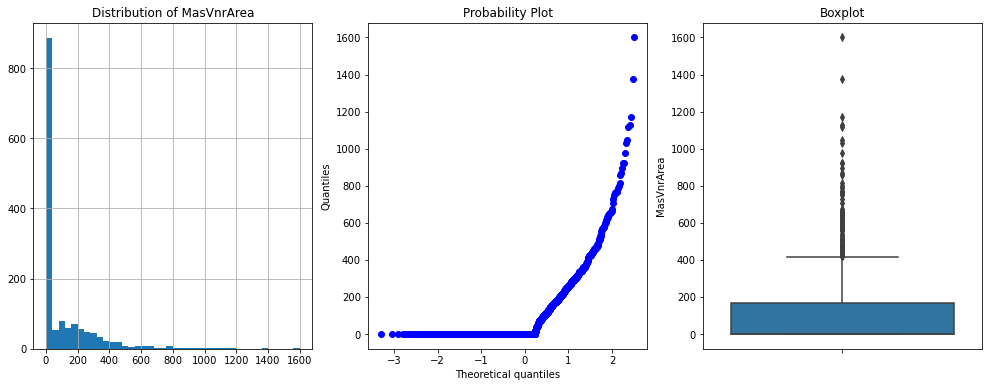

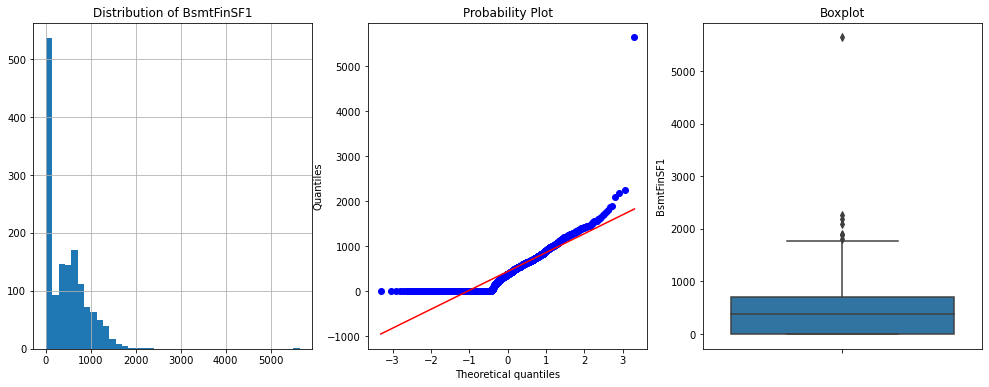

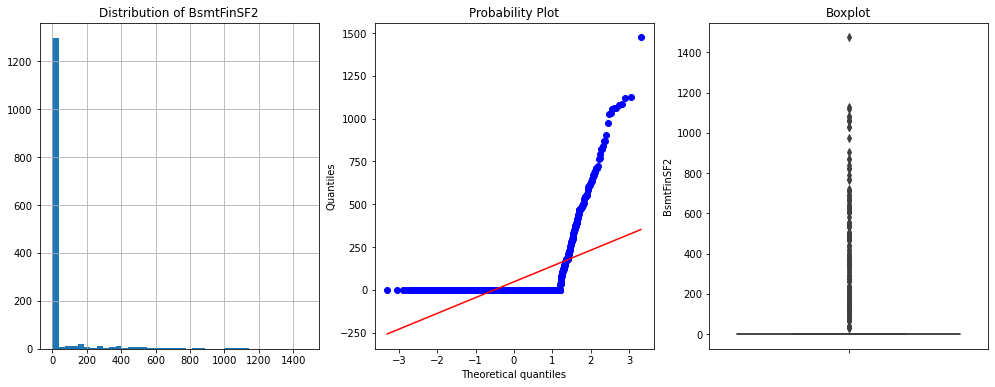

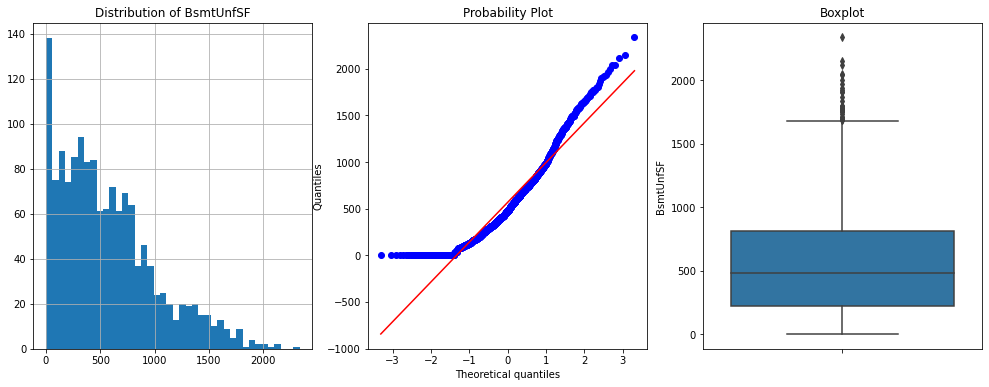

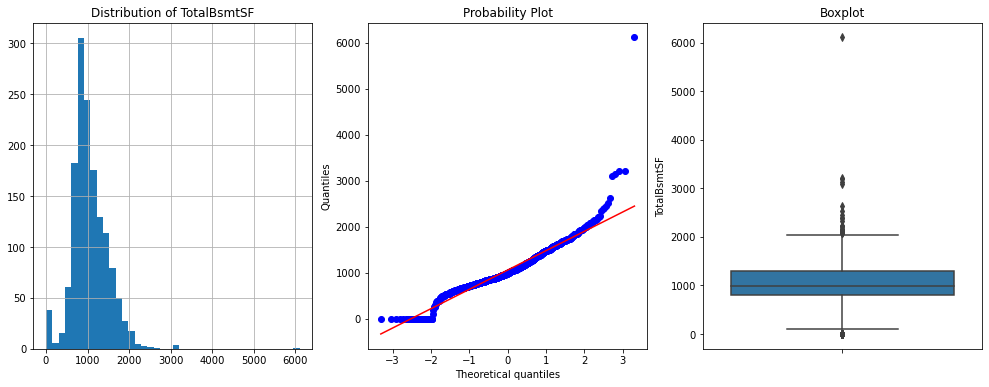

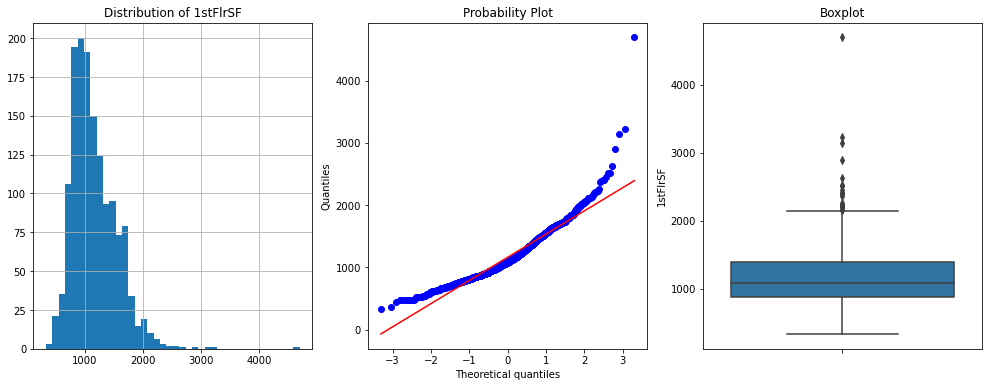

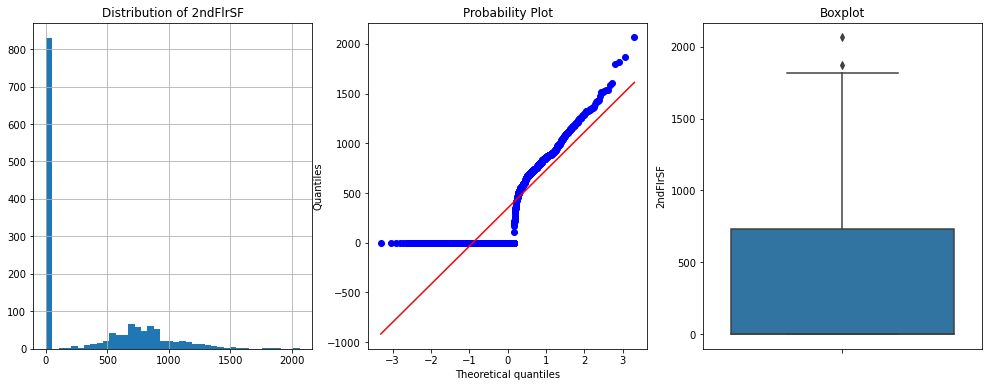

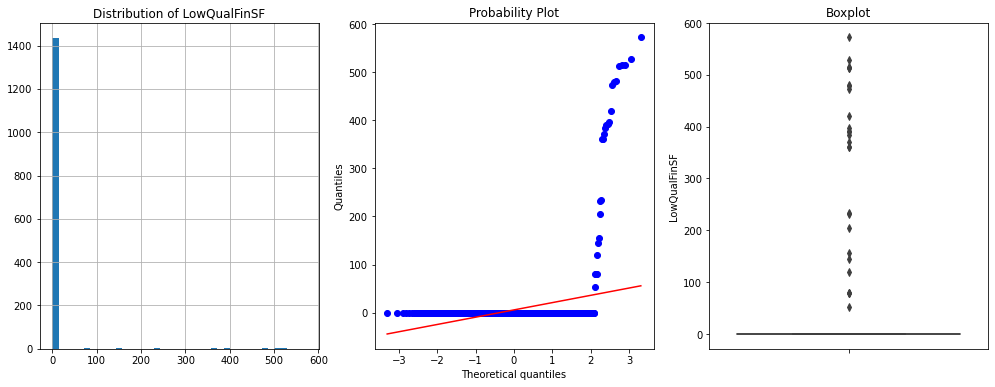

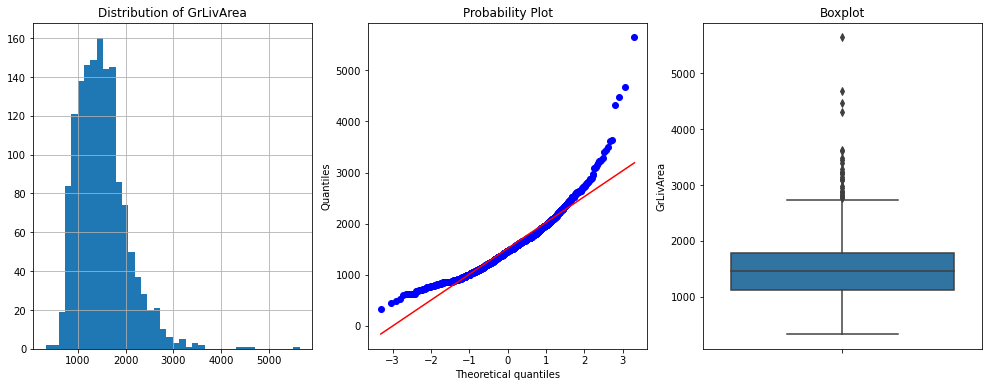

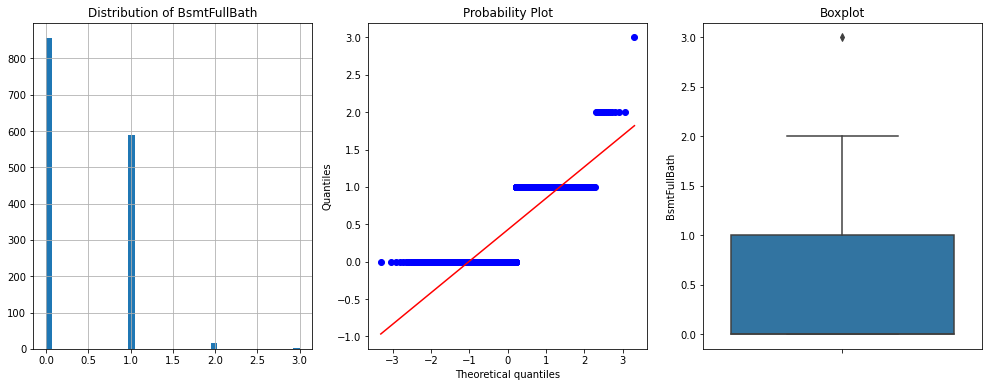

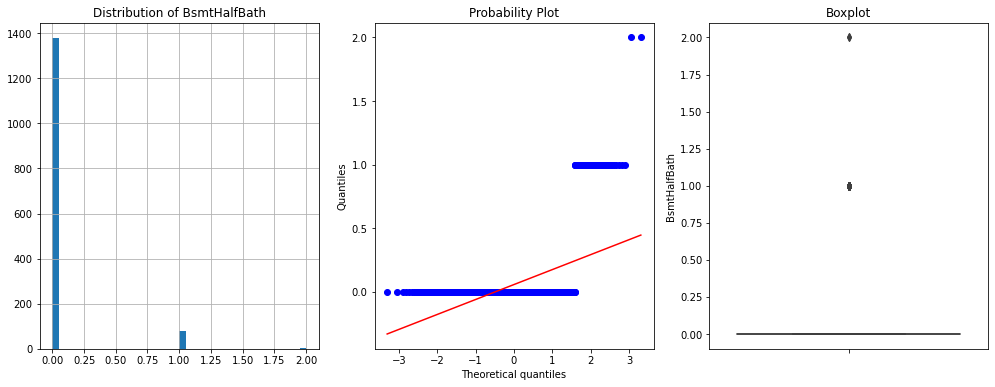

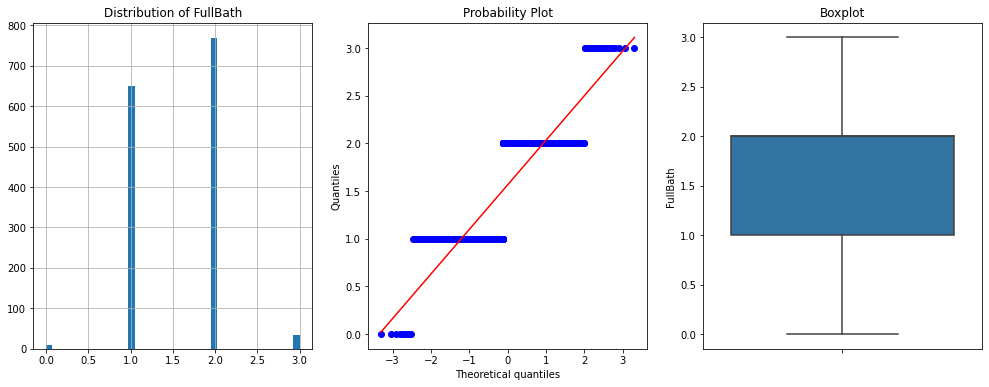

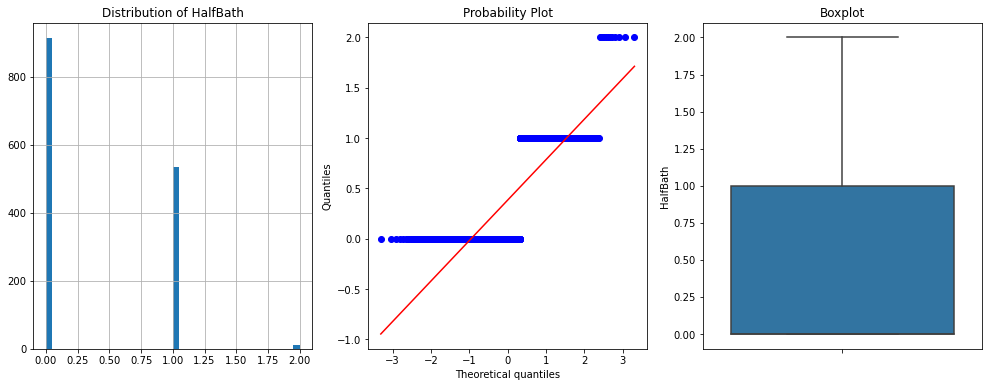

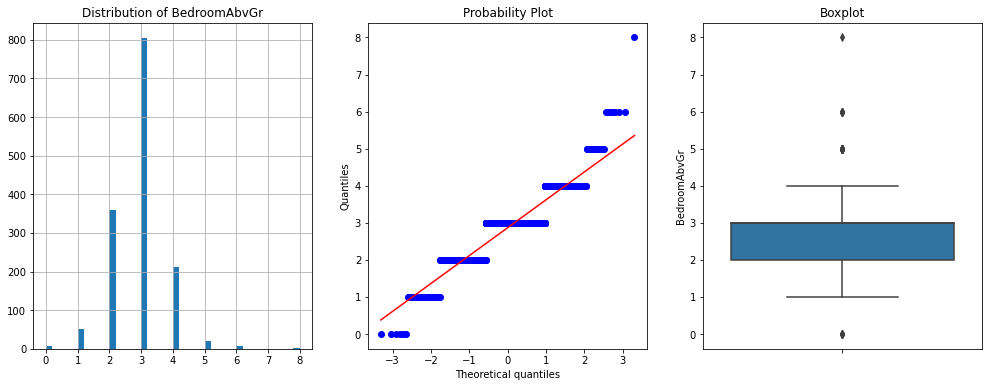

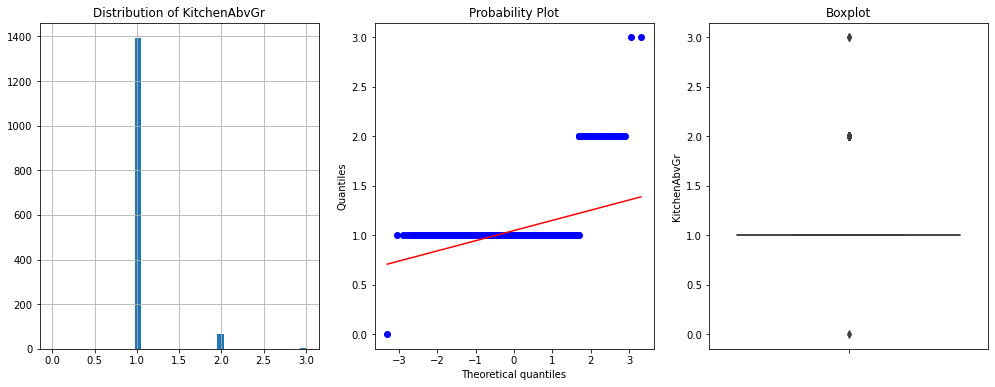

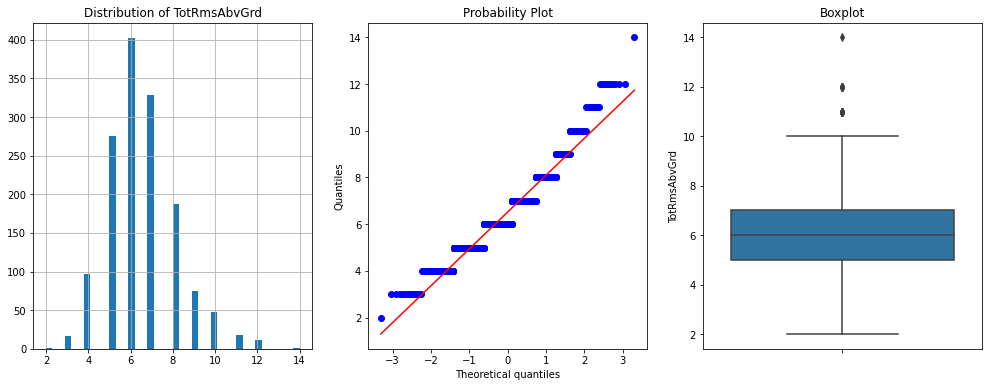

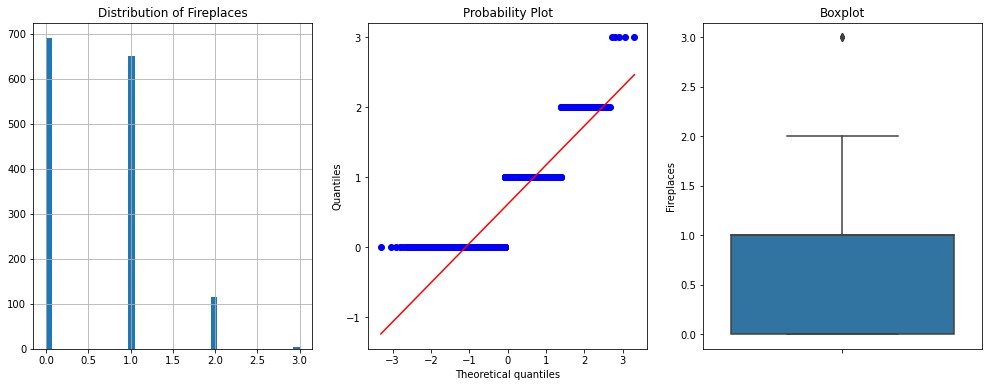

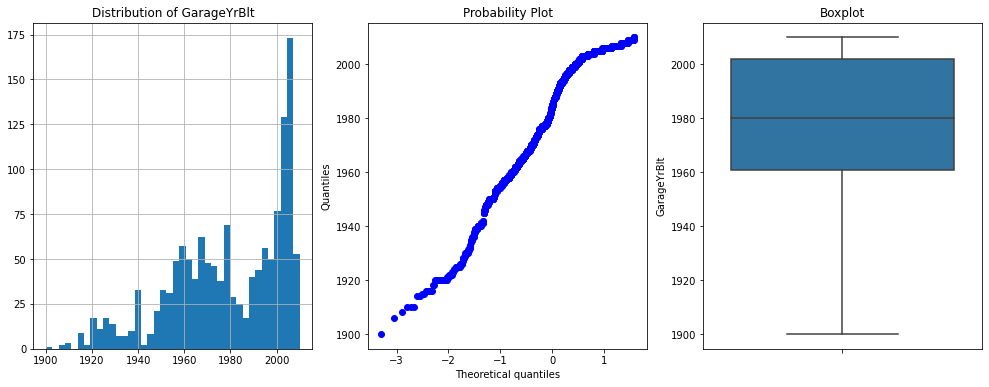

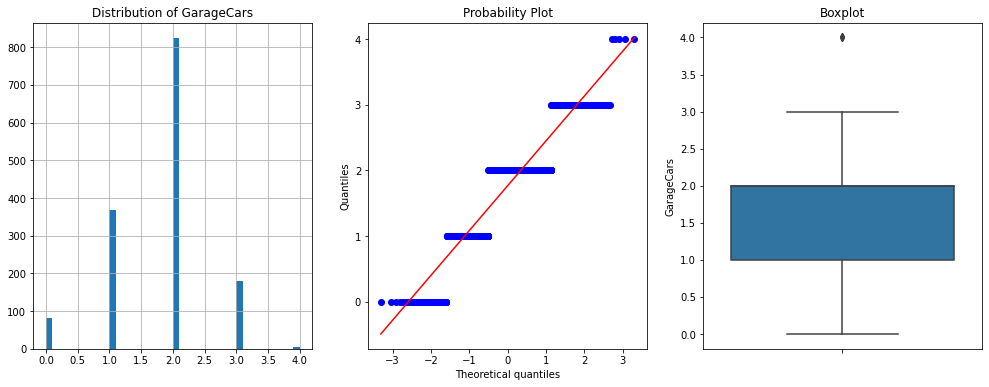

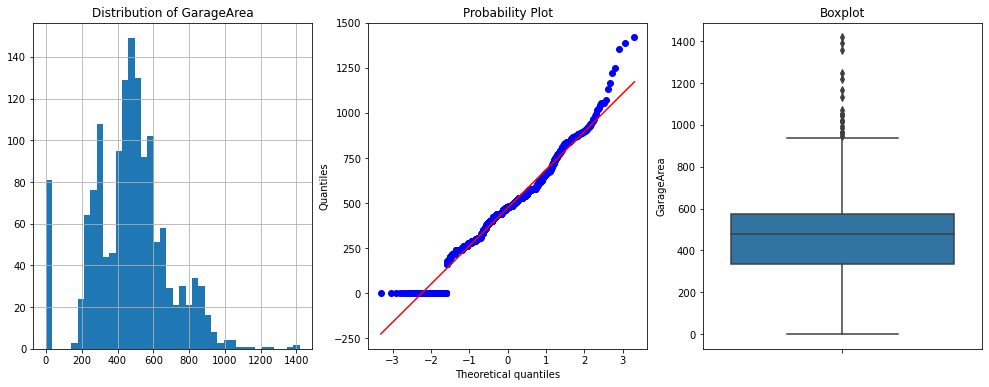

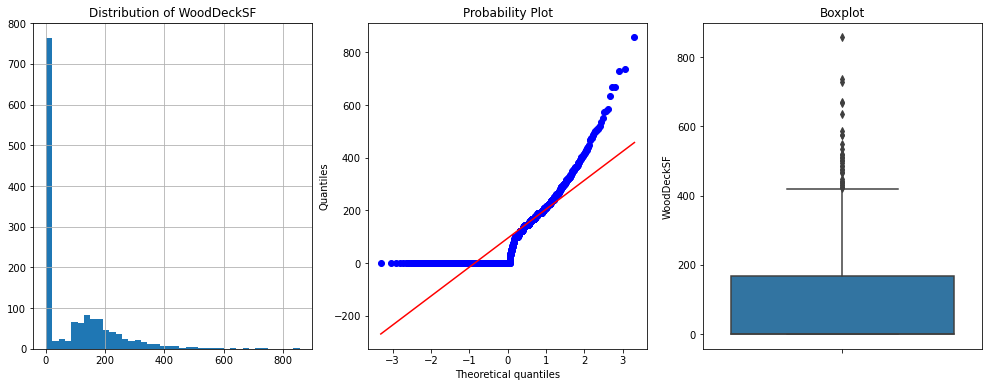

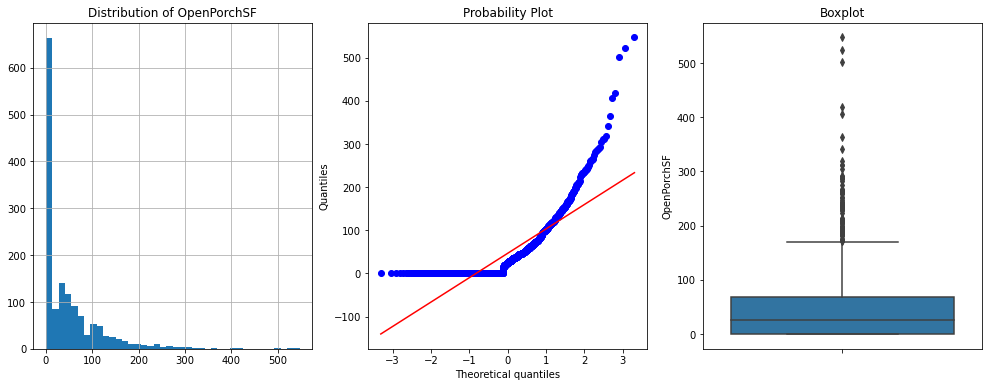

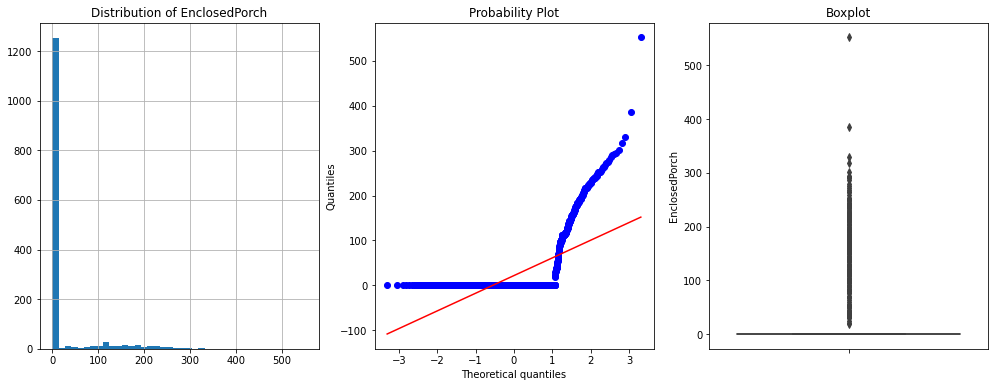

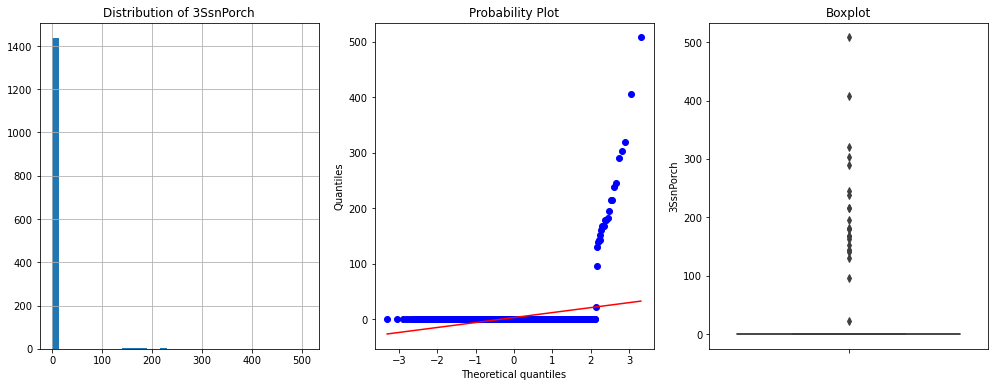

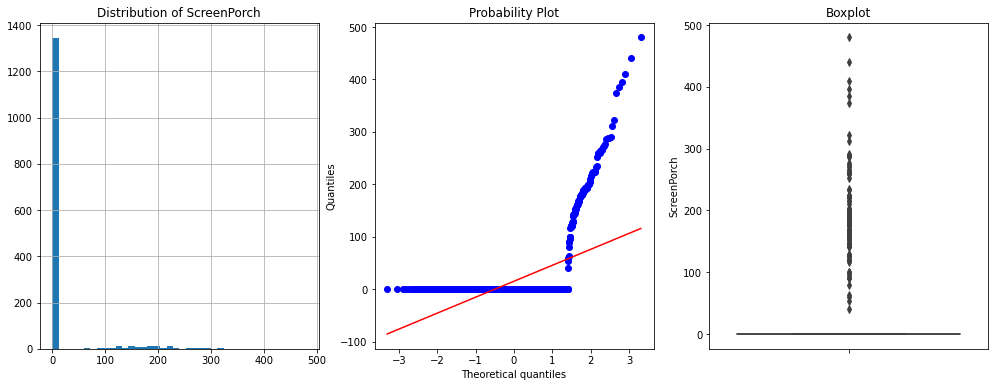

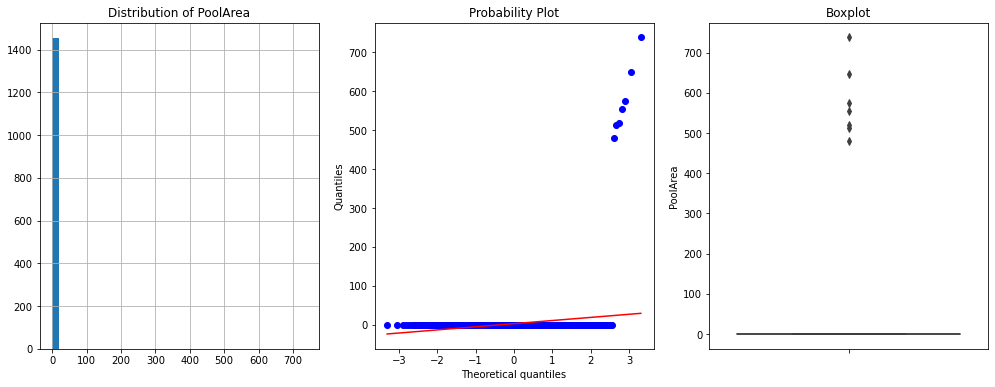

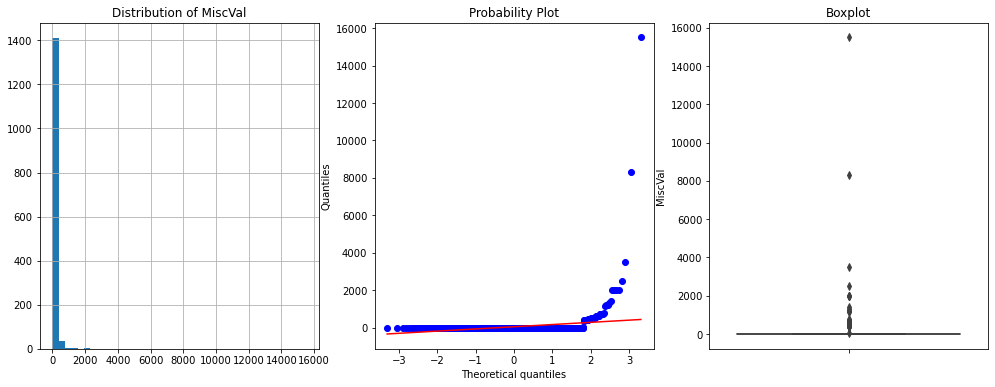

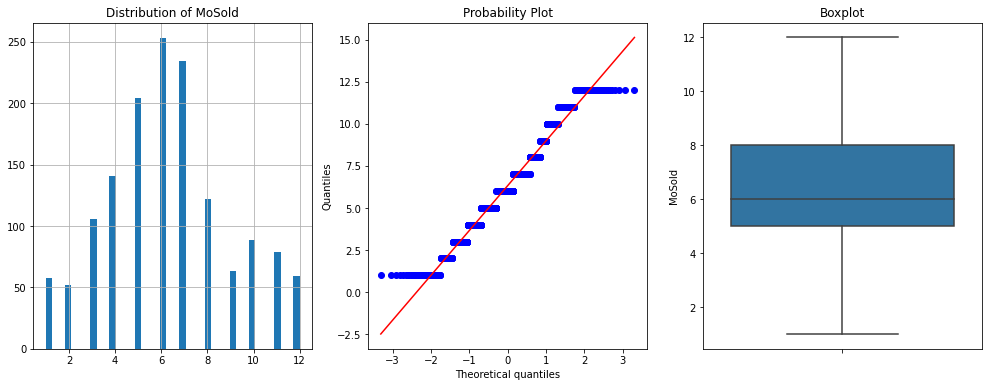

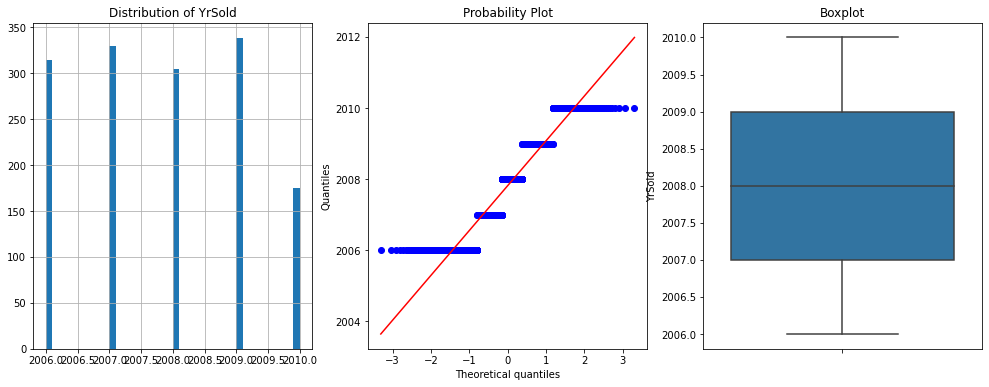

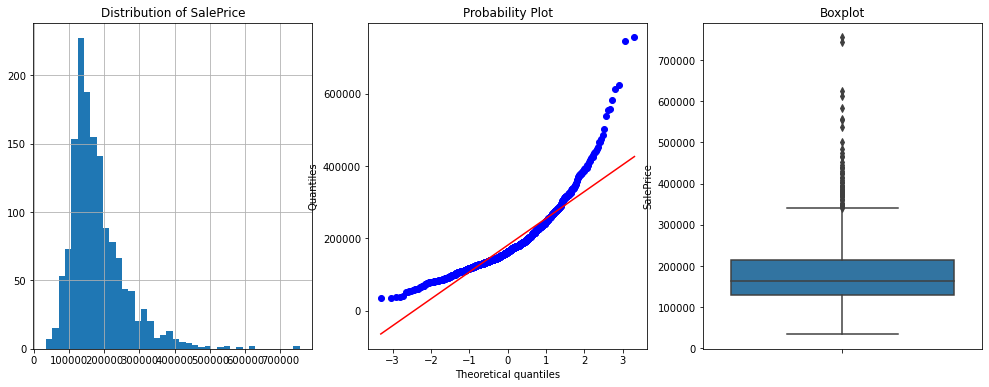

In [11]:
# Check the distbution of the variables in the numerical data

def num_plot(df, var):
    fig = plt.figure(figsize = (17, 6))
    plt.subplot(1,3,1)
    df[var].hist(bins = 40)
    plt.title(f"Distribution of {var}")
    
    plt.subplot(1,3,2)
    stats.probplot(df[var], dist = "norm", plot = plt)
    plt.ylabel('Quantiles')
    
    plt.subplot(1,3,3)
    sns.boxplot(y = df[var])
    plt.title("Boxplot")
    plt.show()
    
for var in numerical_df:
    num_plot(train_df, var)

The graphs above indicate the distrbutions of the numerical varibles and their outliers.

- The variable ***MSSubClass*** is seen to be extended more to the right of the distbution graph and more of its data is concentrated on the left. This distribution can also be seen in the 'probplot' where more data is concetrated on the negative side of 0 while on the positive side of 0, the values seem a bit apart from each other and not well alighned with the best fit line. Hence, this variable is postively skewed and with such a long right tail, outliers are expected more in the upper bound and this is validated by the box plot. A similar distribution can be seen in variables such as ***MasVnrArea***, ***BsmtFinSF1***, ***BsmtFinSF2***, ***BsmtUnfSF***, ***1stFlrSF***, ***LowQualFinSF***, ***GrLivArea***, ***BsmtFullBath***, ***BsmtHalfBath***, ***FullBath***, ***HalfBath***, ***TotRmsAbvGrd***, ***Fireplaces***, ***GarageArea***, ***WoodDeckSF***, ***OpenPorchSF***, ***EnclosedPorch***, ***3SsnPorch***, ***ScreenPorch***, ***PoolArea***, ***Miscval***, ***FullBath***, ***OverallQual***, ***OverallCond*** and ***SalePrice***
- The distribution of values in the ***LotFrontage*** variable shows that values are wondering more on the right and becoming concetrated on the left thus being positively skewed. The probability graph shows that at the end points, data values are well apart from others as such, outliers are expercted more at the upper bound and a bit less at the lower bounds due to the nature of the data skewness and this can be seen in the box plot. A similar distrbution can be seen in ***LotArea***, ***TotalBsmtSF***, ***BedroomAbvGr***, and ***KitchenAbvGr***.
- In the variable ***year built***, the distribution of the values show a long tail on the left and data becoming more concetrated towards the right. Therefore, the data is negatively skewed. The probplot shows that the data at the exreme negative point is not well alighned with best fit plot. Thus, it is expected that the outliers will fall in the lower bound only. Such outliers can be seen in the boxplot. The feature ***year built*** has this interesting pattern because the number of houses built 138 years ago from the year 2010 were probably much less. However, gradual increase in the number of constructed houses per year has made the data negatively skewed.
- The feature, ***YearRemodAdd*** appears to have long left tail. However, its data falls along the best fit line meaning that it more compacted and less disparsed hence a relatively lower standard deviation of 20.645. Additionally, the mean of this variable is 1984 which is not so far away from it minimum (1950) and its maximum 2010. Therefore, it is expected that this variable has no outliers and indeed the boxplot proves it so. 
- The variable ***FullBath*** has a distribution that resembles a normal distribution curve. Its probplot shows that all of its values are falling along the best fit line meaning that values are not extended away from each other. The varibles standard deviation is 0.551 meaning that the data is well distrbuted around its mean. Thus, outliers are not expected in this variable as can be seen in the boxplot.
- The distribution of values in ***HalfBath*** indicates that the data is extended more to the right but most of its data values fall along the best fit line as shown in the probplot. The standard deviation of this variable is 0.503 which implies that the data is more condensed around the mean. Hence, outliers are not expected in this variable. The box plot shows the details about this variable's outliers.
- The feature ***GarageYrBlt*** has a longer left tail and appears to be uniformly getting concentrated as we move to the right. The probplot shows that some values are a bit spaced at the left end point however, the mean of this variable is 1978 which close to its minimum (1900) and its maximum (2010). The variable has a relatively lower standard deviation of 24.690 which means that the data is not so spaced at the left end point. As such, outliers are not expected in this variable. The boxplot proves this analysis.
- Data distribution in the variable ***MoSold*** appears to follow a normal distbution curve. All the values are around the best fit curve as shown by the probplot. This variable has a standard deviation of 2.703 hence the values are well distributed around the mean. As such, no outliers can be seen in the boxplot.
- The pattern of the data distribution in the variable ***YrSold*** appears slightly to follow a normal distbution curve and all the values are around the best fit curve as shown by the probplot. To add to this, this variable has a standard deviation of 1.33 making the values to be well distributed around its mean. Therefore, outliers cannot be detected in the boxplot.

<div style="border-radius:1px;
            border : black solid;
            background-color:DodgerBlue;
            font-size:110%;
            text-align: left">

<h4 style='; border:0; border-radius: 1px; font-weight: bold; color:black'><center> Python data about skewness and kurtosis</center></h4>

Skewness is a statistical term and it is a way to estimate or measure the shape of a distribution.  It is an important statistical methodology that is used to estimate the asymmetrical behavior rather than computing frequency distribution. Skewness can be two types:

- Symmetrical: A distribution can be called symmetric if it appears the same from the left and right from the center point.
- Asymmetrical: A distribution can be called asymmetric if it doesn’t appear the same from the left and right from the center point.
    
***Distribution on the basis of skewness value:***

- Skewness = 0: Then normally distributed.
- Skewness > 0: Then more weight in the left tail of the distribution.
- Skewness < 0: Then more weight in the right tail of the distribution.
               
Kurtosis:
               
It is also a statistical term and an important characteristic of frequency distribution. It determines whether a distribution is heavy-tailed in respect of the normal distribution. It provides information about the shape of a frequency distribution.

- kurtosis for normal distribution is equal to 3.
- For a distribution having kurtosis < 3: It is called playkurtic.
- For a distribution having kurtosis > 3, It is called leptokurtic and it signifies that it tries to produce more outliers rather than the normal distribution.   
    
    
### Reference:
https://www.geeksforgeeks.org/how-to-calculate-skewness-and-kurtosis-in-python/

In [12]:
# Calculation of skewness and curtosis to validate the discussions above
for var in numerical_df:
    skewness = train_df[var].skew()
    if skewness > 0:
        print(f"{var} is positively skewed.")
    else:
        print(f"{var} is negatively skewed.")
    kurtosis = train_df[var].kurt()
    if kurtosis > 3:
        print(f"And {var} is also leptokurtic and may produce outliers rather than a normal distribution. \n")
    elif kurtosis < 3:
        print(f"And {var} is also playkurtic.\n")
    else:
        print(f"And {var} also has a normal distribution.")


MSSubClass is positively skewed.
And MSSubClass is also playkurtic.

LotFrontage is positively skewed.
And LotFrontage is also leptokurtic and may produce outliers rather than a normal distribution. 

LotArea is positively skewed.
And LotArea is also leptokurtic and may produce outliers rather than a normal distribution. 

OverallQual is positively skewed.
And OverallQual is also playkurtic.

OverallCond is positively skewed.
And OverallCond is also playkurtic.

YearBuilt is negatively skewed.
And YearBuilt is also playkurtic.

YearRemodAdd is negatively skewed.
And YearRemodAdd is also playkurtic.

MasVnrArea is positively skewed.
And MasVnrArea is also leptokurtic and may produce outliers rather than a normal distribution. 

BsmtFinSF1 is positively skewed.
And BsmtFinSF1 is also leptokurtic and may produce outliers rather than a normal distribution. 

BsmtFinSF2 is positively skewed.
And BsmtFinSF2 is also leptokurtic and may produce outliers rather than a normal distribution. 

Bsm

In summary, most variables in the numerical data set are positively skewed while only a few such as ***year built***, ***GarageCars*** and ***GarageYrBlt*** are negatively skewed. A few variables resemble a normal distribution curve and these are such as ***YearRemodAdd***, ***FullBath***, ***HalfBath***, ***GarageYrBlt***, ***MoSold***, and ***YrSold***. However, the skewness in the data will be handled later on.

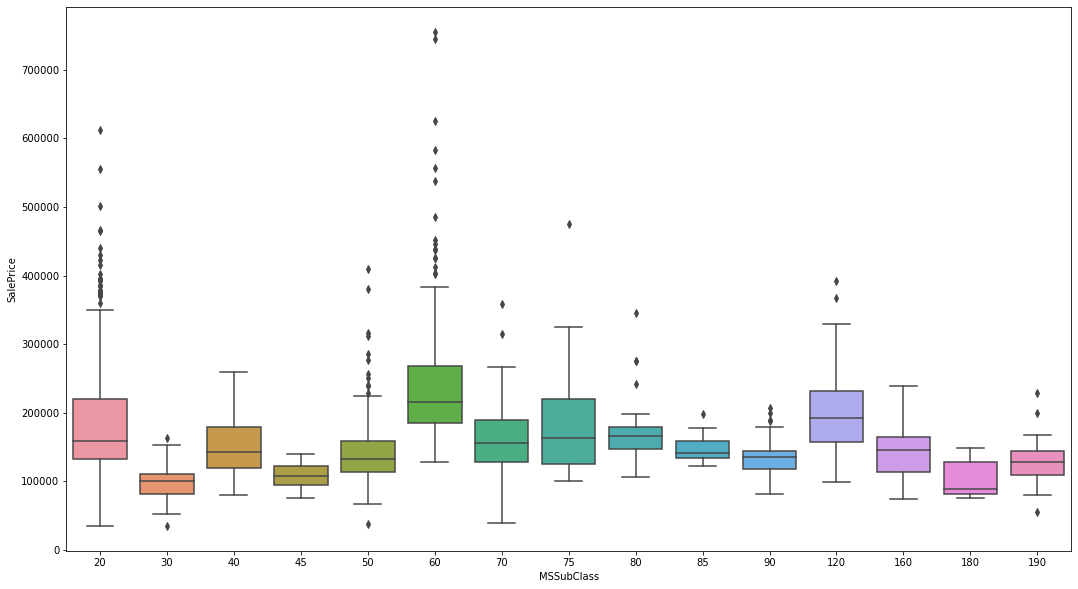

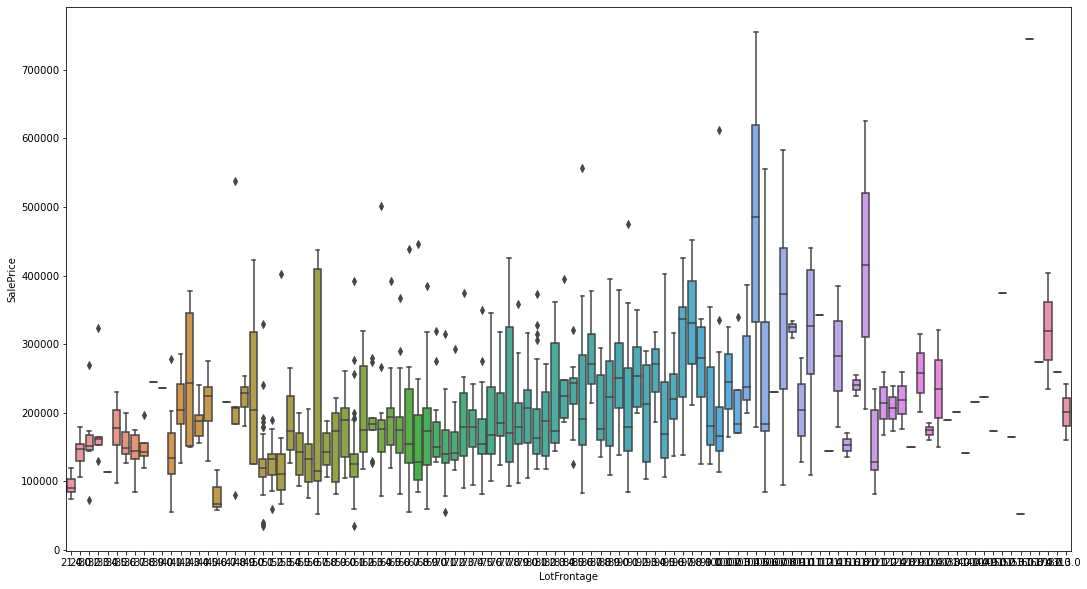

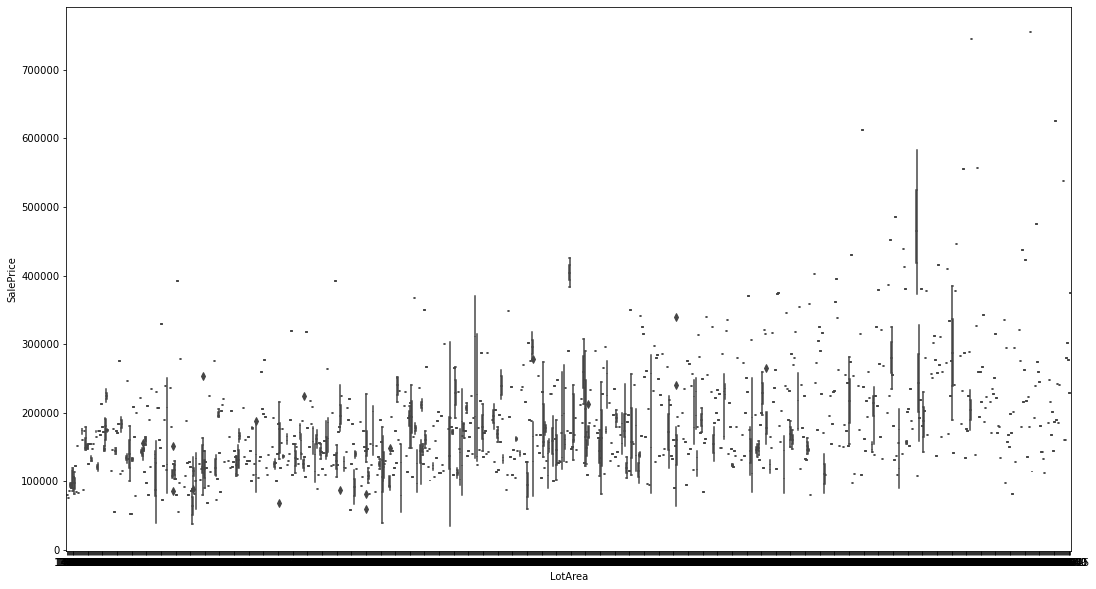

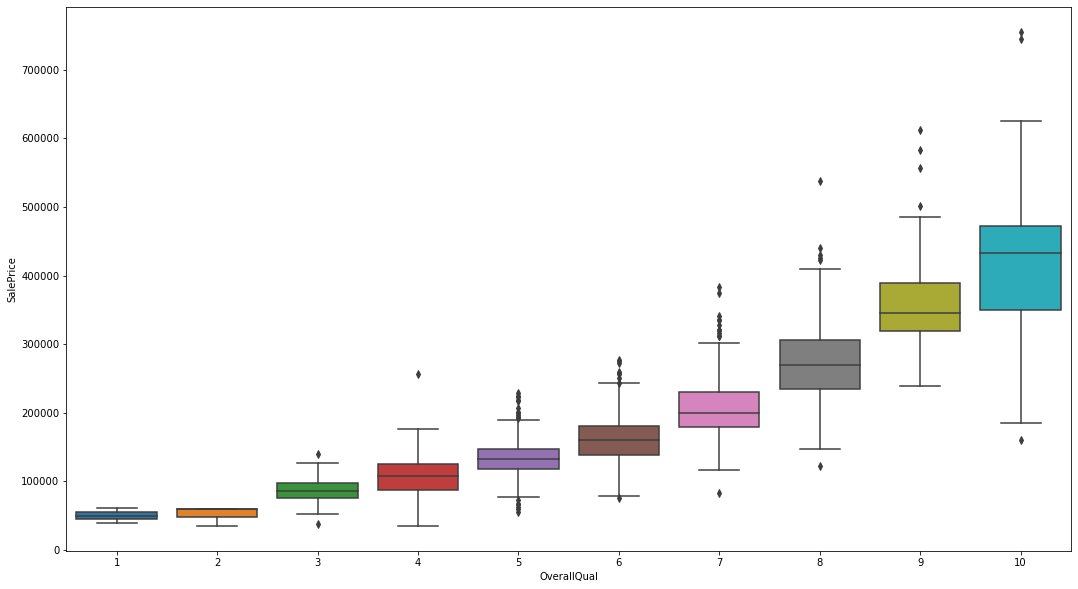

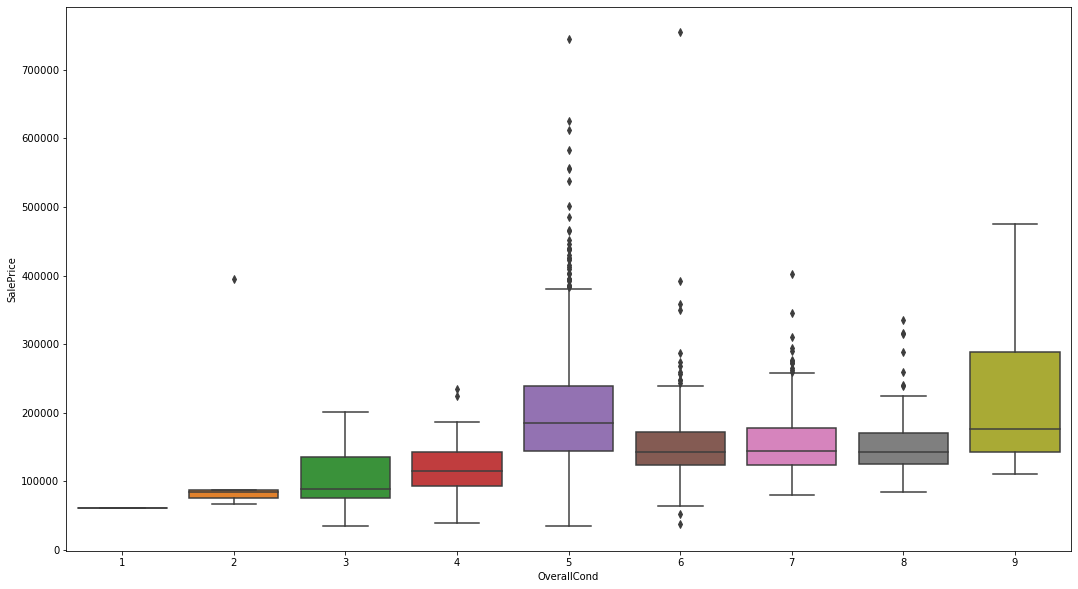

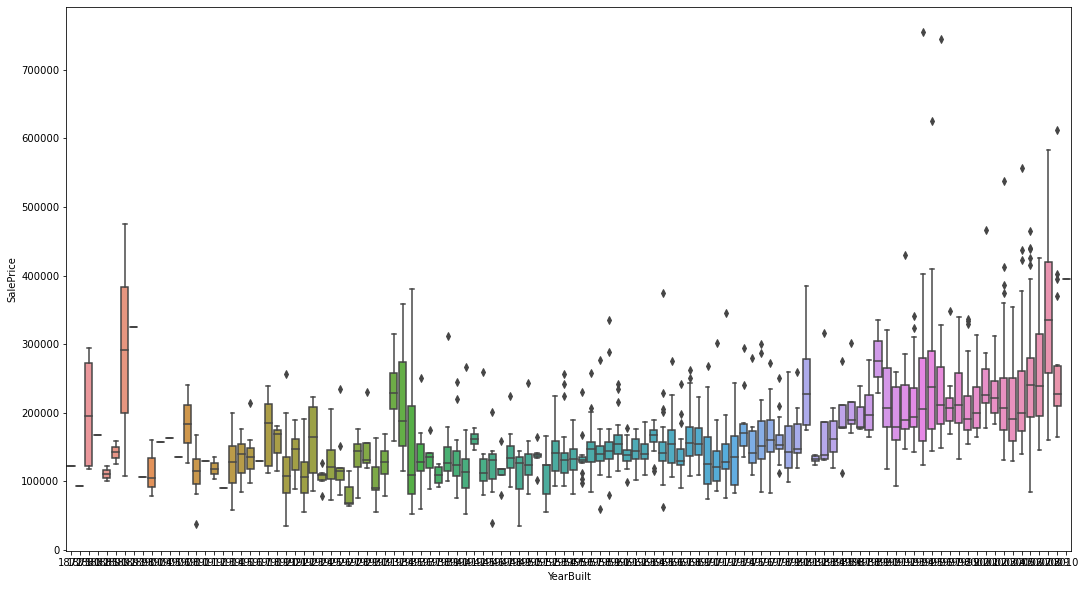

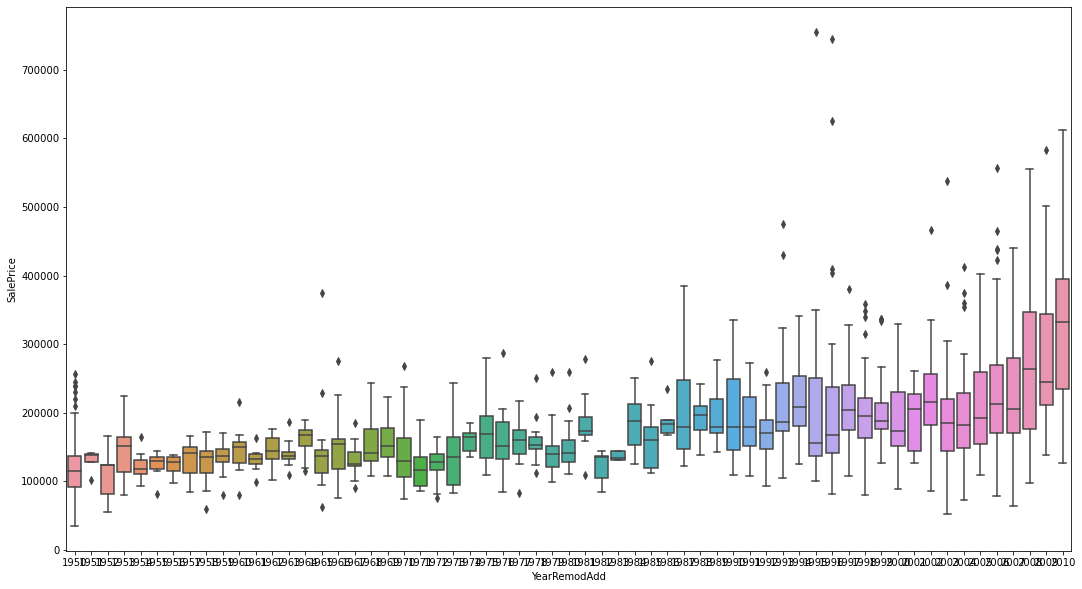

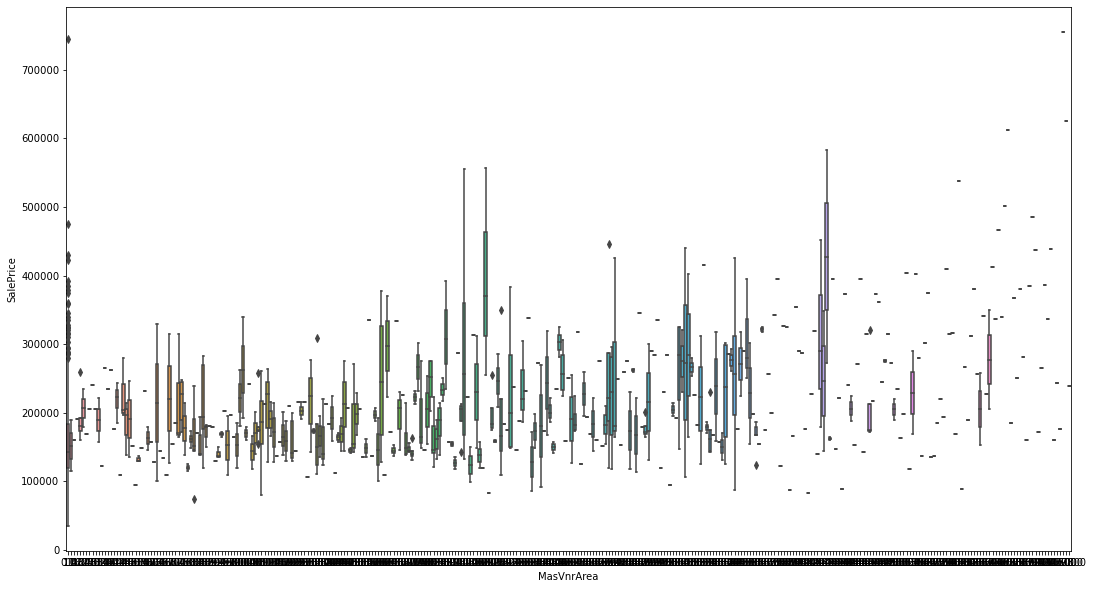

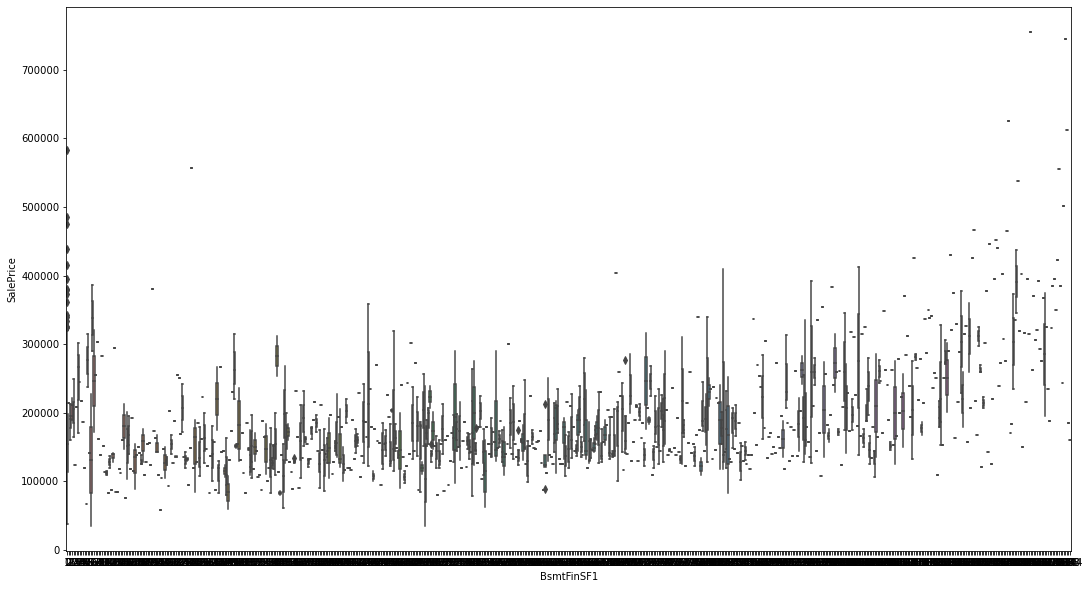

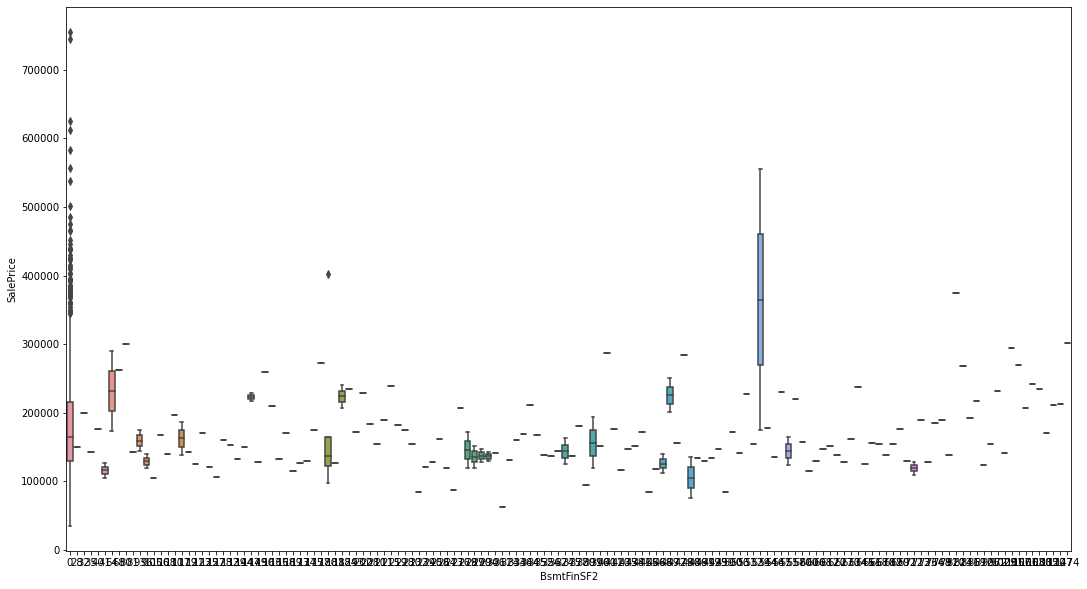

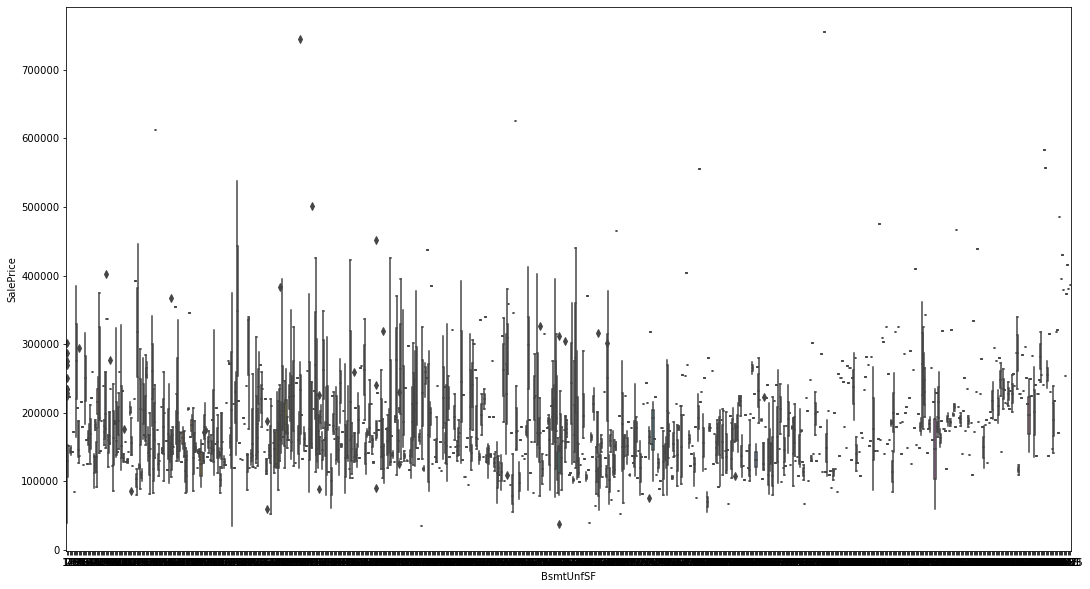

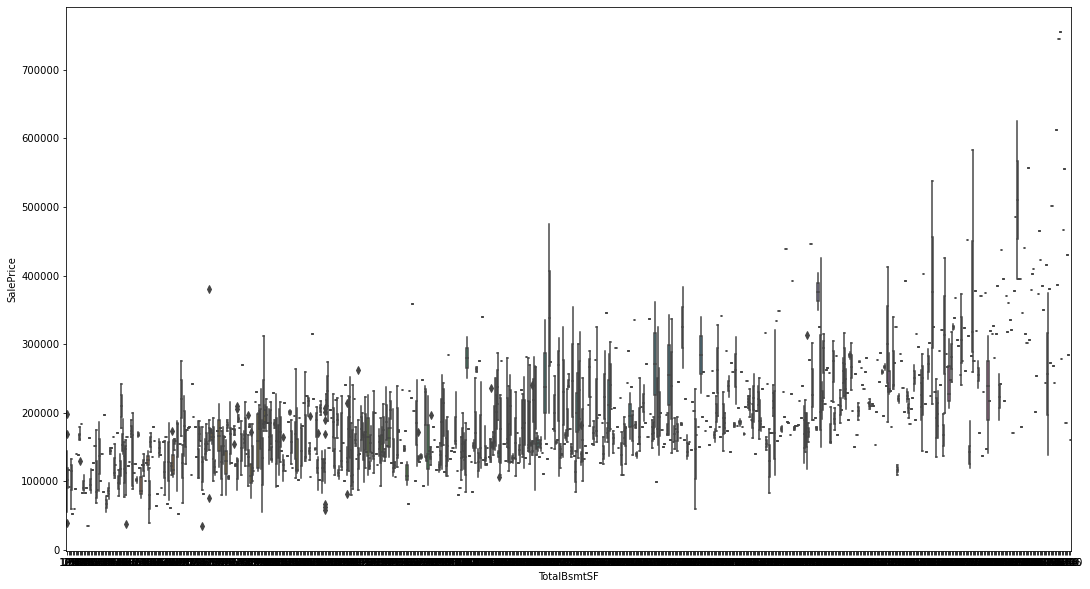

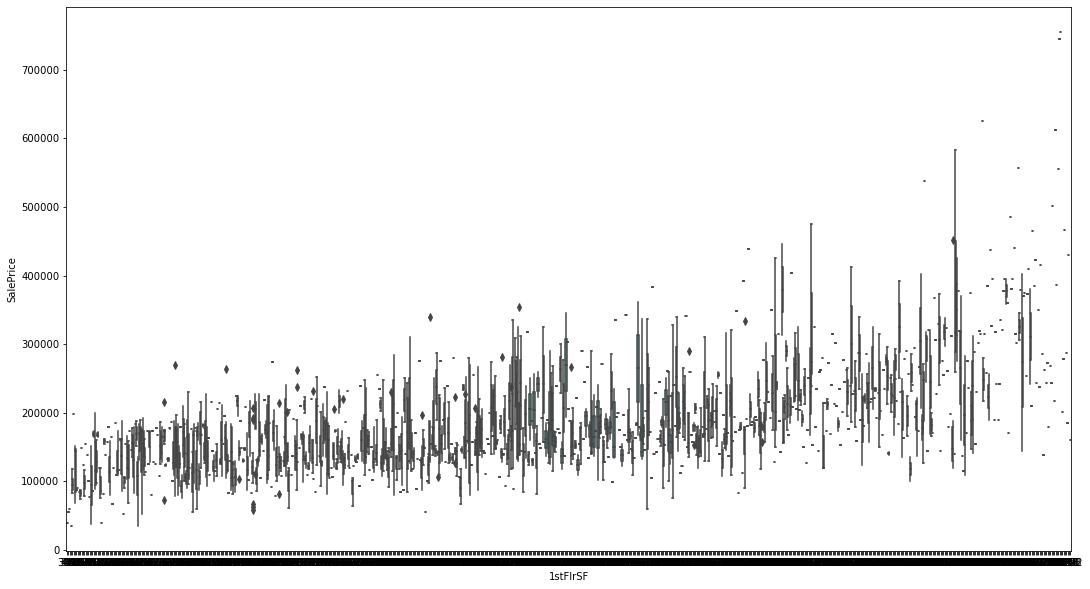

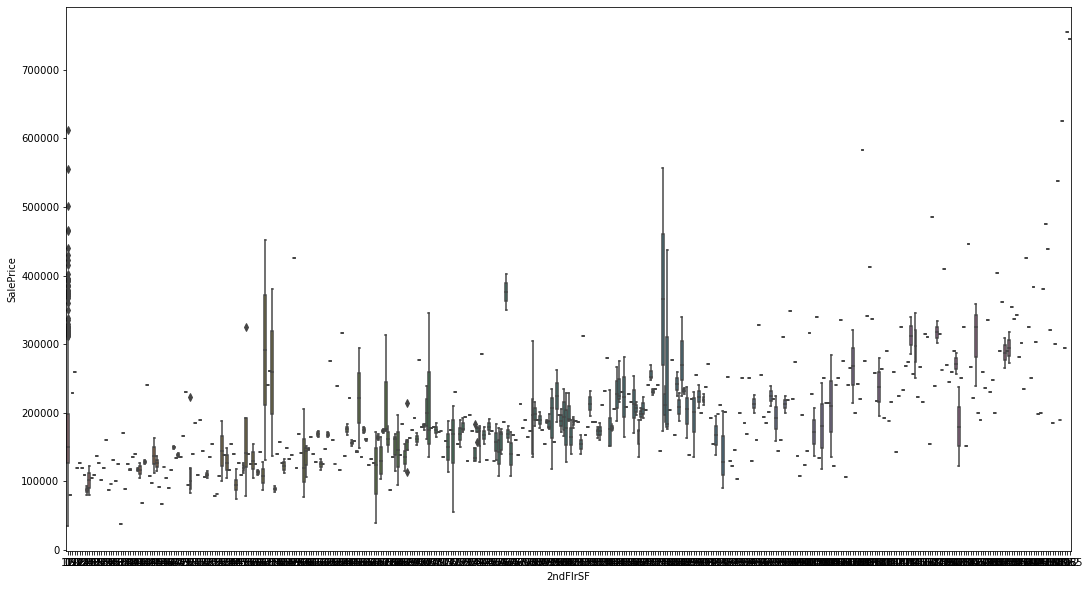

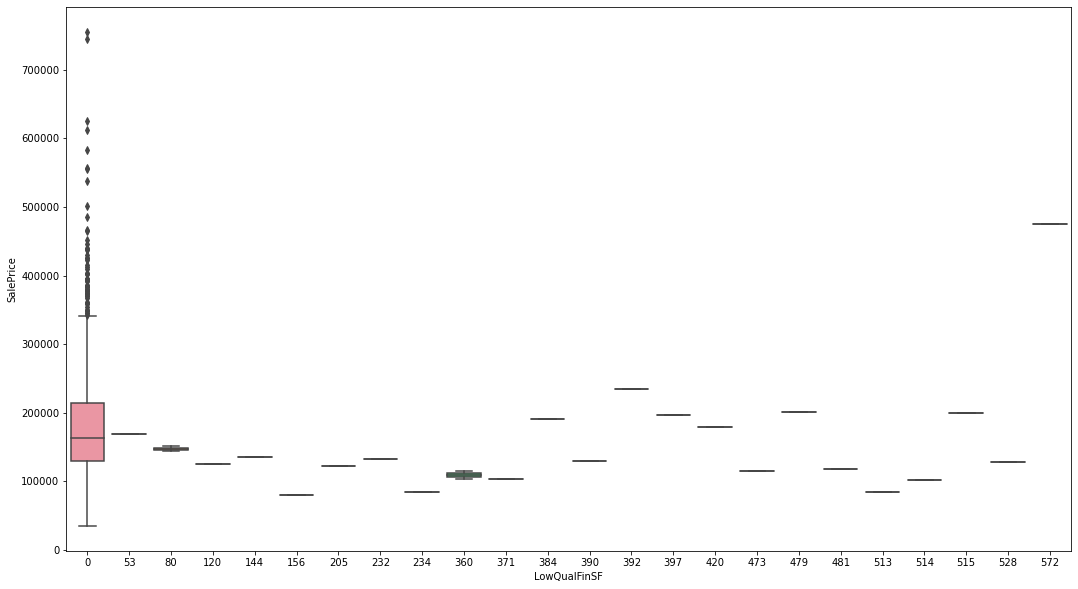

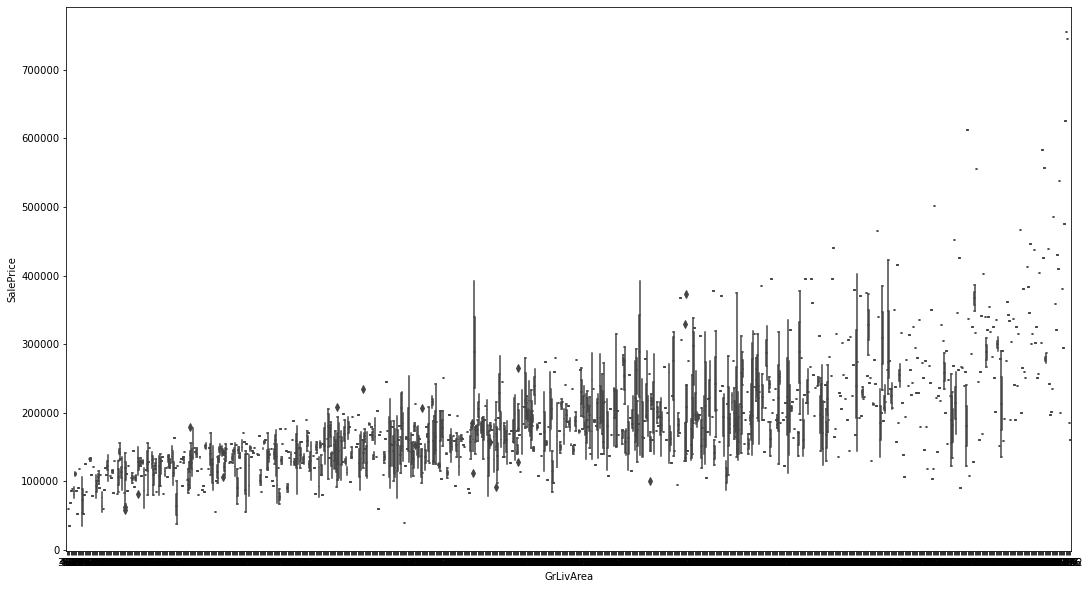

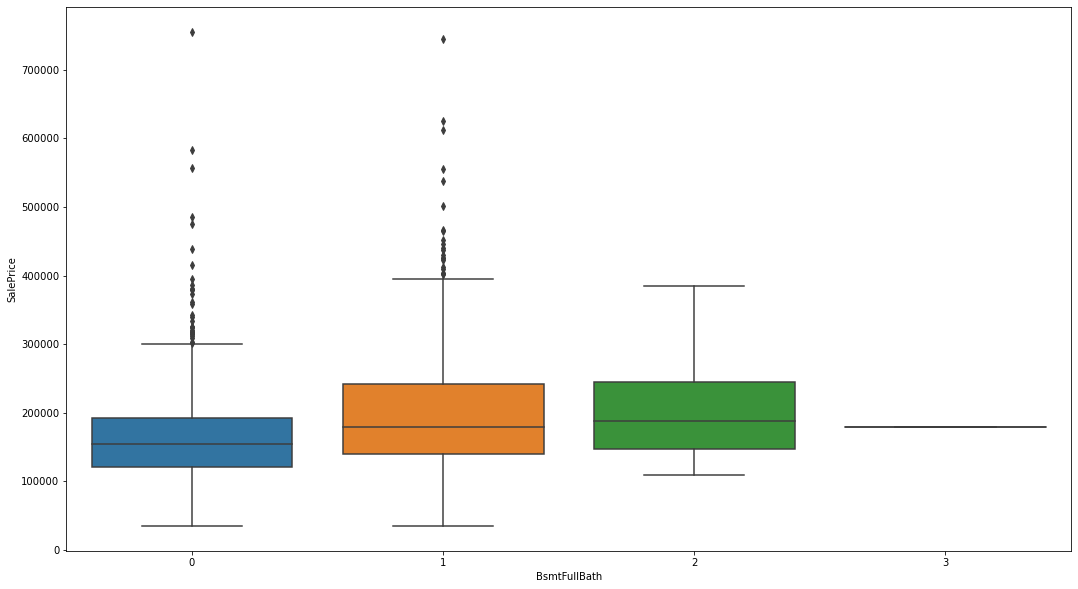

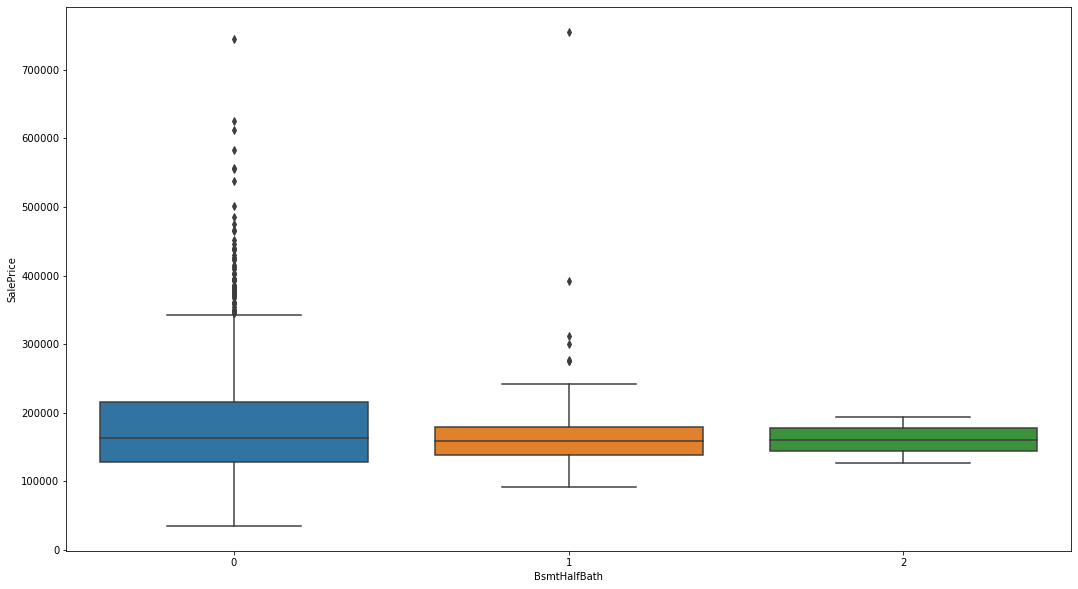

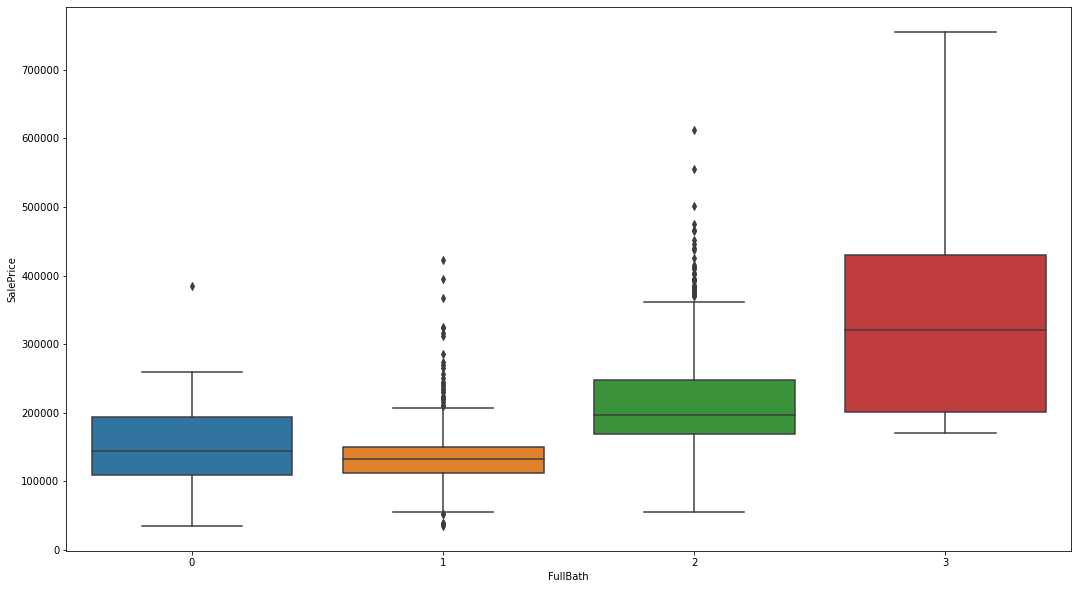

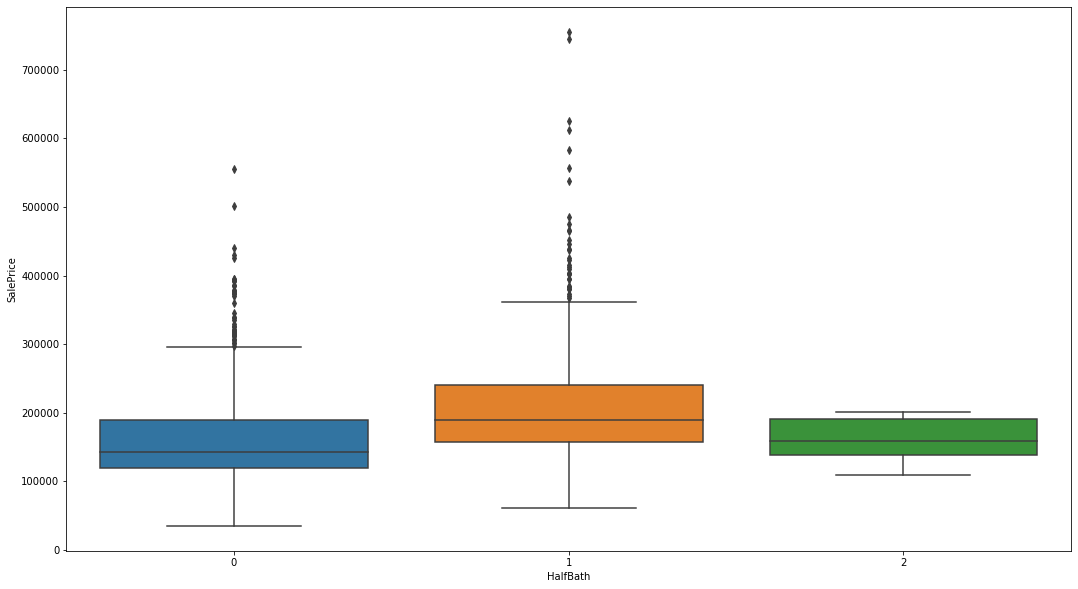

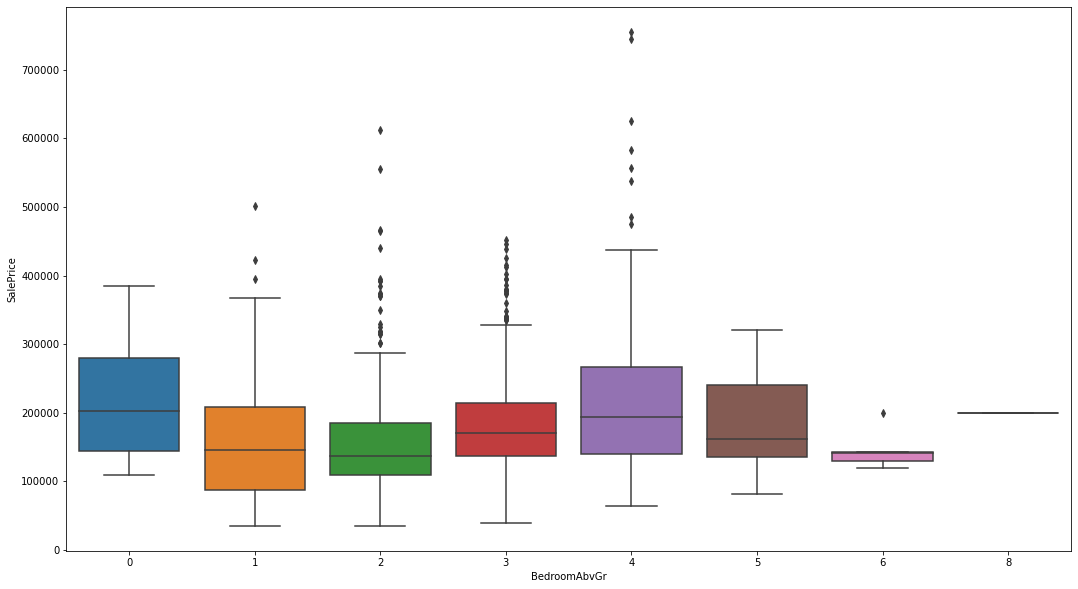

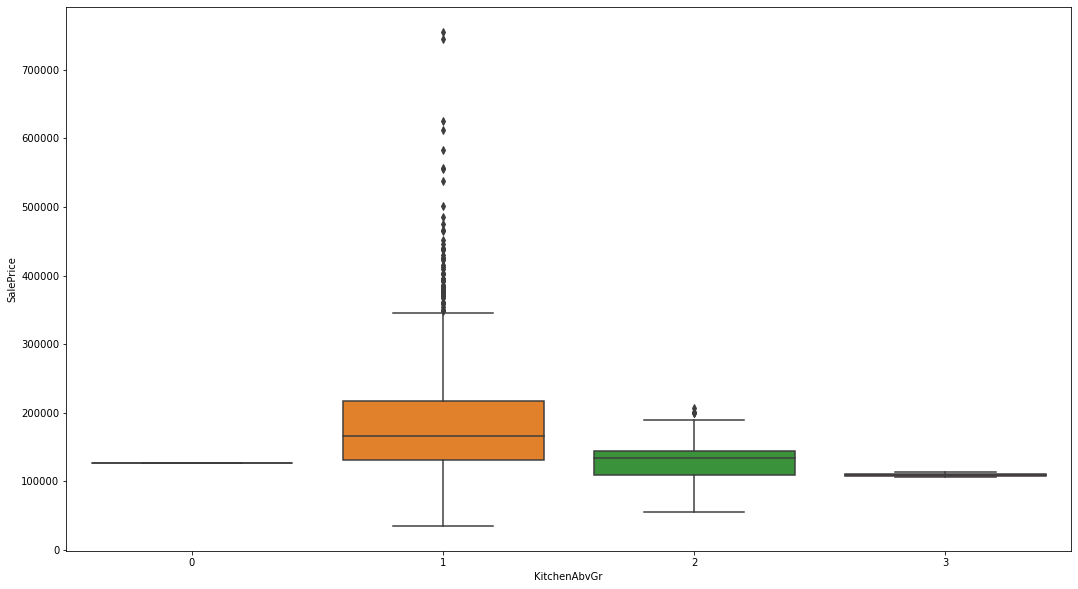

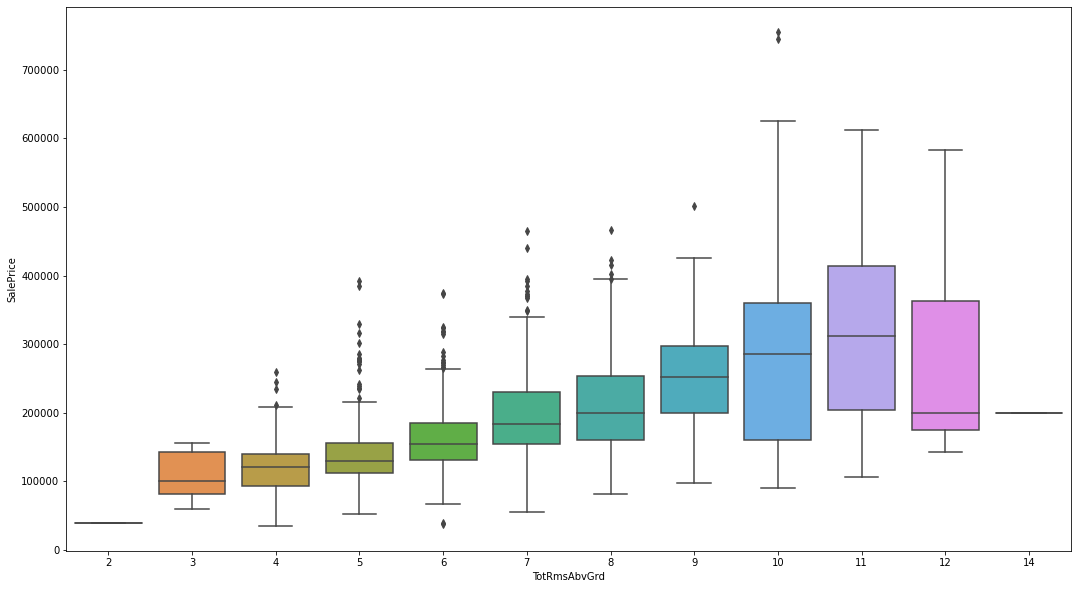

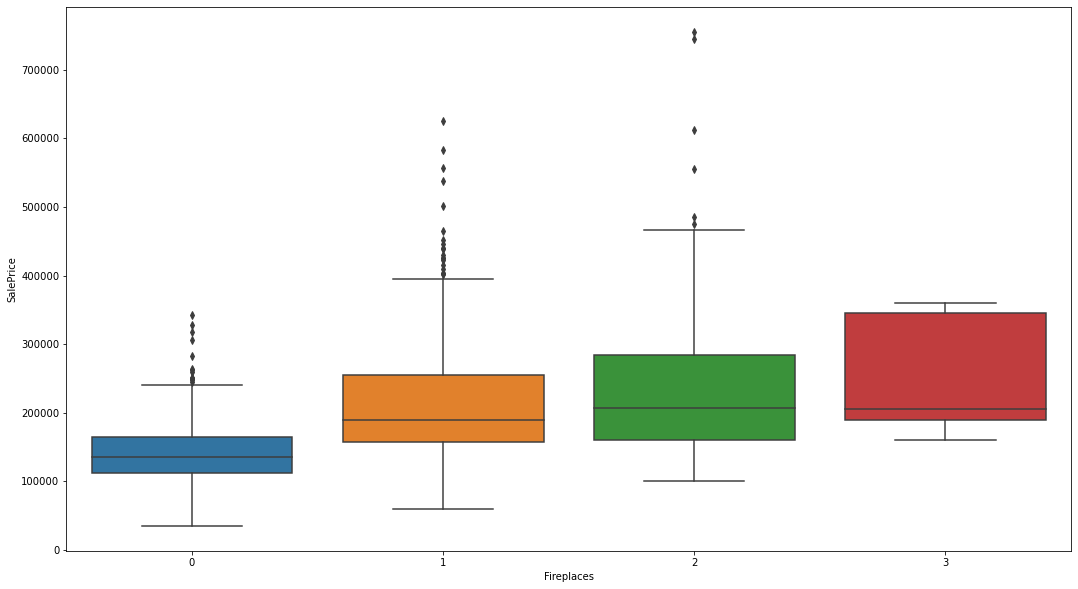

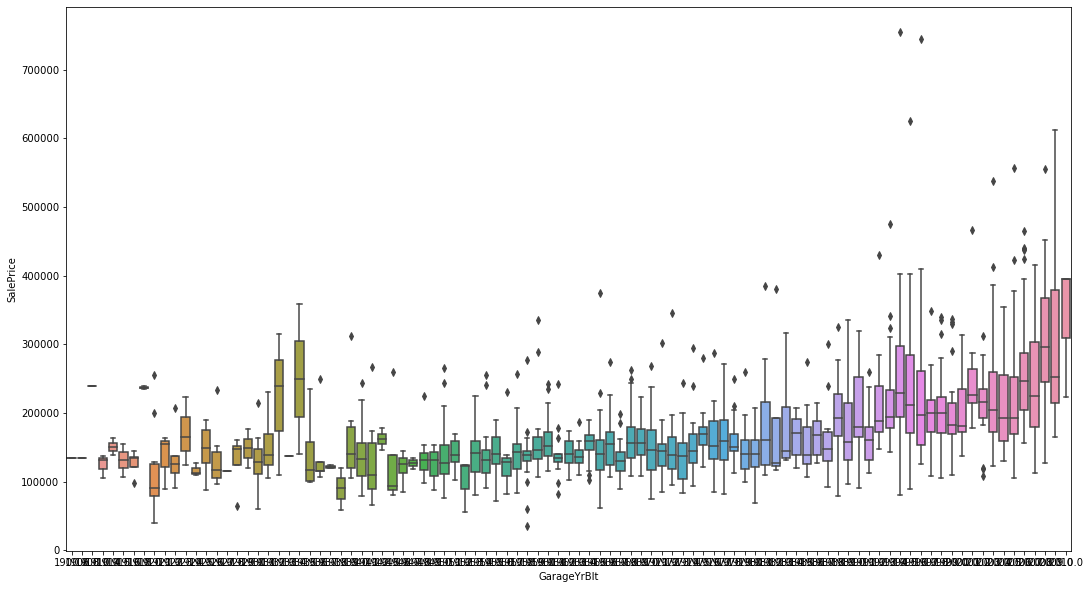

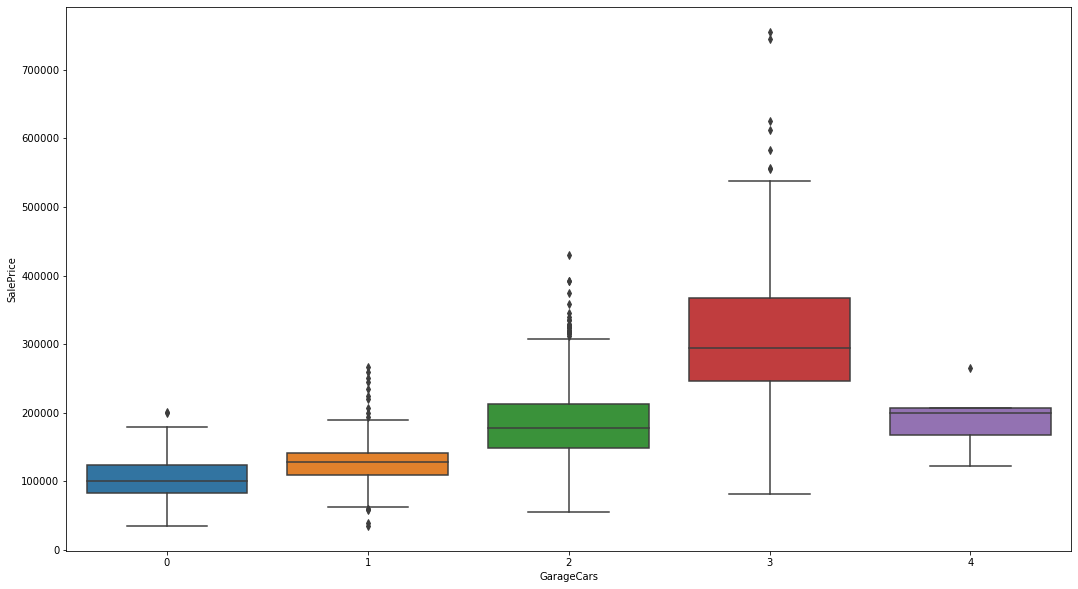

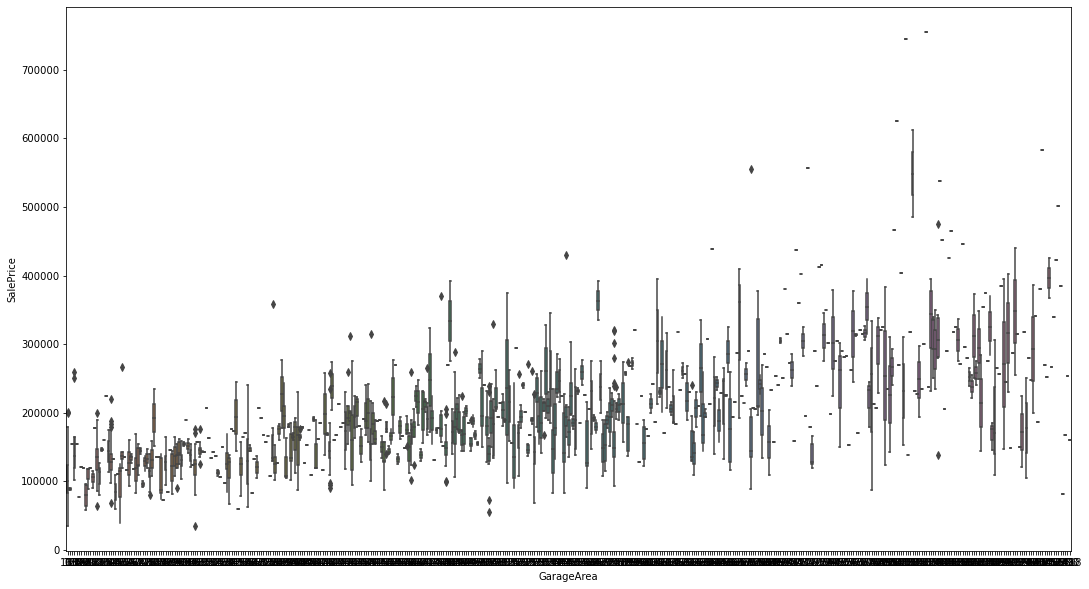

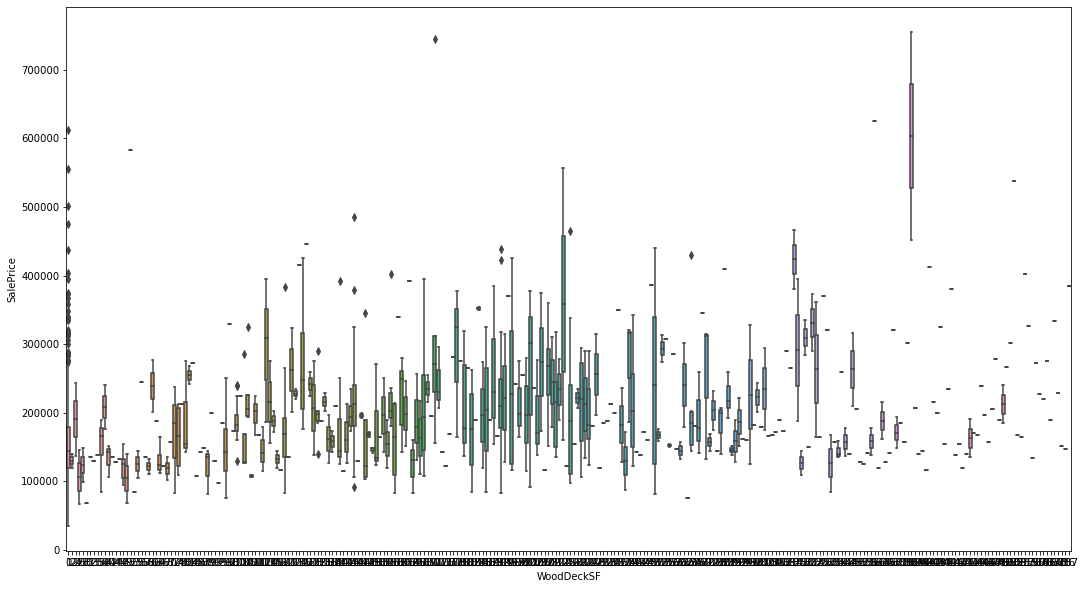

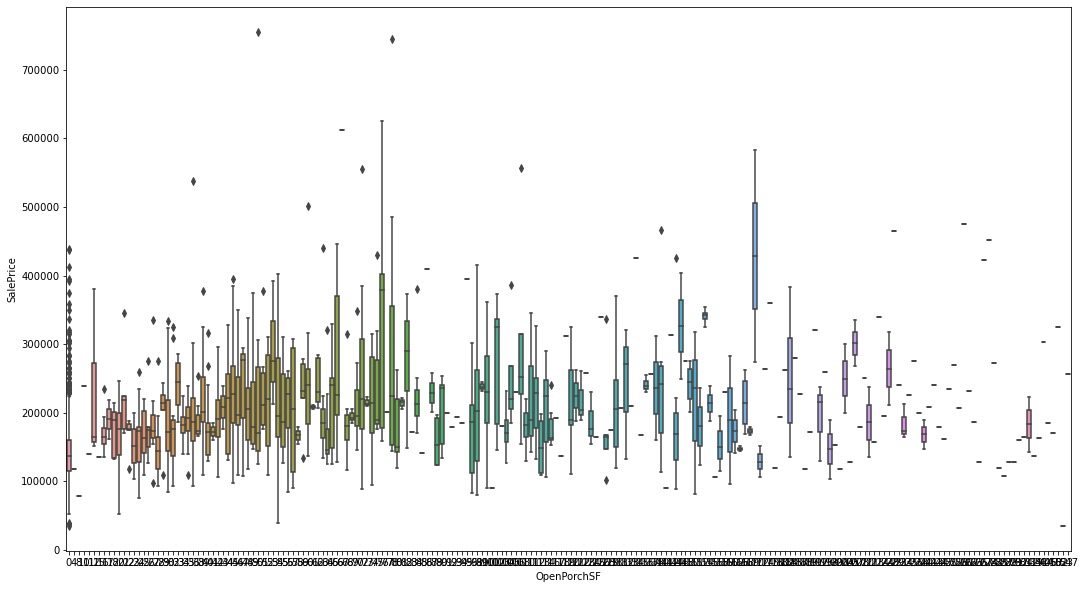

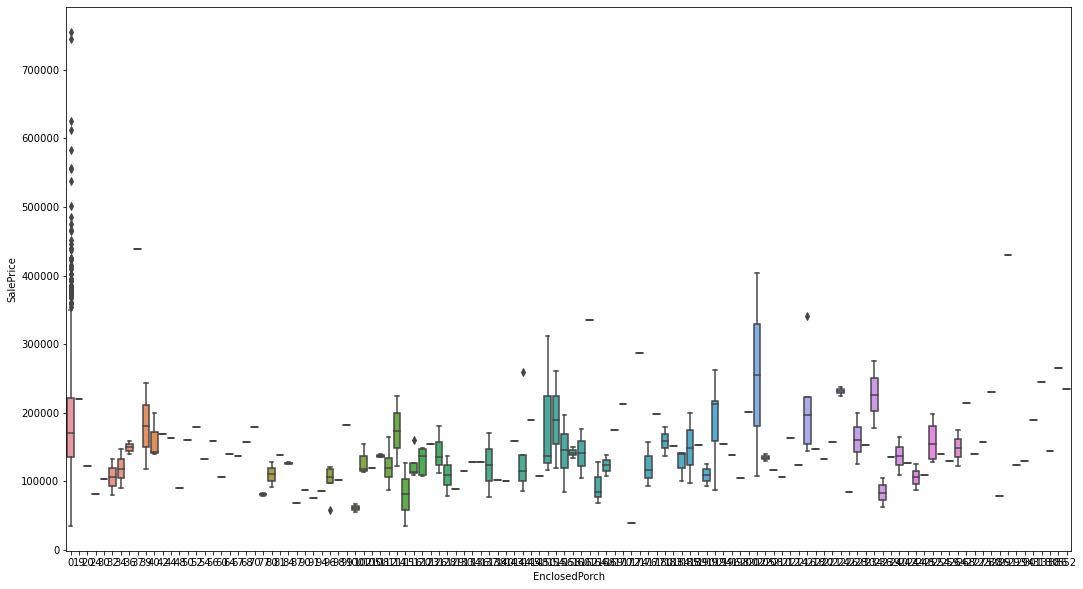

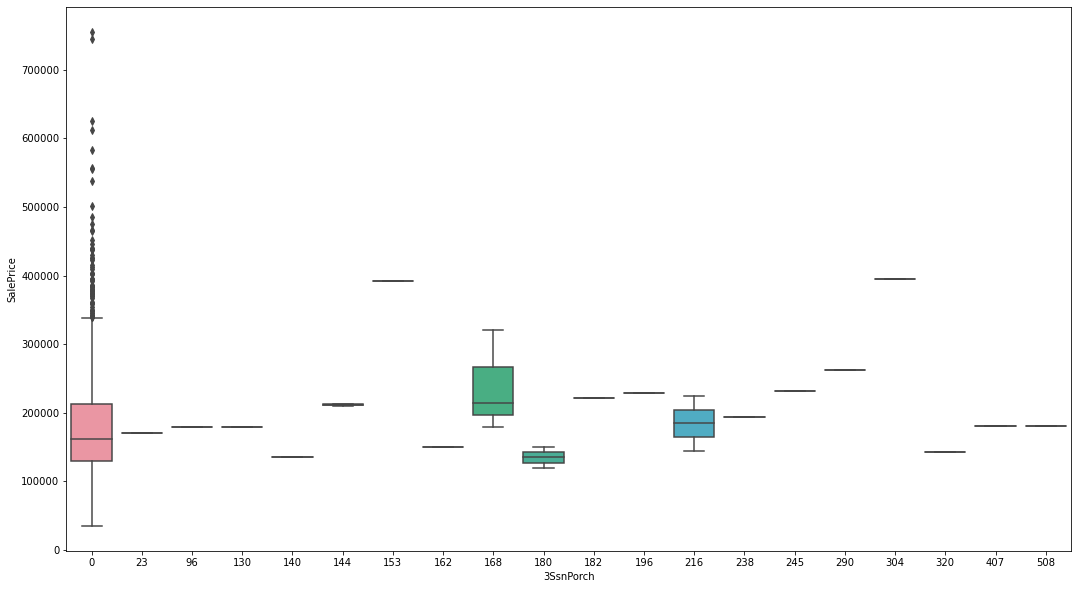

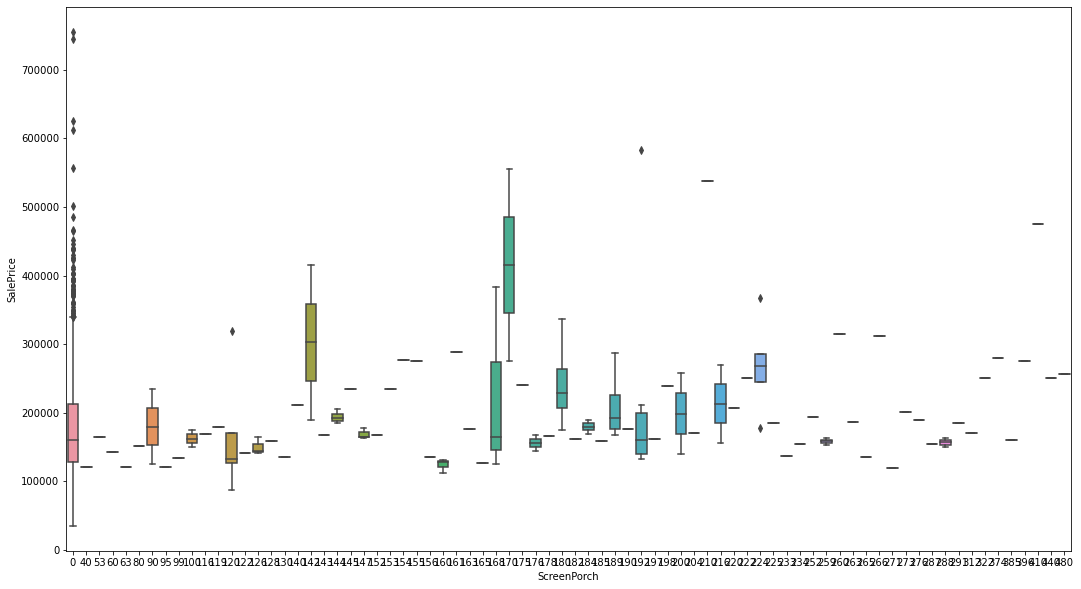

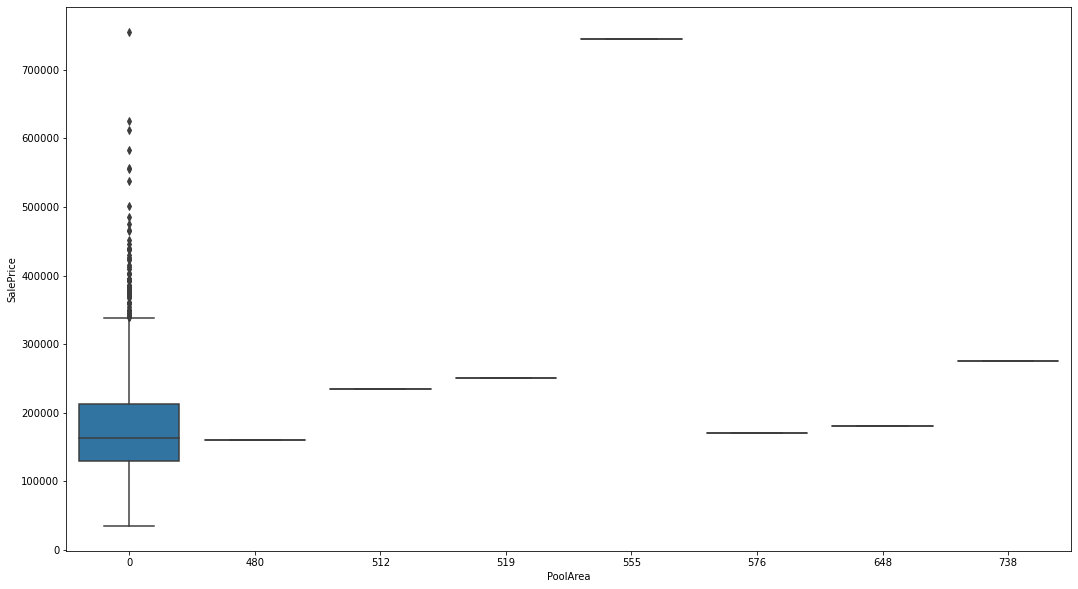

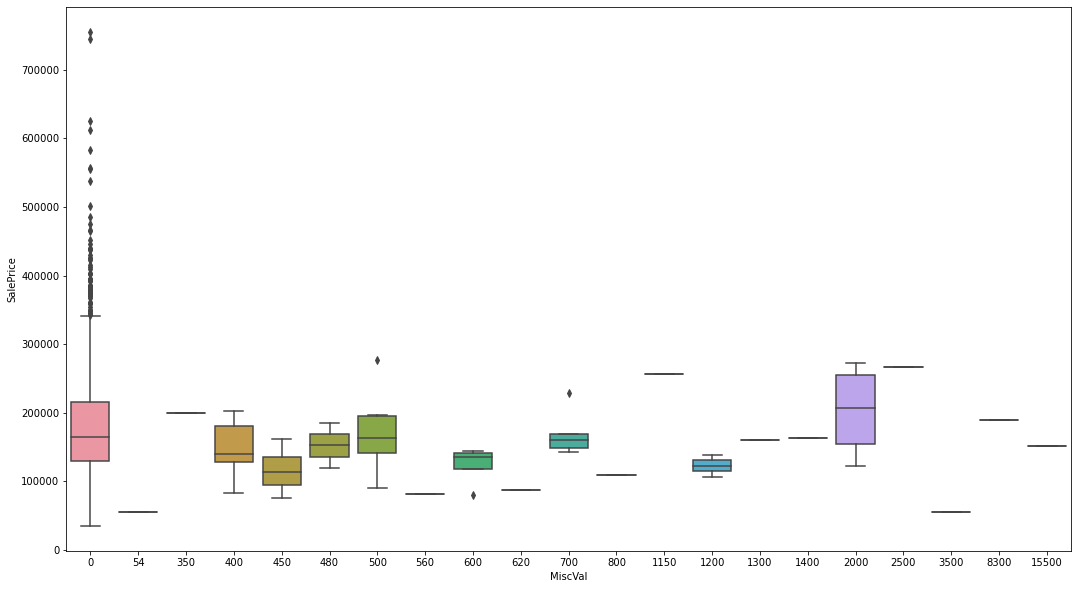

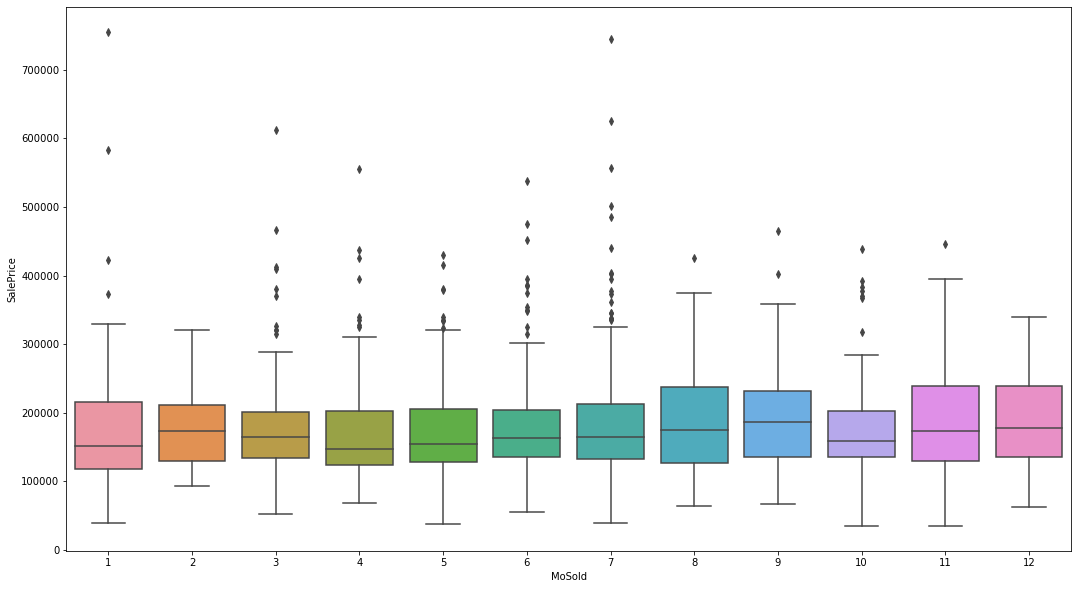

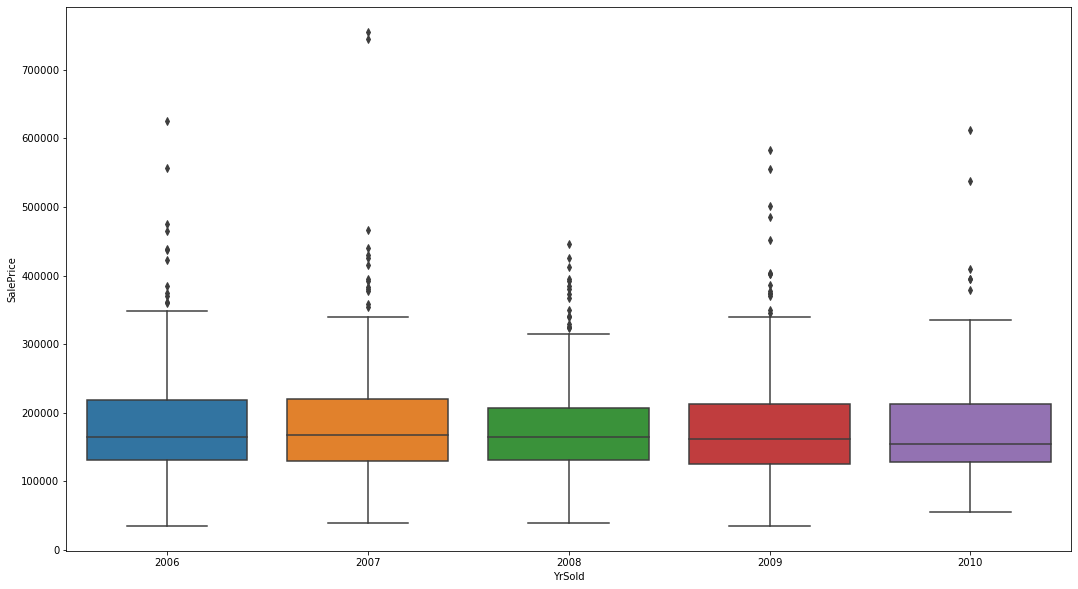

In [13]:
# Show how each variable compares with the target variable
num_data = numerical_df.drop(['SalePrice'], axis = 1)
for var in num_data:
    plt.rcParams.update({'figure.max_open_warning': 0})
    f, ax = plt.subplots(figsize = (18, 10))
    fig = sns.boxplot(x = num_data[var], y = train_df['SalePrice'])

The text outlined below shows an explanation of the relaitionship between the target variable and the features.

- From the graphs shown above, there appears to be a consine wave relatioship between the ***MSSubClass*** and ***SalePrice***. Therefore, this feature may not be included in the training model.
- The relationship between ***LotFrontage*** and ***SalePrice*** appears to be mildy positive and so, this feature may be included in the prediction model.
- ***LotArea*** and ***SalePrice*** also show a mildly positive replationship which means that this feature could be included in the training model.
- There is a strong positive relationship between ***OverallQual*** and ***SalePrice***. Therefore, this feature might be considered for inclusion in the prediction model.
- Given the graphs above, the relationship between ***OverallCond*** and ***SalePrice*** is mildly positive meaning that this feature can be included in the training model.
- ***YearBuilt*** and ***SalePrice*** also shows a mildly positive relationship. The feature therefore, can be included in the training model.
- The relationship between ***YearRemodAdd*** and ***SalePrice*** is atleast positive and the feature maybe included in the training model.
- It can be seen that ***BsmtFinSF1*** and ***SalePrice*** have mild positive relationship thus, this feature maybe included in the training model.
- There is atleast a positive realtionship between ***TotalBsmtSF*** and ***SalePrice*** as such, this feature could be included in the training model.
- It can also be seen that there is atleast a positive relationship between ***1stFlrSF*** and ***SalePrice*** which implies that this feature could be included in the training model.
- ***2stFlrSF*** and ***SalePrice*** also shows atleast a positive relationship meaning that this feature could be included in the training model.
- The graphs above show that ***GrLivArea*** and ***SalePrice*** have atleast a positive relationship thus, adoption of this feature in the training model is posible.
- A mildly positive relationship ***BsmtFullBath*** and ***SalePrice*** can be observed from the given graphs above which means that the likelihood of this feature to included in the training model might be high.
- There appears to be a negative relationship between ***BsmtHalfBath*** and ***SalePrice***. Hence, inclusion of this feature among features for data training is possible.
- A strong positive relationship between ***FullBath*** and ***SalePrice*** can be seen in the graphs shown above. Therefore, this feature could be included in the training model.
- There seems to be a negative relationship between ***KitchenAbvGr*** and ***SalePrice*** meaning that this feature could have some importance in the training model.
- ***TotRmsAbvGrd*** and ***SalePrice*** shows atleast a positive relationship thus, this feature could have some importance in determining house prices.
- ***Fireplace*** and ***SalePrice*** have atleast a strong relationship which means that this particular feature may help to build a good prediction model.
- There appear to be a mildy strong relationship between ***GarageYrBlt*** and ***SalePrice***. This feature therefore, could be good for model predictions.
- ***GarageCars*** and ***SalePrice*** indicate a mildy positive relationship and so, this feature could be important for data training.
- There is a positive relation between***GarageArea*** and ***SalePrice***. This positive relationship shows how important this feature is.


In summary, features such as ***LotArea***, ***OverallQual***, ***OverallCond***, ***YearBuilt***, ***YearRemodAdd***, ***BsmtFinSF1***, ***TotalBsmtSF***, ***1stFlrSF***, ***2stFlrSF***, ***GrLivArea***, ***BsmtFullBath***, ***FullBath***, ***KitchenAbvGr***, ***TotRmsAbvGrd***, ***Fireplace***, ***GarageCars*** and ***GarageArea*** have shown to have atleast a positive relationship with the target variable ***SalePrice***. While only ***BsmtHalfBath*** is negatively related to the target variable. Therefore, this shows that these features can help to determine the prices of houses. The remaining features do not show a clear relationship with the tagret variable.

***Explore Categorical Data***

In this section, the statistics in the categorical data will be explored and the distribution of the categorical data will also be demostrated below.

In [14]:
# Show the statistics of the categorical data
categorical_df.describe(include = ['O'])

MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
count      1460   1460    91     1460        1460      1460      1460   
unique        5      2     2        4           4         2         5   
top          RL   Pave  Grvl      Reg         Lvl    AllPub    Inside   
freq       1151   1454    50      925        1311      1459      1052   

       LandSlope Neighborhood Condition1  ... GarageType GarageFinish  \
count       1460         1460       1460  ...       1379         1379   
unique         3           25          9  ...          6            3   
top          Gtl        NAmes       Norm  ...     Attchd          Unf   
freq        1382          225       1260  ...        870          605   

       GarageQual GarageCond PavedDrive PoolQC  Fence MiscFeature SaleType  \
count        1379       1379       1460      7    281          54     1460   
unique          5          5          3      3      4           4        9   
top            TA         TA          Y     Gd  MnPrv        Shed       WD   
freq         1311       1326       1340      3    157          49     1267   

       SaleCondition  
count           1460  
unique             6  
top           Normal  
freq            1198  

[4 rows x 43 columns]

***Summary describing the categorical data****

- Street has 2 unique values with the value gravel occupying 55 % of the variable.
- GarageType has 6 unique values with Attached (Attcd) occupying 63 % of the total sample number.
- SaleCondition has 6 unique values with Normal occupying 82 % of the total sample number.
- LandContour has 4 unique values with leveled (Lvl) occupying 90 % of the total sample.

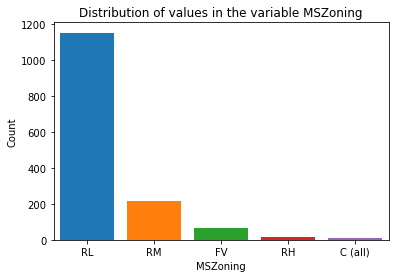

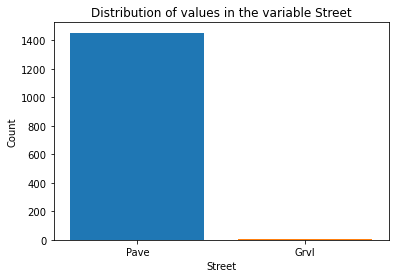

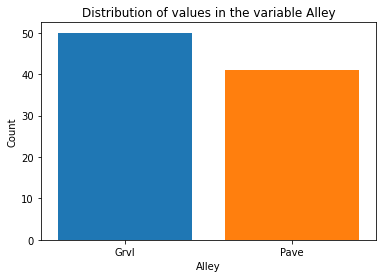

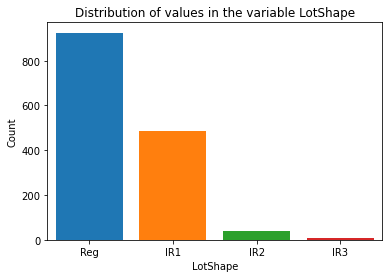

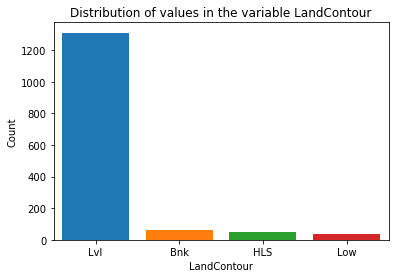

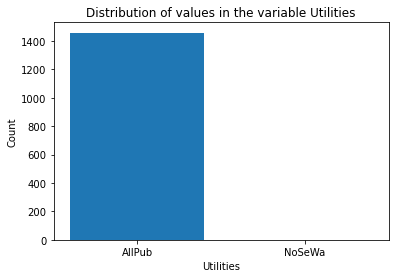

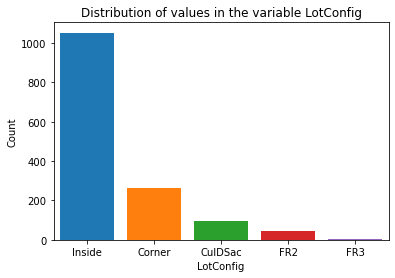

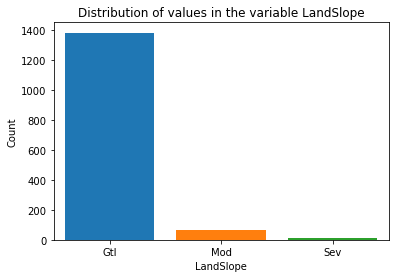

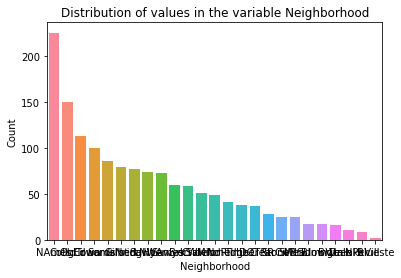

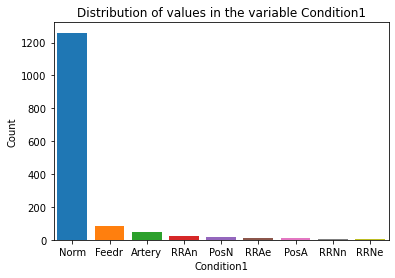

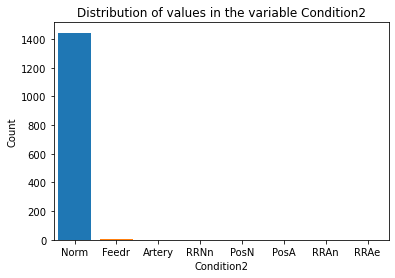

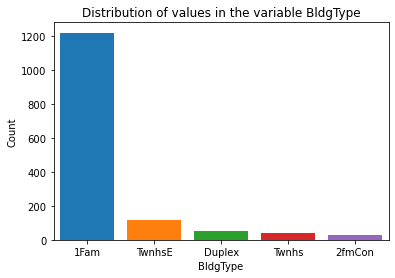

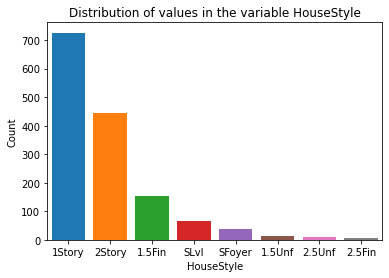

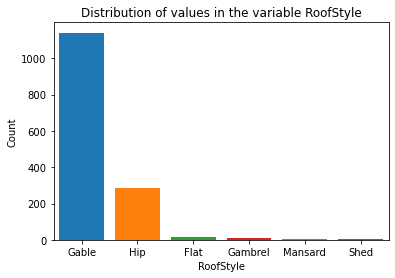

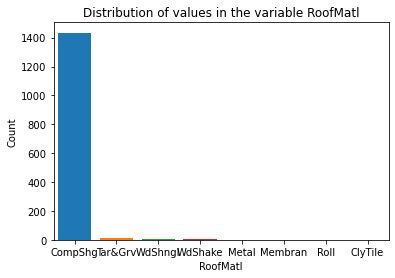

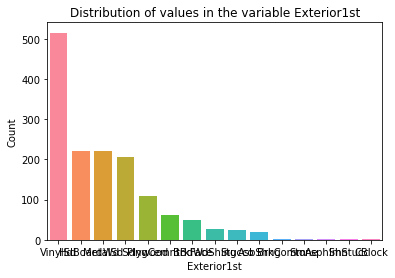

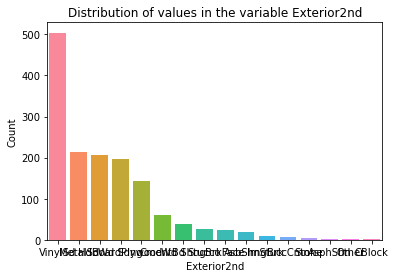

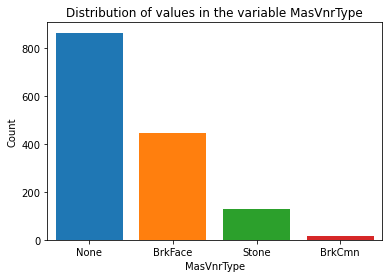

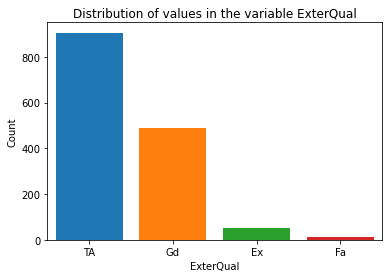

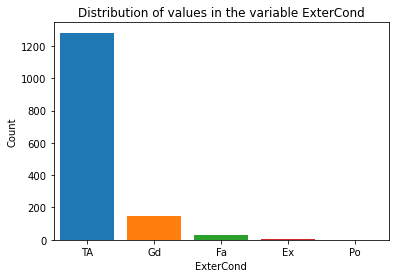

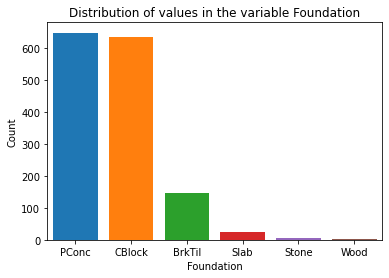

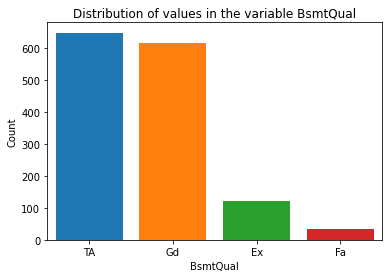

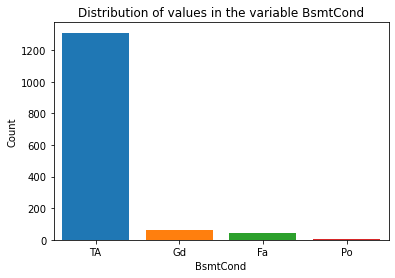

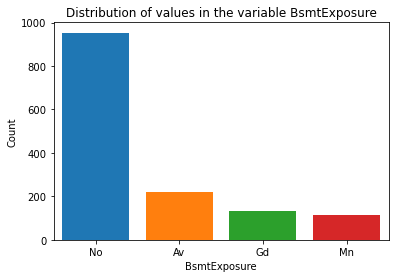

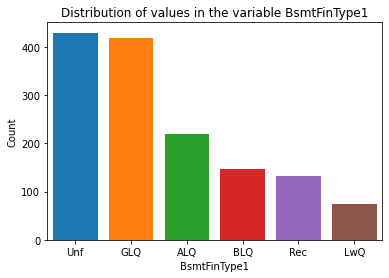

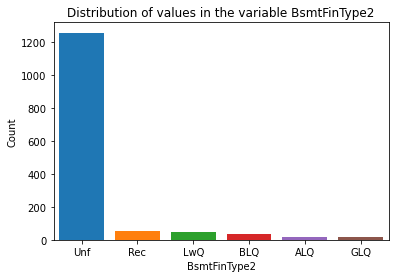

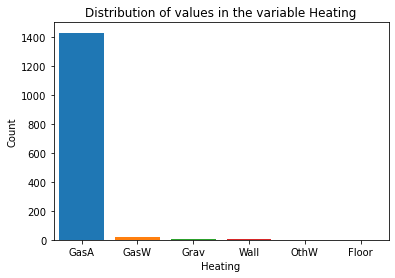

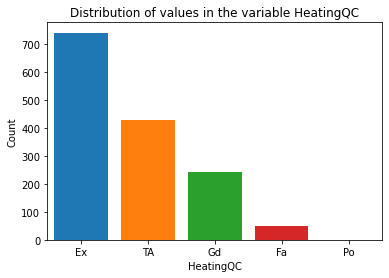

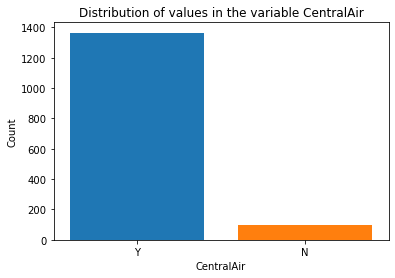

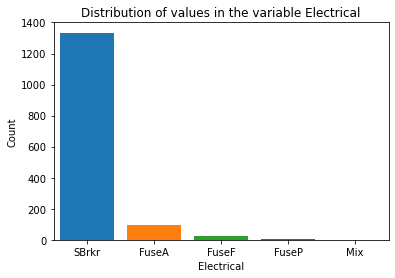

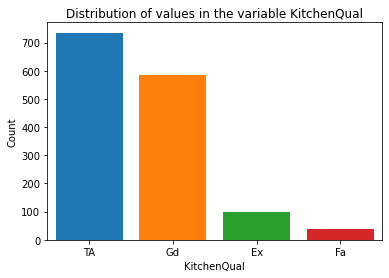

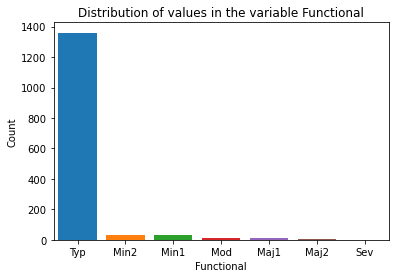

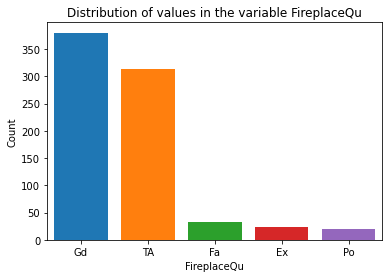

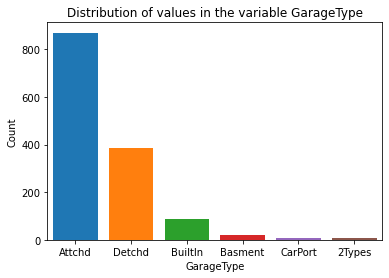

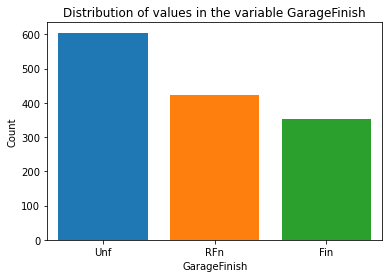

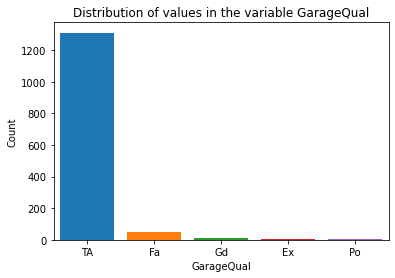

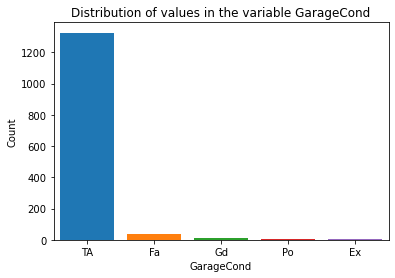

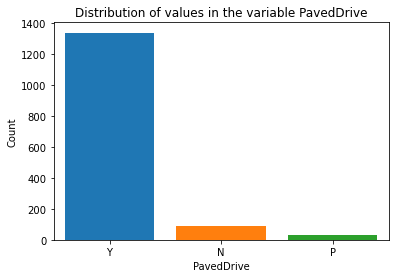

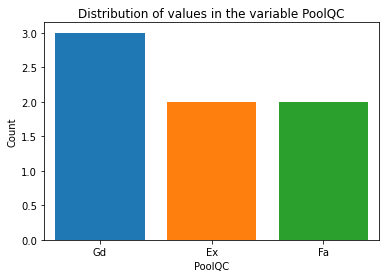

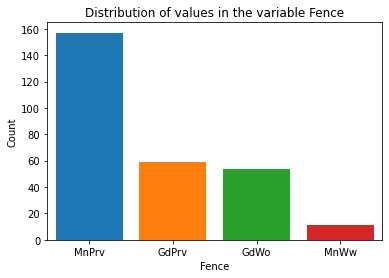

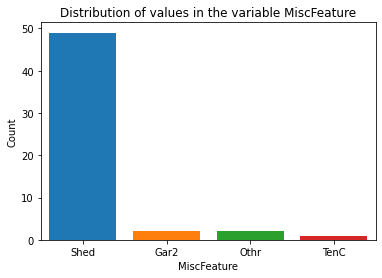

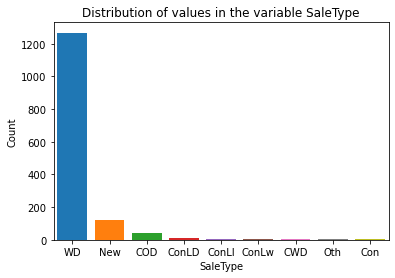

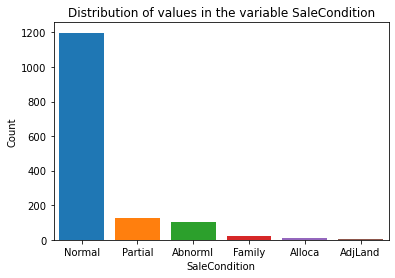

In [15]:
# Show the distribution of categorical data
for cat in categorical_df:
    plt.figure()
    sns.barplot(
            x = categorical_df[cat].value_counts().index,
            y = categorical_df[cat].value_counts(),
            saturation = 1).set(title = f"Distribution of values in the variable {cat}");
    plt.xlabel(cat)
    plt.ylabel('Count')

Almost all of the categorical data seems to follow a pattern of positive skewness. It possible that some this data may have some outliers. These outliers in this sample data will detected in the section where categorical data will be transformed into readable data.

<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:DodgerBlue; font-family:Times;color:#FFFFFF;font-size:150%;text-align:center;border-radius:1px 1px;">DATA WRANGLING</p>

In this section, data will be wrangled in the sense that all missing values will handled in both train and test data. Outliers in the numerical data will be eliminated so that the data can produce an improved result in the prediction model.

***Handling the missing values in all data sets***

In [16]:
# Combine the two datasets
frames = [train_df, test_df]
combined_df = pd.concat(frames, axis = 0)
combined_df = combined_df.drop(['Id', 'SalePrice'], axis = 1)

In [17]:
# Extract the target variable
Y = train_df['SalePrice']

In [18]:
# Generate a dataframe showing the total number of missing values
nan_count_df = combined_df.isnull().sum().sort_values(ascending = False)
nan_proportions_df = ((combined_df.isnull().sum() / combined_df.isnull().count())*100).sort_values(ascending = False)

In [19]:
# combine the dataframes and print

nans_df = pd.concat([nan_count_df, nan_proportions_df], 
                    keys = ["total number of nans", 'total percentage of nans'],axis = 1)

print(nans_df.head(10))

              total number of nans  total percentage of nans
PoolQC                        2909                 99.657417
MiscFeature                   2814                 96.402878
Alley                         2721                 93.216855
Fence                         2348                 80.438506
FireplaceQu                   1420                 48.646797
LotFrontage                    486                 16.649538
GarageYrBlt                    159                  5.447071
GarageFinish                   159                  5.447071
GarageQual                     159                  5.447071
GarageCond                     159                  5.447071


In [20]:
# Eliminate irrelevant variables 
combined_df = combined_df.drop((nans_df[nans_df["total number of nans"] > 100]).index, axis = 1)
combined_df.isnull().sum().sort_values(ascending = False)

BsmtExposure     82
BsmtCond         82
BsmtQual         81
BsmtFinType2     80
BsmtFinType1     79
                 ..
Foundation        0
Heating           0
HeatingQC         0
CentralAir        0
SaleCondition     0
Length: 68, dtype: int64

Variables with too many nans have been eliminated because they cannot add anything to improve our model performace.

In [21]:
# Check for numerical values in numerical data
combined_df.select_dtypes(['int', 'float']).isnull().sum()

MSSubClass        0
LotArea           0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
MasVnrArea       23
BsmtFinSF1        1
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      2
BsmtHalfBath      2
FullBath          0
HalfBath          0
BedroomAbvGr      0
KitchenAbvGr      0
TotRmsAbvGrd      0
Fireplaces        0
GarageCars        1
GarageArea        1
WoodDeckSF        0
OpenPorchSF       0
EnclosedPorch     0
3SsnPorch         0
ScreenPorch       0
PoolArea          0
MiscVal           0
MoSold            0
YrSold            0
dtype: int64

Given the combined data set, we have missing values in ***LotFrontage***, ***MasVnrArea***, ***BsmtFinSF1***, ***BsmtFinSF2***, ***BsmtUnfSF***, ***TotalBsmtSF***, ***BsmtFullBath***, ***BsmtHalfBath***, ***GarageYrBlt***, ***GarageCars***, ***GarageArea***, and ***SalePrice***. Null values exist in ***SalePrice*** because the test data set lacks the target variable.

In [22]:
# Check for missing values in categorical data
combined_df.select_dtypes(exclude = ['int', 'float']).isnull().sum()

MSZoning          4
Street            0
LotShape          0
LandContour       0
Utilities         2
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
RoofStyle         0
RoofMatl          0
Exterior1st       1
Exterior2nd       1
MasVnrType       24
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual         81
BsmtCond         82
BsmtExposure     82
BsmtFinType1     79
BsmtFinType2     80
Heating           0
HeatingQC         0
CentralAir        0
Electrical        1
KitchenQual       1
Functional        2
PavedDrive        0
SaleType          1
SaleCondition     0
dtype: int64

As it can be seen above, categorical variables in the combined data set have so many missing values for example, ***BsmtCond*** has 82 missing values.

In [23]:
# Handling missing values in numerical data
numerical_df = [col for col in combined_df.select_dtypes(['int', 'float'])]

for col in numerical_df:
    combined_df[col].fillna(combined_df[col].median(), inplace = True)

In [24]:
# Handling missing values in categorical data
categorical_df = [col for col in combined_df.select_dtypes(exclude = ['int', 'float'])]

for col in categorical_df:
    combined_df[col].fillna(combined_df[col].value_counts().index[0], inplace = True)

In [25]:
# Check for missing values in the data set
combined_df.isnull().sum().sum()

0

Finally, all the data sets contain no missing values.

***Handling outliers and data skewness in numerical data***

Removing outliers in numerical features in combined_df

In [26]:
# Detect outliers in combined data set
def detect_outlier(feature):
    outliers = []
    data = combined_df[feature]
    mean = np.mean(data)
    std =np.std(data)
    
    for y in data:
        z_score= (y - mean)/std 
        if np.abs(z_score) > 3:
            outliers.append(y)
    print(f"\nOutlier caps for {feature}")
    print('  --95p: {:.1f} / {} values exceed that'.format(data.quantile(.95),
                                                             len([i for i in data
                                                                  if i > data.quantile(.95)])))
    print('  --3sd: {:.1f} / {} values exceed that'.format(mean + 3*(std), len(outliers)))
    print('  --99p: {:.1f} / {} values exceed that'.format(data.quantile(.99),
                                                             len([i for i in data
                                                                  if i > data.quantile(.99)])))

In [27]:
# Determine what the upperbound should be for continuous features in combined data set
for feat in numerical_df:
    detect_outlier(feat)


Outlier caps for MSSubClass
  --95p: 160.0 / 78 values exceed that
  --3sd: 184.7 / 61 values exceed that
  --99p: 190.0 / 0 values exceed that

Outlier caps for LotArea
  --95p: 17142.9 / 146 values exceed that
  --3sd: 33825.0 / 29 values exceed that
  --99p: 33038.6 / 30 values exceed that

Outlier caps for OverallQual
  --95p: 8.0 / 138 values exceed that
  --3sd: 10.3 / 4 values exceed that
  --99p: 10.0 / 0 values exceed that

Outlier caps for OverallCond
  --95p: 8.0 / 41 values exceed that
  --3sd: 8.9 / 58 values exceed that
  --99p: 9.0 / 0 values exceed that

Outlier caps for YearBuilt
  --95p: 2007.0 / 77 values exceed that
  --3sd: 2062.2 / 8 values exceed that
  --99p: 2008.0 / 28 values exceed that

Outlier caps for YearRemodAdd
  --95p: 2007.0 / 128 values exceed that
  --3sd: 2046.9 / 0 values exceed that
  --99p: 2009.0 / 13 values exceed that

Outlier caps for MasVnrArea
  --95p: 466.0 / 145 values exceed that
  --3sd: 637.9 / 63 values exceed that
  --99p: 770.5 / 

In [28]:
# Capping features in combined_df to remover outliers in numerical features

# Upper bounded outliers
for var in ['MSSubClass' ,'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', '1stFlrSF',
           'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'TotRmsAbvGrd', 'Fireplaces','GarageArea', 
           'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']:
    combined_df[var].clip(upper=combined_df[var].quantile(.95), inplace=True)

# Lower and Upper bounded outliers
for var in ['LotArea', 'TotalBsmtSF', 'OverallCond', 'BedroomAbvGr', 'KitchenAbvGr']:
    combined_df[var].clip(lower = combined_df[var].quantile(.05), upper = combined_df[var].quantile(0.95), inplace=True)
      
# Lower bounded outliers    
for var in ['OverallQual', 'YearBuilt']:
    combined_df[var].clip(lower=combined_df[var].quantile(.95), inplace=True)

In [29]:
# Reconcatenate the train data set to recheck the outliers in numerical features
x_train = combined_df[:len(train_df)]

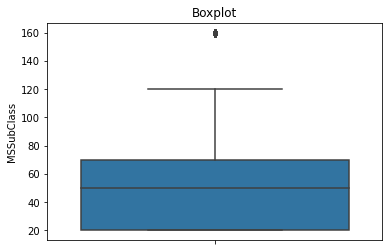

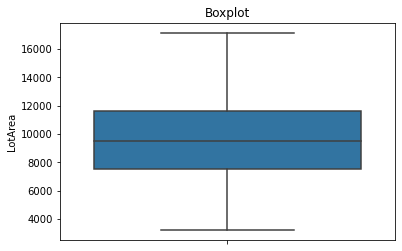

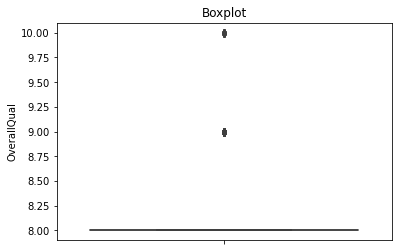

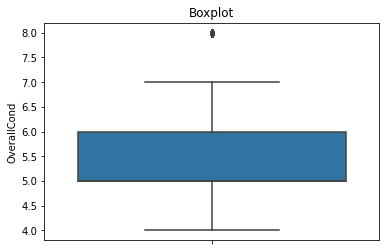

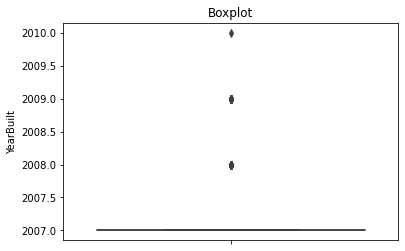

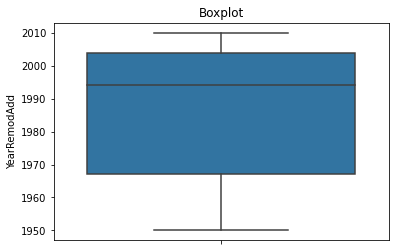

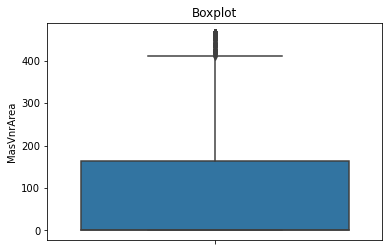

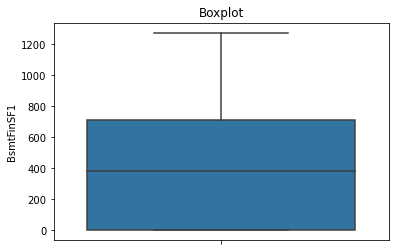

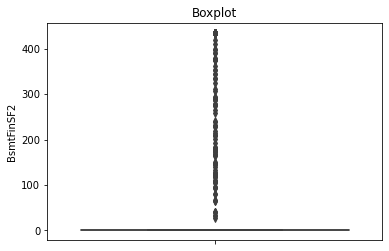

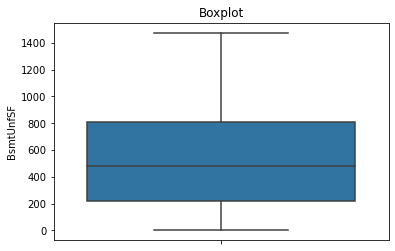

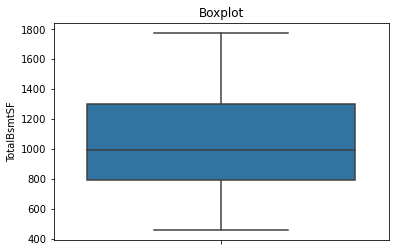

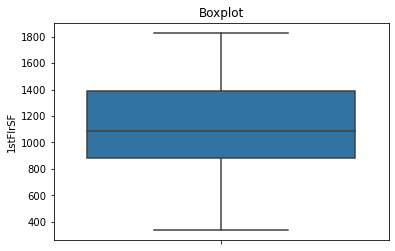

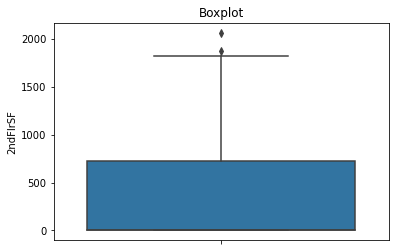

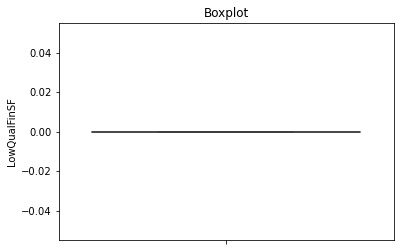

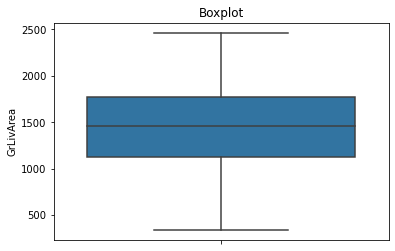

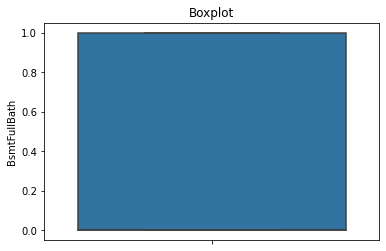

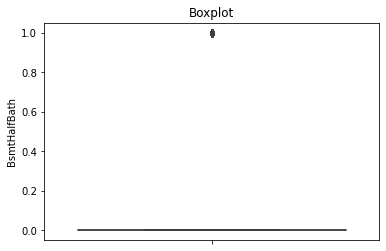

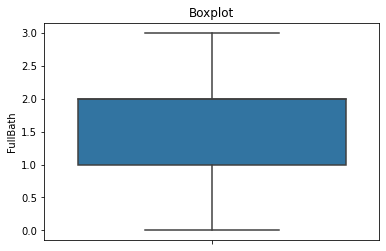

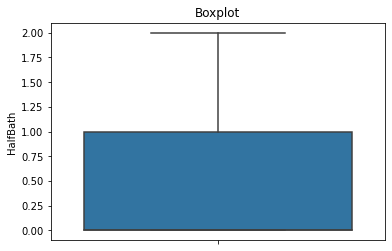

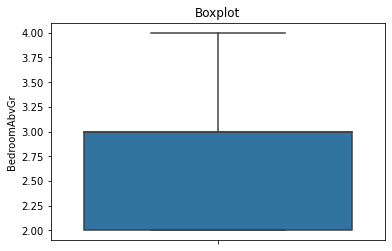

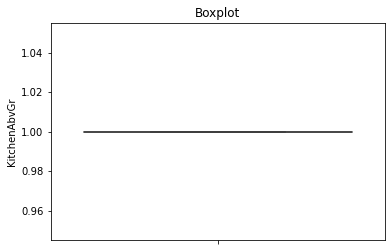

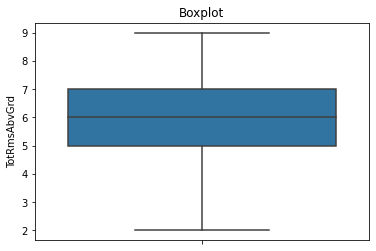

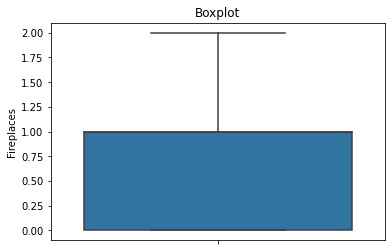

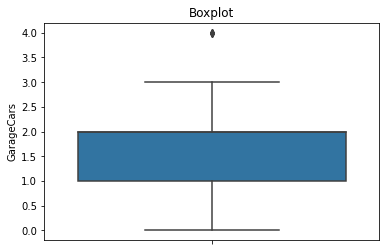

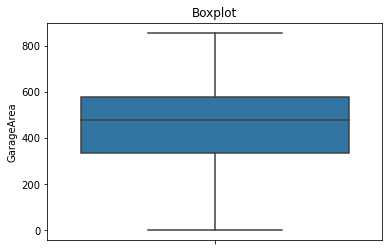

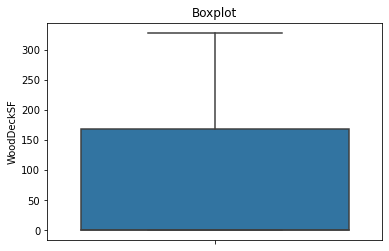

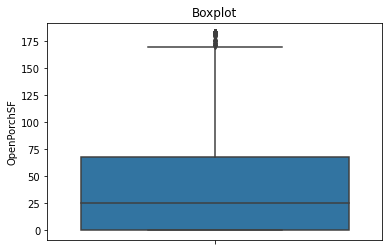

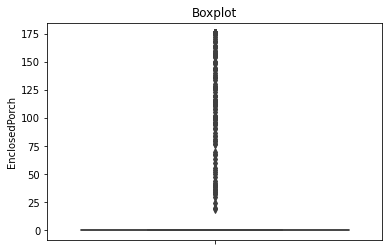

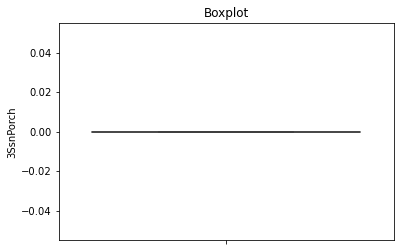

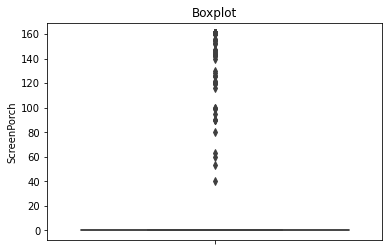

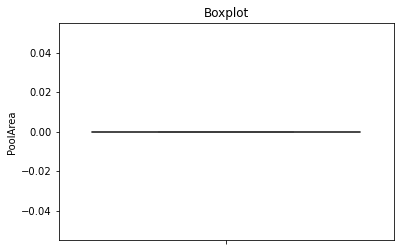

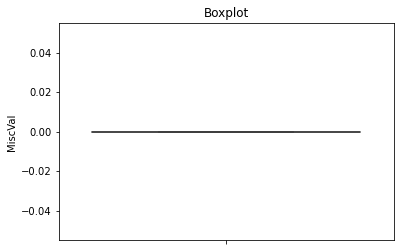

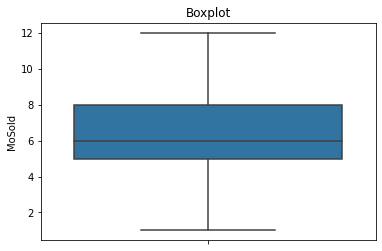

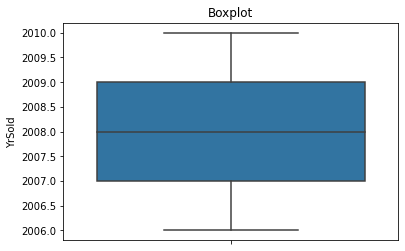

In [30]:
# Check for the presence of outliers in the numerical data again
numerical_df_train = x_train.select_dtypes(['int', 'float'])

def num_plot(df, var):
    
    plt.subplot(1,1,1)
    sns.boxplot(y = df[var])
    plt.title("Boxplot")
    plt.show()
    
for var in numerical_df_train:
    num_plot(numerical_df_train, var)

Atleast there has been a significant reduction in the number of outliers in the numerical features of the combined data set

***Check the skewness in the numerical features of all datasets***

In [31]:
# Check for skewness in the numerical features for the entire data set
vars_skewed = combined_df[numerical_df].apply(lambda x: skew(x)).sort_values(ascending = False)
vars_skewed

YearBuilt        7.442764
OverallQual      5.189142
BsmtHalfBath     3.707260
ScreenPorch      3.040916
BsmtFinSF2       2.995464
EnclosedPorch    2.370024
MasVnrArea       1.447672
OpenPorchSF      1.214885
MSSubClass       1.191260
OverallCond      0.943757
2ndFlrSF         0.861675
WoodDeckSF       0.846377
HalfBath         0.694566
BsmtUnfSF        0.681439
Fireplaces       0.588348
BsmtFinSF1       0.552106
GrLivArea        0.461204
1stFlrSF         0.395660
TotalBsmtSF      0.392617
BsmtFullBath     0.344142
LotArea          0.257051
MoSold           0.195884
FullBath         0.167606
TotRmsAbvGrd     0.160846
BedroomAbvGr     0.148238
YrSold           0.132399
KitchenAbvGr     0.000000
3SsnPorch        0.000000
LowQualFinSF     0.000000
PoolArea         0.000000
MiscVal          0.000000
GarageArea      -0.151633
GarageCars      -0.218593
YearRemodAdd    -0.451020
dtype: float64

Almost all the data in combined_df is positively skewed.

In [32]:
# Correct the skeness in numerical features that have skewness great than 0.3
high_skew = vars_skewed[abs(vars_skewed) > 0.3]
high_skew

YearBuilt        7.442764
OverallQual      5.189142
BsmtHalfBath     3.707260
ScreenPorch      3.040916
BsmtFinSF2       2.995464
EnclosedPorch    2.370024
MasVnrArea       1.447672
OpenPorchSF      1.214885
MSSubClass       1.191260
OverallCond      0.943757
2ndFlrSF         0.861675
WoodDeckSF       0.846377
HalfBath         0.694566
BsmtUnfSF        0.681439
Fireplaces       0.588348
BsmtFinSF1       0.552106
GrLivArea        0.461204
1stFlrSF         0.395660
TotalBsmtSF      0.392617
BsmtFullBath     0.344142
YearRemodAdd    -0.451020
dtype: float64

In [33]:
# Correct the skeness in the numerical features
for feat in high_skew.index:
    combined_df[feat] = np.log1p(combined_df[feat])

In [34]:
# Check for skewness in the numerical data again for the entire data set
vars_skewed = combined_df[numerical_df].apply(lambda x: skew(x)).sort_values(ascending = False)
vars_skewed

YearBuilt        7.441459
OverallQual      5.056025
BsmtHalfBath     3.707260
ScreenPorch      2.924905
BsmtFinSF2       2.425077
EnclosedPorch    1.938643
OverallCond      0.662615
HalfBath         0.580692
MasVnrArea       0.520174
BsmtFullBath     0.344142
2ndFlrSF         0.305049
LotArea          0.257051
Fireplaces       0.204337
MSSubClass       0.200959
MoSold           0.195884
FullBath         0.167606
TotRmsAbvGrd     0.160846
BedroomAbvGr     0.148238
WoodDeckSF       0.146367
YrSold           0.132399
KitchenAbvGr     0.000000
LowQualFinSF     0.000000
3SsnPorch        0.000000
PoolArea         0.000000
MiscVal          0.000000
OpenPorchSF     -0.067221
GarageArea      -0.151633
1stFlrSF        -0.210829
GarageCars      -0.218593
GrLivArea       -0.232240
TotalBsmtSF     -0.296356
YearRemodAdd    -0.458157
BsmtFinSF1      -0.624707
BsmtUnfSF       -2.177902
dtype: float64

Atleast there is a reduction in the skewness of the all the numerical features.

***Handle outliers and skewness in the target variable***

In [35]:
# Capping outliers in the target variable
# Upper bound
Y.clip(upper=Y.quantile(.95), inplace=True)

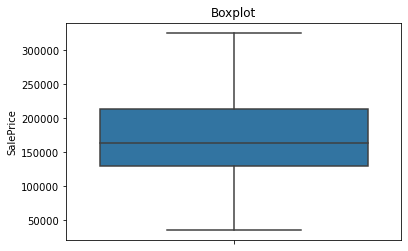

In [36]:
# Check for outliers in the target variable
sns.boxplot(y = Y)
plt.title("Boxplot")
plt.show()

After handling the outliers in the target variable, no outliers can be detected.

In [37]:
# Check for skewness in the the targer variable
vars_skewed = Y.skew()
print("Before handling the skewness in target variable:", vars_skewed)

# Since its positively skewed and greater than 0.3, handle the skewness in the target variable
Y = np.log1p(Y)

# Check for skewness in the the target variable again
vars_skewed = Y.skew()
print("After handling the skewness in target variable:", vars_skewed)

Before handling the skewness in target variable: 0.7215586638935813
After handling the skewness in target variable: -0.22979430478788918


Alteast a reduction in the skewness of all numerical data variables can be seen.

***Handle outliers and skewness in categorical features in combined data frame***

In [38]:
# Categorical data
categorical_df = combined_df.select_dtypes(exclude = ['int', 'float'])
categorical_df.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [39]:
# Convert the categorical data to numerical data
for feature in categorical_df:
    le = preprocessing.LabelEncoder()
    combined_df[feature] = le.fit_transform(combined_df[feature].astype(str))

In [40]:
# Reconcatenate the train data set to recheck the outliers in categoricalfeatures
x_train = combined_df[:len(train_df)]

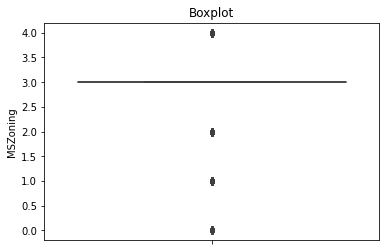

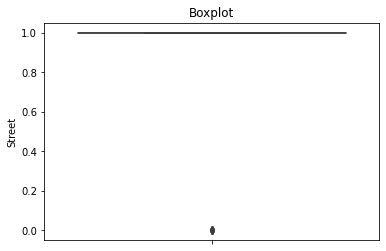

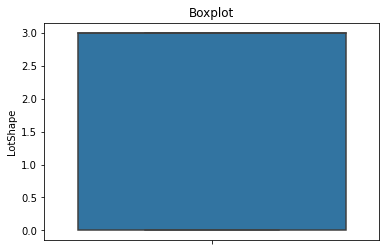

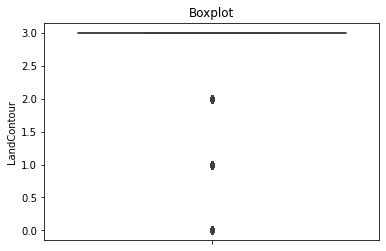

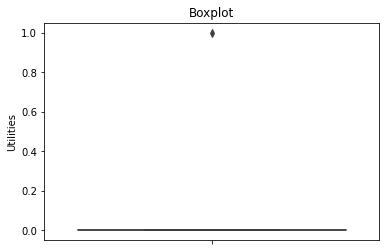

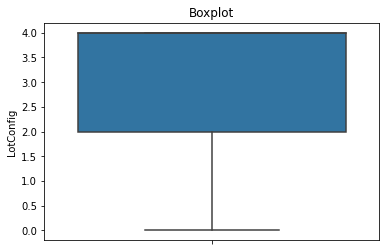

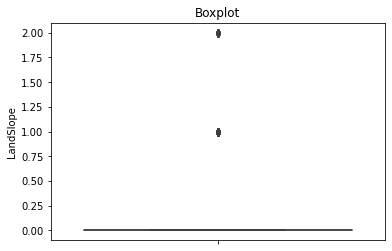

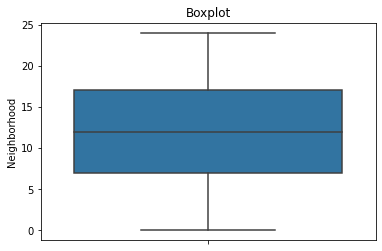

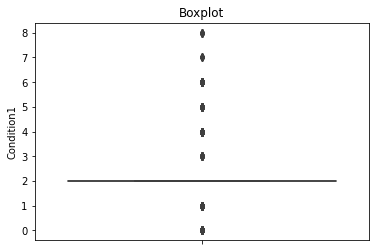

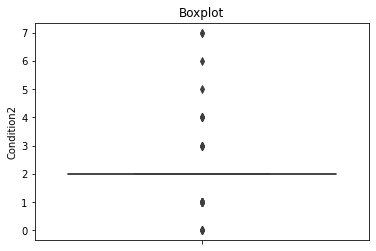

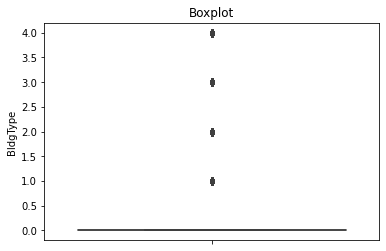

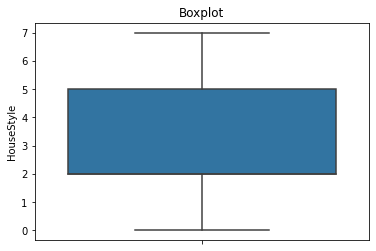

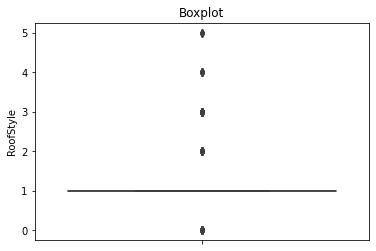

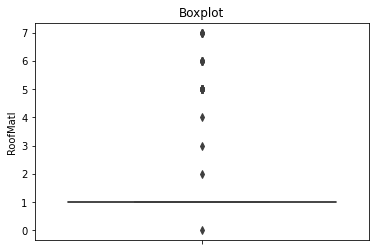

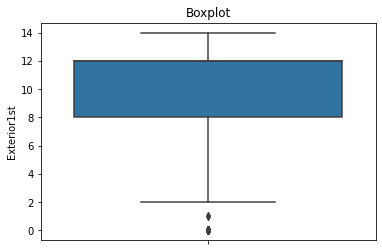

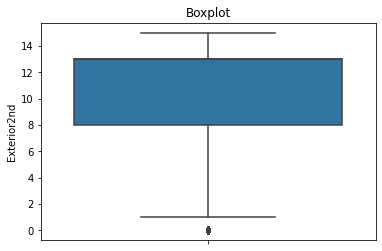

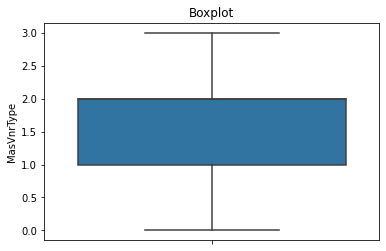

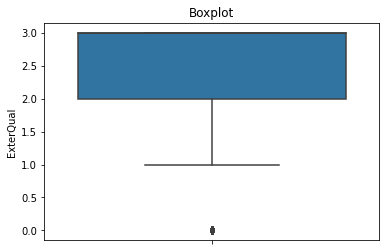

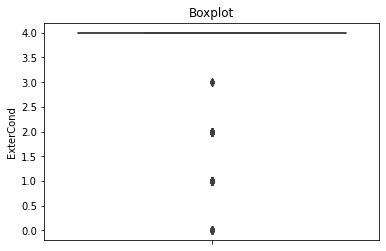

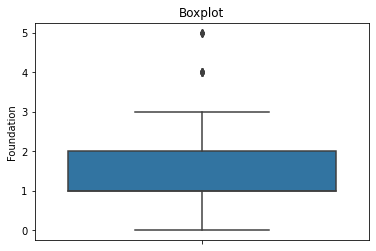

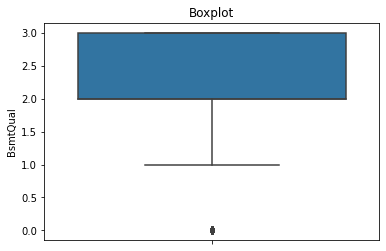

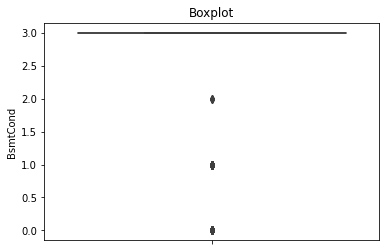

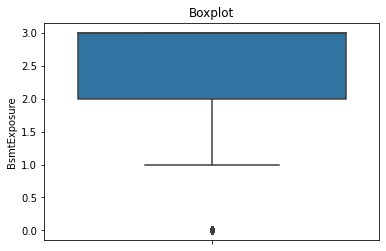

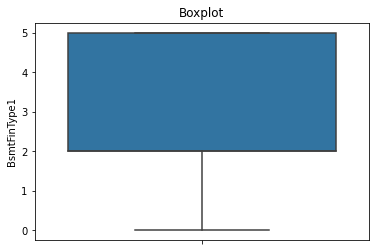

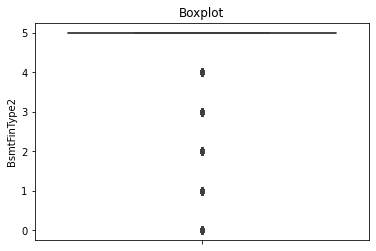

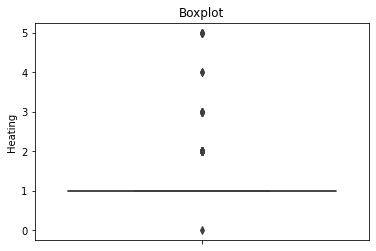

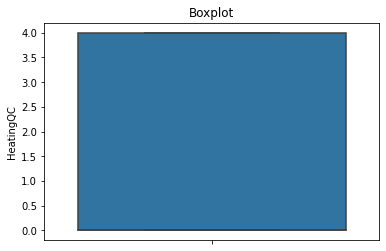

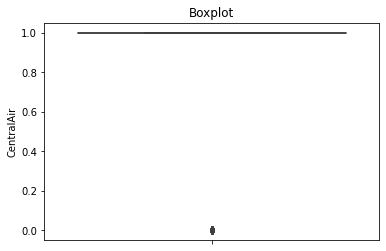

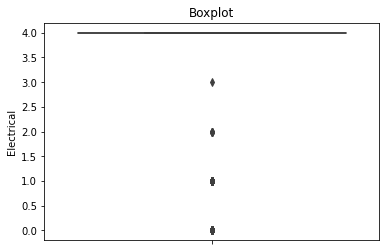

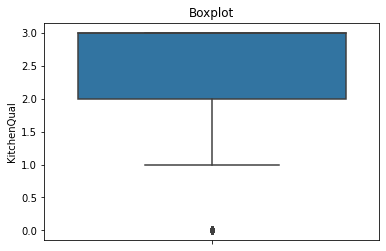

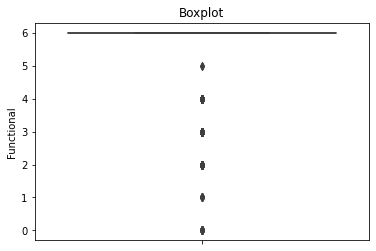

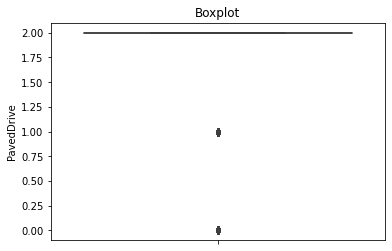

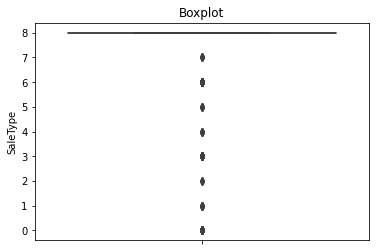

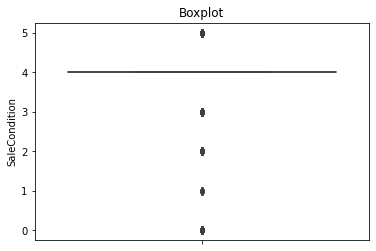

In [41]:
# Identify the outliers in categorical data in the combined data frame
for feat in categorical_df:
    plt.subplot(1,1,1)
    sns.boxplot(y = combined_df[feat])
    plt.title("Boxplot")
    plt.show()

In [42]:
# Detect outliers in catgorical data of the combined data set
def detect_outlier(feature):
    outliers = []
    data = combined_df[feature]
    mean = np.mean(data)
    std =np.std(data)
    
    for y in data:
        z_score= (y - mean)/std 
        if np.abs(z_score) > 3:
            outliers.append(y)
    print(f"\nOutlier caps for {feature}")
    print('  --95p: {:.1f} / {} values exceed that'.format(data.quantile(.95),
                                                             len([i for i in data
                                                                  if i > data.quantile(.95)])))
    print('  --3sd: {:.1f} / {} values exceed that'.format(mean + 3*(std), len(outliers)))
    print('  --99p: {:.1f} / {} values exceed that'.format(data.quantile(.99),
                                                             len([i for i in data
                                                                  if i > data.quantile(.99)])))

In [43]:
for feat in categorical_df:
    detect_outlier(feat)


Outlier caps for MSZoning
  --95p: 4.0 / 0 values exceed that
  --3sd: 5.0 / 164 values exceed that
  --99p: 4.0 / 0 values exceed that

Outlier caps for Street
  --95p: 1.0 / 0 values exceed that
  --3sd: 1.2 / 12 values exceed that
  --99p: 1.0 / 0 values exceed that

Outlier caps for LotShape
  --95p: 3.0 / 0 values exceed that
  --3sd: 6.2 / 0 values exceed that
  --99p: 3.0 / 0 values exceed that

Outlier caps for LandContour
  --95p: 3.0 / 0 values exceed that
  --3sd: 4.9 / 117 values exceed that
  --99p: 3.0 / 0 values exceed that

Outlier caps for Utilities
  --95p: 0.0 / 1 values exceed that
  --3sd: 0.1 / 1 values exceed that
  --99p: 0.0 / 1 values exceed that

Outlier caps for LotConfig
  --95p: 4.0 / 0 values exceed that
  --3sd: 7.9 / 0 values exceed that
  --99p: 4.0 / 0 values exceed that

Outlier caps for LandSlope
  --95p: 0.0 / 141 values exceed that
  --3sd: 0.8 / 141 values exceed that
  --99p: 1.0 / 16 values exceed that

Outlier caps for Neighborhood
  --95p: 2

In [44]:
# Capping features in combined_df to remove outliers in categorical features

# Upper bounded outliers
for cat in ['Utilities', 'LandSlope', 'BldgType', 'Foundation']:
    combined_df[cat].clip(upper=combined_df[cat].quantile(.95), inplace=True)

# Less lower but more upper bounded outliers
for cat in ['MSZoning','SaleCondition']:
    combined_df[cat].clip(lower = combined_df[cat].quantile(.01), upper = combined_df[cat].quantile(0.99), inplace=True)

# Much lower but less upper bounded outliers
for cat in ['Condition1', 'Condition2','RoofStyle', 'RoofMatl', 'Heating']:
    combined_df[cat].clip(lower = combined_df[cat].quantile(.05), upper = combined_df[cat].quantile(0.95), inplace=True)
      
# Lower bounded outliers    
for cat in ['Street', 'LandContour', 'Exterior1st','Exterior2nd', 'ExterQual', 'ExterCond',
            'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType2','CentralAir', 'Electrical', 'KitchenQual',
            'Functional', 'PavedDrive', 'SaleType']:
    combined_df[cat].clip(lower=combined_df[cat].quantile(.95), inplace=True)

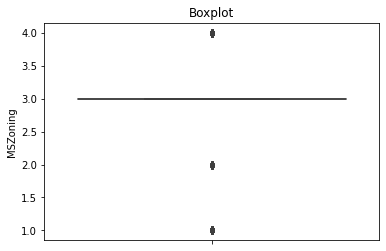

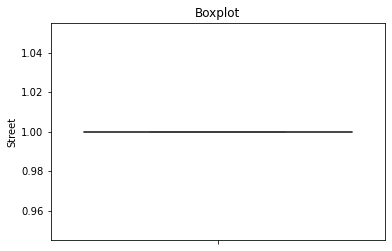

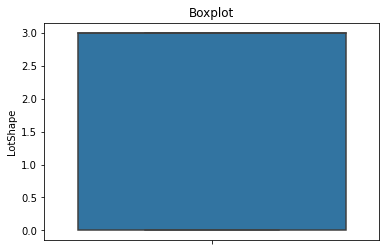

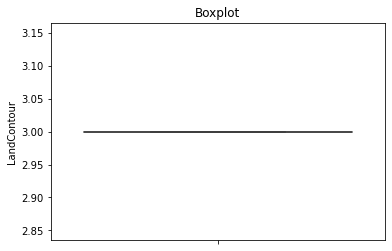

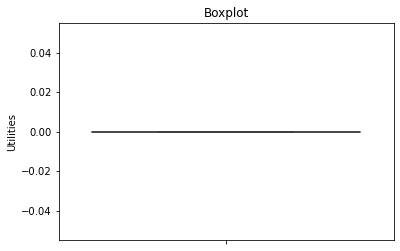

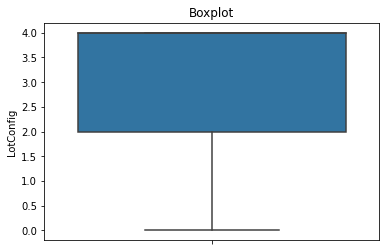

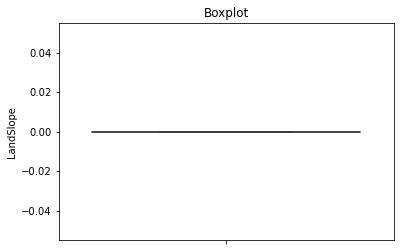

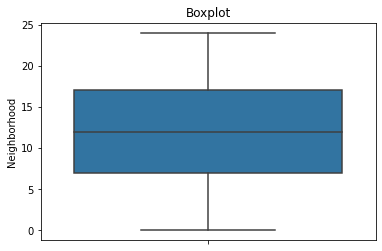

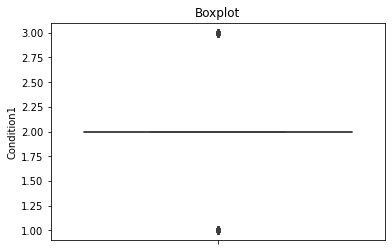

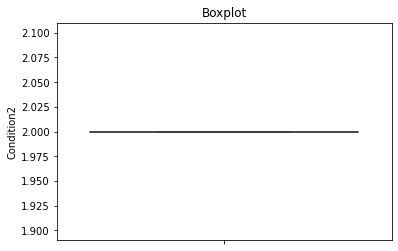

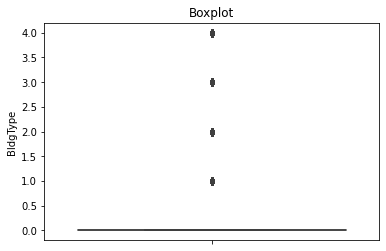

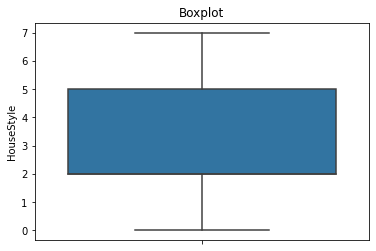

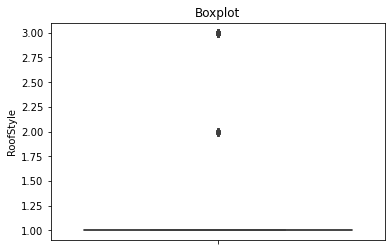

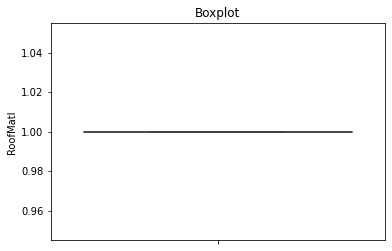

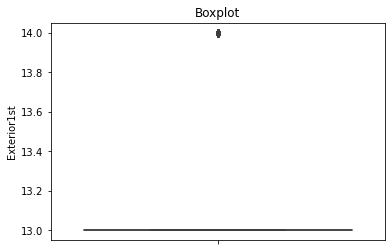

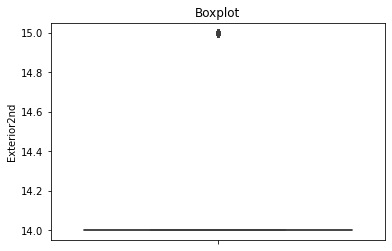

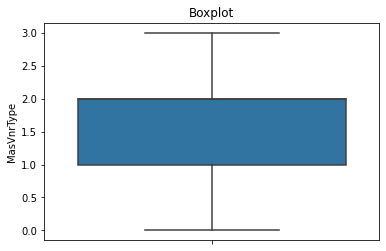

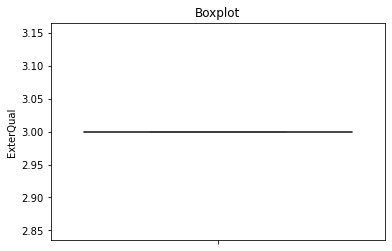

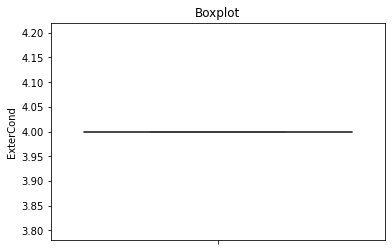

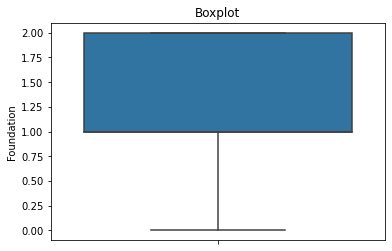

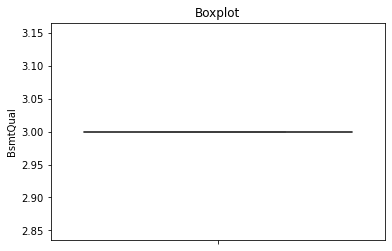

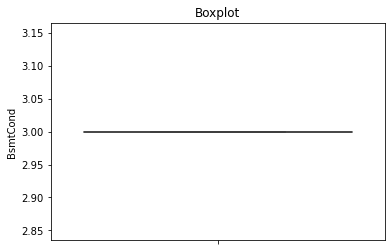

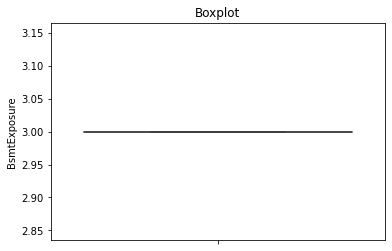

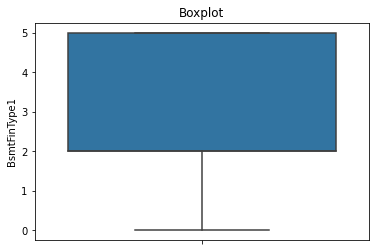

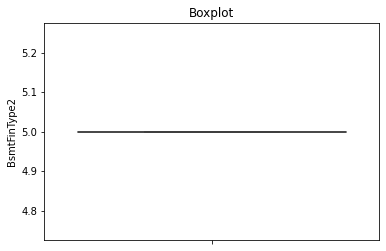

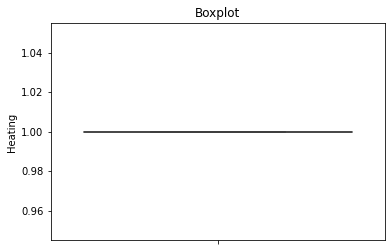

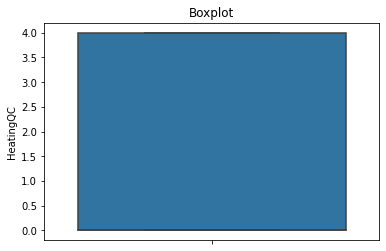

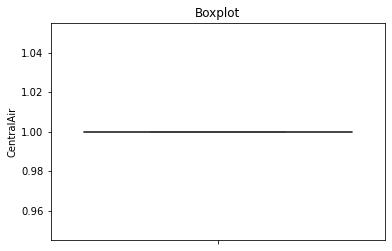

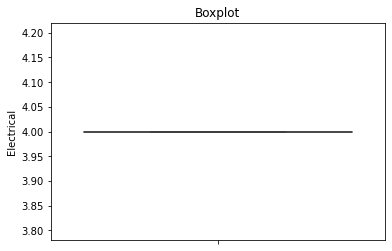

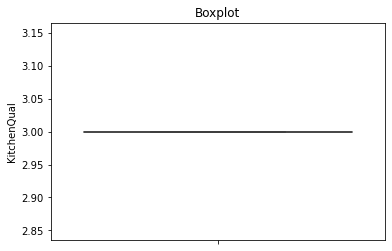

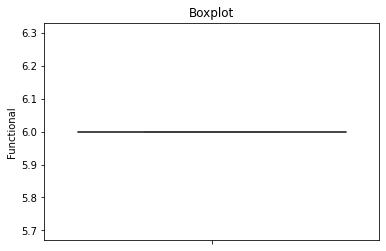

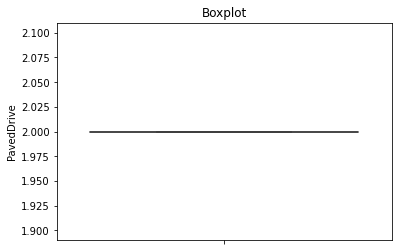

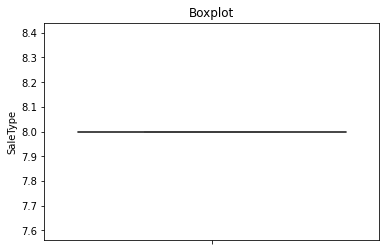

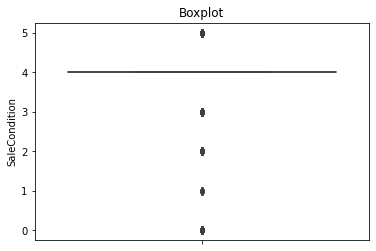

In [45]:
# Check for the presence of outliers in the categorical data again
for feat in categorical_df:
    plt.subplot(1,1,1)
    sns.boxplot(y = combined_df[feat])
    plt.title("Boxplot")
    plt.show()

It can be seen that outliers reduce atleast to a certain extent in categorical data

***Handling the skewness in categorical data***

In [46]:
# Identify the skewness in the categorical data
for cat in categorical_df:
    cat_skewed = combined_df[cat].skew()
    print(f"{cat}", cat_skewed)

MSZoning -1.410799715713537
Street 0
LotShape -0.6180074661788829
LandContour 0
Utilities 0
LotConfig -1.1969012059819362
LandSlope 0
Neighborhood 0.01626935770093015
Condition1 -0.40332669089801587
Condition2 0
BldgType 2.1933884721231625
HouseStyle 0.3172593354155327
RoofStyle 1.516308466906074
RoofMatl 0
Exterior1st 7.013922894315169
Exterior2nd 5.75322452698341
MasVnrType -0.07045631083637861
ExterQual 0
ExterCond 0
Foundation -0.5723015745823071
BsmtQual 0
BsmtCond 0
BsmtExposure 0
BsmtFinType1 -0.0902919570878218
BsmtFinType2 0
Heating 0
HeatingQC 0.48690624436583385
CentralAir 0
Electrical 0
KitchenQual 0
Functional 0
PavedDrive 0
SaleType 0
SaleCondition -2.7894723560144894


In [47]:
# Correct the skewness in categorical features of the combined data if skewness is greater than 0.3.
for cat in categorical_df:
    cat_skewed = combined_df[cat].skew()
    if (cat_skewed) > 0.3:
        combined_df[cat] = np.log1p(combined_df[cat])

In [48]:
# Confirm the skewness in the categorical data again
for cat in categorical_df:
    cat_skewed = combined_df[cat].skew()
    print(f"{cat}", cat_skewed)

MSZoning -1.410799715713537
Street 0
LotShape -0.6180074661788829
LandContour 0
Utilities 0
LotConfig -1.1969012059819362
LandSlope 0
Neighborhood 0.01626935770093015
Condition1 -0.40332669089801587
Condition2 0
BldgType 1.9710655816947502
HouseStyle -0.7779733665885069
RoofStyle 1.5087692761500657
RoofMatl 0
Exterior1st 7.013922894315209
Exterior2nd 5.753224526983387
MasVnrType -0.07045631083637861
ExterQual 0
ExterCond 0
Foundation -0.5723015745823071
BsmtQual 0
BsmtCond 0
BsmtExposure 0
BsmtFinType1 -0.0902919570878218
BsmtFinType2 0
Heating 0
HeatingQC 0.2574361740496978
CentralAir 0
Electrical 0
KitchenQual 0
Functional 0
PavedDrive 0
SaleType 0
SaleCondition -2.7894723560144894


Atleast some skewness has been reduced in some data variables.

<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:DodgerBlue; font-family:Times;color:#FFFFFF;font-size:150%;text-align:center;border-radius:1px 1px;">FEATURE ENGINEERING</p>

***Selecting best numerical features***

In [49]:
# Reconcatenate the data
x_train = combined_df[:len(train_df)]
x_test = combined_df[len(train_df):]

In [50]:
# Identify the correlations in the numerical data

# Independent variables
X_num = x_train[numerical_df]

# Dependent variable
YY = Y

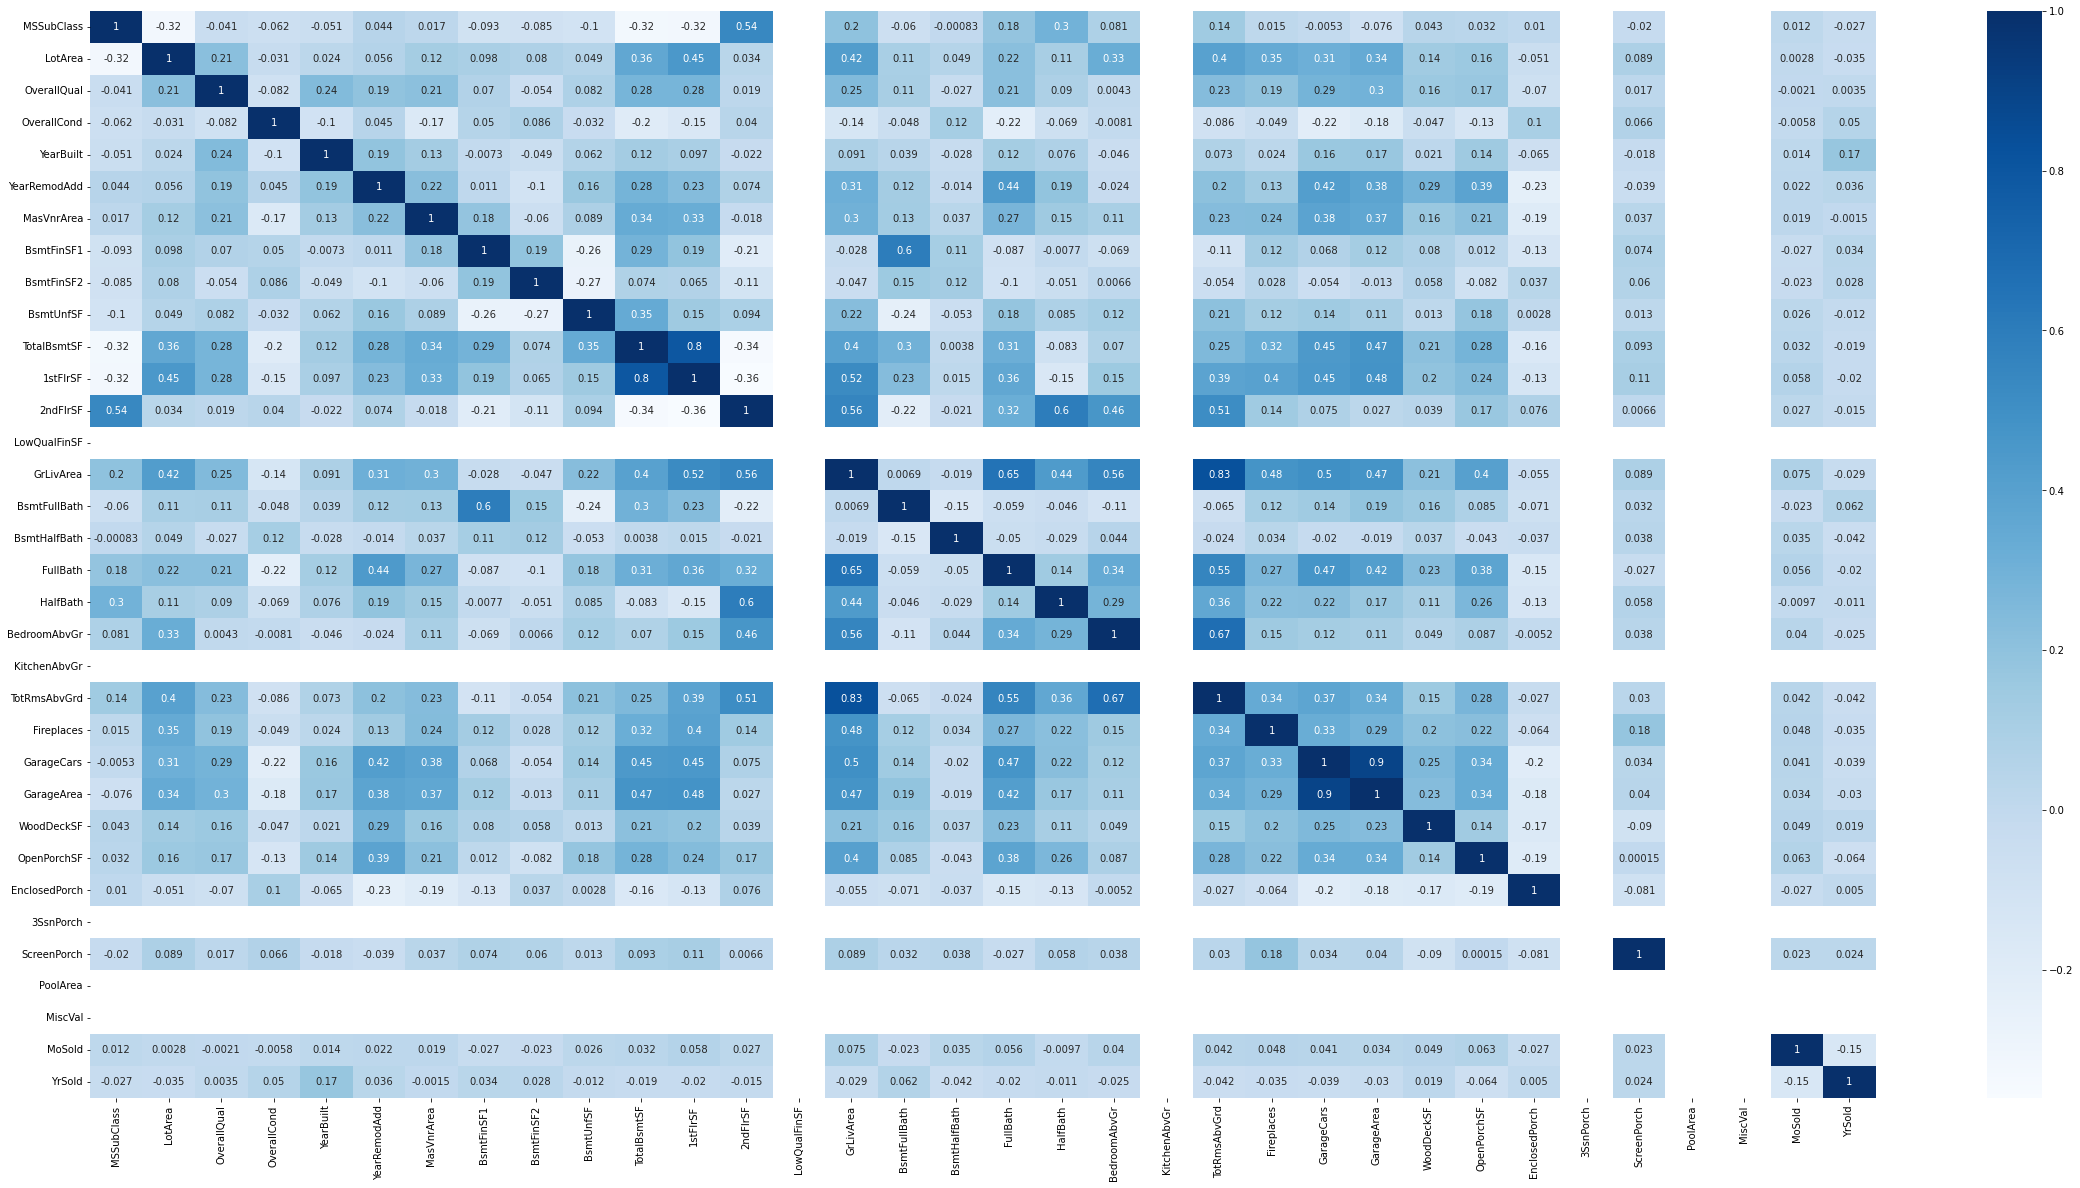

In [51]:
# Generate a correlation
matrix = X_num.corr()
plt.figure(figsize = [40, 20])
sns.heatmap(matrix, annot = True, cmap = "Blues");

Strong correlations among features is not highly encouragable because it results into a noisy signal in the prediction model which cannot give us clear information about the features that contributing more to the predictions. As such, features with strong correlations among themselves will be eliminated. 

In [52]:
# Select strong correlations among features
cor_pairs = matrix.unstack()
sorted_pairs = cor_pairs.sort_values(kind = 'quicksort')
strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.7]

print(strong_pairs)

TotalBsmtSF    1stFlrSF         0.795894
1stFlrSF       TotalBsmtSF      0.795894
TotRmsAbvGrd   GrLivArea        0.826202
GrLivArea      TotRmsAbvGrd     0.826202
GarageArea     GarageCars       0.896274
GarageCars     GarageArea       0.896274
MSSubClass     MSSubClass       1.000000
BsmtFullBath   BsmtFullBath     1.000000
ScreenPorch    ScreenPorch      1.000000
LotArea        LotArea          1.000000
OverallQual    OverallQual      1.000000
OverallCond    OverallCond      1.000000
YearBuilt      YearBuilt        1.000000
YearRemodAdd   YearRemodAdd     1.000000
MasVnrArea     MasVnrArea       1.000000
BsmtFinSF1     BsmtFinSF1       1.000000
BsmtFinSF2     BsmtFinSF2       1.000000
BsmtUnfSF      BsmtUnfSF        1.000000
TotalBsmtSF    TotalBsmtSF      1.000000
1stFlrSF       1stFlrSF         1.000000
MoSold         MoSold           1.000000
2ndFlrSF       2ndFlrSF         1.000000
BsmtHalfBath   BsmtHalfBath     1.000000
FullBath       FullBath         1.000000
HalfBath       H

In [53]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

# Get top pairs
def get_top_abs_correlations(df, n=10):
    corr_list = df.abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    corr_list = corr_list.drop(labels=labels_to_drop).sort_values(ascending=False)
    return corr_list[0:n]

In [54]:
# Get top 10 correlation pairs
print('Top 10 correlation pairs:')
get_top_abs_correlations(matrix, 10)

Top 10 correlation pairs:


GarageCars    GarageArea      0.896274
GrLivArea     TotRmsAbvGrd    0.826202
TotalBsmtSF   1stFlrSF        0.795894
BedroomAbvGr  TotRmsAbvGrd    0.672462
GrLivArea     FullBath        0.647550
BsmtFinSF1    BsmtFullBath    0.597364
2ndFlrSF      HalfBath        0.596198
              GrLivArea       0.558675
GrLivArea     BedroomAbvGr    0.555964
FullBath      TotRmsAbvGrd    0.553620
dtype: float64

In [55]:
# Feature Selection
YY = le.fit_transform(YY)
from sklearn.datasets import make_friedman1
from sklearn.svm import SVR
X_num, YY = make_friedman1(n_samples=1460, n_features=34, random_state=2)
estimator = SVR(kernel="linear")
rfe = RFE(estimator, n_features_to_select=5, step=1)
rfe = rfe.fit(X_num, YY)

In [56]:
num_cols = x_train[numerical_df].columns
num_cols

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

In [57]:
# Check the RFE ranking
X_num = pd.DataFrame(X_num, columns = [num_cols])
list(zip(X_num.columns, rfe.support_, rfe.ranking_))

[(('MSSubClass',), True, 1),
 (('LotArea',), True, 1),
 (('OverallQual',), False, 13),
 (('OverallCond',), True, 1),
 (('YearBuilt',), True, 1),
 (('YearRemodAdd',), False, 9),
 (('MasVnrArea',), False, 20),
 (('BsmtFinSF1',), False, 4),
 (('BsmtFinSF2',), False, 6),
 (('BsmtUnfSF',), False, 30),
 (('TotalBsmtSF',), False, 16),
 (('1stFlrSF',), False, 29),
 (('2ndFlrSF',), False, 26),
 (('LowQualFinSF',), False, 12),
 (('GrLivArea',), False, 10),
 (('BsmtFullBath',), False, 11),
 (('BsmtHalfBath',), False, 5),
 (('FullBath',), False, 24),
 (('HalfBath',), False, 3),
 (('BedroomAbvGr',), False, 18),
 (('KitchenAbvGr',), False, 23),
 (('TotRmsAbvGrd',), False, 17),
 (('Fireplaces',), False, 7),
 (('GarageCars',), False, 2),
 (('GarageArea',), False, 22),
 (('WoodDeckSF',), False, 8),
 (('OpenPorchSF',), False, 27),
 (('EnclosedPorch',), False, 14),
 (('3SsnPorch',), True, 1),
 (('ScreenPorch',), False, 15),
 (('PoolArea',), False, 21),
 (('MiscVal',), False, 19),
 (('MoSold',), False, 28

In [58]:
# Columns selected by RFE
cols = X_num.columns[rfe.support_]
cols

MultiIndex([( 'MSSubClass',),
            (    'LotArea',),
            ('OverallCond',),
            (  'YearBuilt',),
            (  '3SsnPorch',)],
           )

In [59]:
# columns not selected by RFE
X_num.columns[~rfe.support_]

MultiIndex([(  'OverallQual',),
            ( 'YearRemodAdd',),
            (   'MasVnrArea',),
            (   'BsmtFinSF1',),
            (   'BsmtFinSF2',),
            (    'BsmtUnfSF',),
            (  'TotalBsmtSF',),
            (     '1stFlrSF',),
            (     '2ndFlrSF',),
            ( 'LowQualFinSF',),
            (    'GrLivArea',),
            ( 'BsmtFullBath',),
            ( 'BsmtHalfBath',),
            (     'FullBath',),
            (     'HalfBath',),
            ( 'BedroomAbvGr',),
            ( 'KitchenAbvGr',),
            ( 'TotRmsAbvGrd',),
            (   'Fireplaces',),
            (   'GarageCars',),
            (   'GarageArea',),
            (   'WoodDeckSF',),
            (  'OpenPorchSF',),
            ('EnclosedPorch',),
            (  'ScreenPorch',),
            (     'PoolArea',),
            (      'MiscVal',),
            (       'MoSold',),
            (       'YrSold',)],
           )

Thus, ***MSSubClass***, ***LotArea***, ***OverallCond***, ***YearBuilt*** and ***3SsnPorch*** are the most important features among the numerical data.

In [60]:
# Generate a pair plot for the selected numerical features
num_vals = x_train[['MSSubClass', 'LotArea', 'OverallCond', 'YearBuilt', '3SsnPorch']]
num_vals.head()

MSSubClass  LotArea  OverallCond  YearBuilt  3SsnPorch
0    4.110874   8450.0     1.791759   7.604894        0.0
1    3.044522   9600.0     2.197225   7.604894        0.0
2    4.110874  11250.0     1.791759   7.604894        0.0
3    4.262680   9550.0     1.791759   7.604894        0.0
4    4.110874  14260.0     1.791759   7.604894        0.0

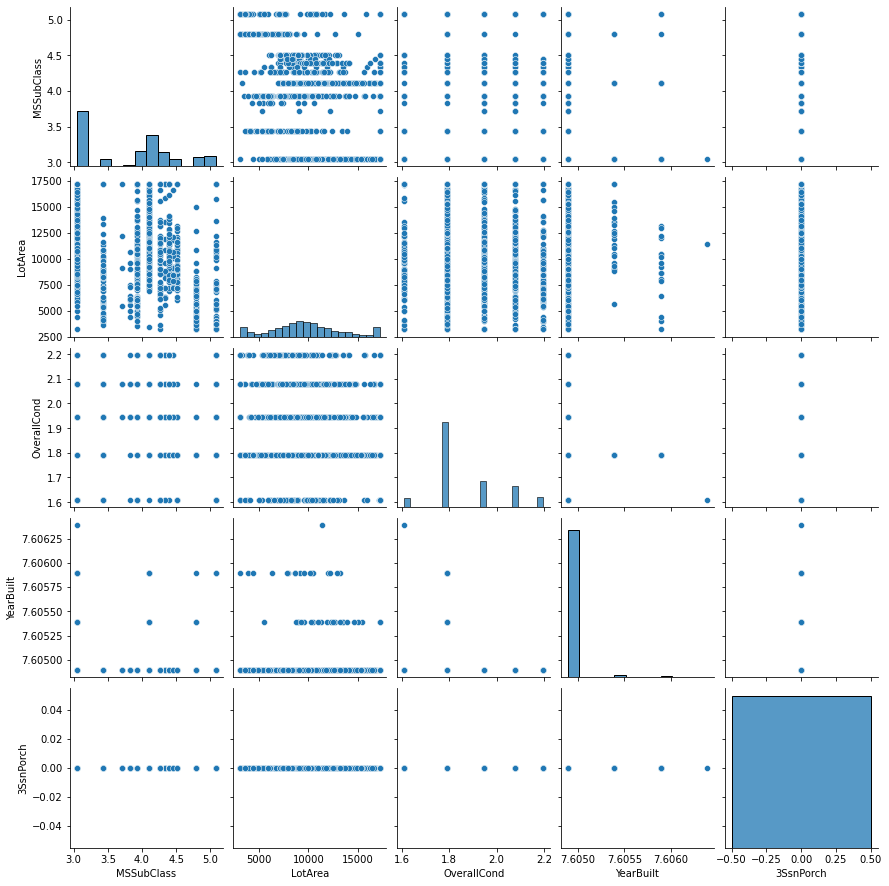

In [61]:
sns.pairplot(num_vals)

From the graphs plotted above, we can see that the features chosen finally are not correlated to each which is good for the prediction model.

***Select the best features in categorical data***

In [62]:
# Collecting the categorical data
cat_vars = x_train[categorical_df.columns]
Y = pd.DataFrame(Y, columns = ['SalePrice'])

In [63]:
# Perform the chi test and determine the f score and the p value
f_p_values = chi2(cat_vars, Y.astype('int'))
f_p_values

(array([1.46499522e+01, 0.00000000e+00, 1.13663823e+02, 0.00000000e+00,
                   nan, 3.47365296e+00,            nan, 5.30292443e+01,
        2.88666296e+00, 0.00000000e+00, 1.29853392e+01, 2.65261817e+01,
        5.16611076e-01, 0.00000000e+00, 1.95858683e-04, 2.11675218e-04,
        6.29269669e-01, 0.00000000e+00, 0.00000000e+00, 1.07050372e+02,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.27064492e+01,
        0.00000000e+00, 0.00000000e+00, 1.93570853e+02, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.93700114e+01]),
 array([6.58875414e-04, 1.00000000e+00, 2.08072400e-25, 1.00000000e+00,
                   nan, 1.76078303e-01,            nan, 3.05383737e-12,
        2.36139752e-01, 1.00000000e+00, 1.51450050e-03, 1.73745205e-06,
        7.72359211e-01, 1.00000000e+00, 9.99902075e-01, 9.99894168e-01,
        7.30055417e-01, 1.00000000e+00, 1.00000000e+00, 5.67945967e-24,
        1.00000000e+00

Chi-square is used to find F-score and p-values for categorical features. So in this case the first array is for F score and the second array is for p-values.The higher the value of the F score is the more important the feature and the smaller the value of the p-value the more important will be the feature. A p-value less 0.005 indicates that the feature is important.

In [64]:
# Representing the p values in list form
p_values = pd.Series(f_p_values[1])
p_values.index = categorical_df.columns
p_values

MSZoning         6.588754e-04
Street           1.000000e+00
LotShape         2.080724e-25
LandContour      1.000000e+00
Utilities                 NaN
LotConfig        1.760783e-01
LandSlope                 NaN
Neighborhood     3.053837e-12
Condition1       2.361398e-01
Condition2       1.000000e+00
BldgType         1.514500e-03
HouseStyle       1.737452e-06
RoofStyle        7.723592e-01
RoofMatl         1.000000e+00
Exterior1st      9.999021e-01
Exterior2nd      9.998942e-01
MasVnrType       7.300554e-01
ExterQual        1.000000e+00
ExterCond        1.000000e+00
Foundation       5.679460e-24
BsmtQual         1.000000e+00
BsmtCond         1.000000e+00
BsmtExposure     1.000000e+00
BsmtFinType1     1.741124e-03
BsmtFinType2     1.000000e+00
Heating          1.000000e+00
HeatingQC        9.260264e-43
CentralAir       1.000000e+00
Electrical       1.000000e+00
KitchenQual      1.000000e+00
Functional       1.000000e+00
PavedDrive       1.000000e+00
SaleType         1.000000e+00
SaleCondit

In [65]:
# Sorting the p values in ascending order
p_values.sort_values(ascending = True)

HeatingQC        9.260264e-43
LotShape         2.080724e-25
Foundation       5.679460e-24
Neighborhood     3.053837e-12
HouseStyle       1.737452e-06
SaleCondition    6.220932e-05
MSZoning         6.588754e-04
BldgType         1.514500e-03
BsmtFinType1     1.741124e-03
LotConfig        1.760783e-01
Condition1       2.361398e-01
MasVnrType       7.300554e-01
RoofStyle        7.723592e-01
Exterior2nd      9.998942e-01
Exterior1st      9.999021e-01
Condition2       1.000000e+00
PavedDrive       1.000000e+00
Functional       1.000000e+00
KitchenQual      1.000000e+00
Electrical       1.000000e+00
CentralAir       1.000000e+00
Street           1.000000e+00
Heating          1.000000e+00
BsmtCond         1.000000e+00
BsmtExposure     1.000000e+00
BsmtQual         1.000000e+00
LandContour      1.000000e+00
ExterCond        1.000000e+00
SaleType         1.000000e+00
RoofMatl         1.000000e+00
BsmtFinType2     1.000000e+00
ExterQual        1.000000e+00
Utilities                 NaN
LandSlope 

The sorted list of features above shows that ***Heating***, ***LotShape***, ***Foundation***, ***Neighborhood***, ***HouseStyle***, ***SaleCondition***, ***MSZoning***, ***BldgType***, and ***BsmtFinType1*** are the most important since their p value is less than 0.05.

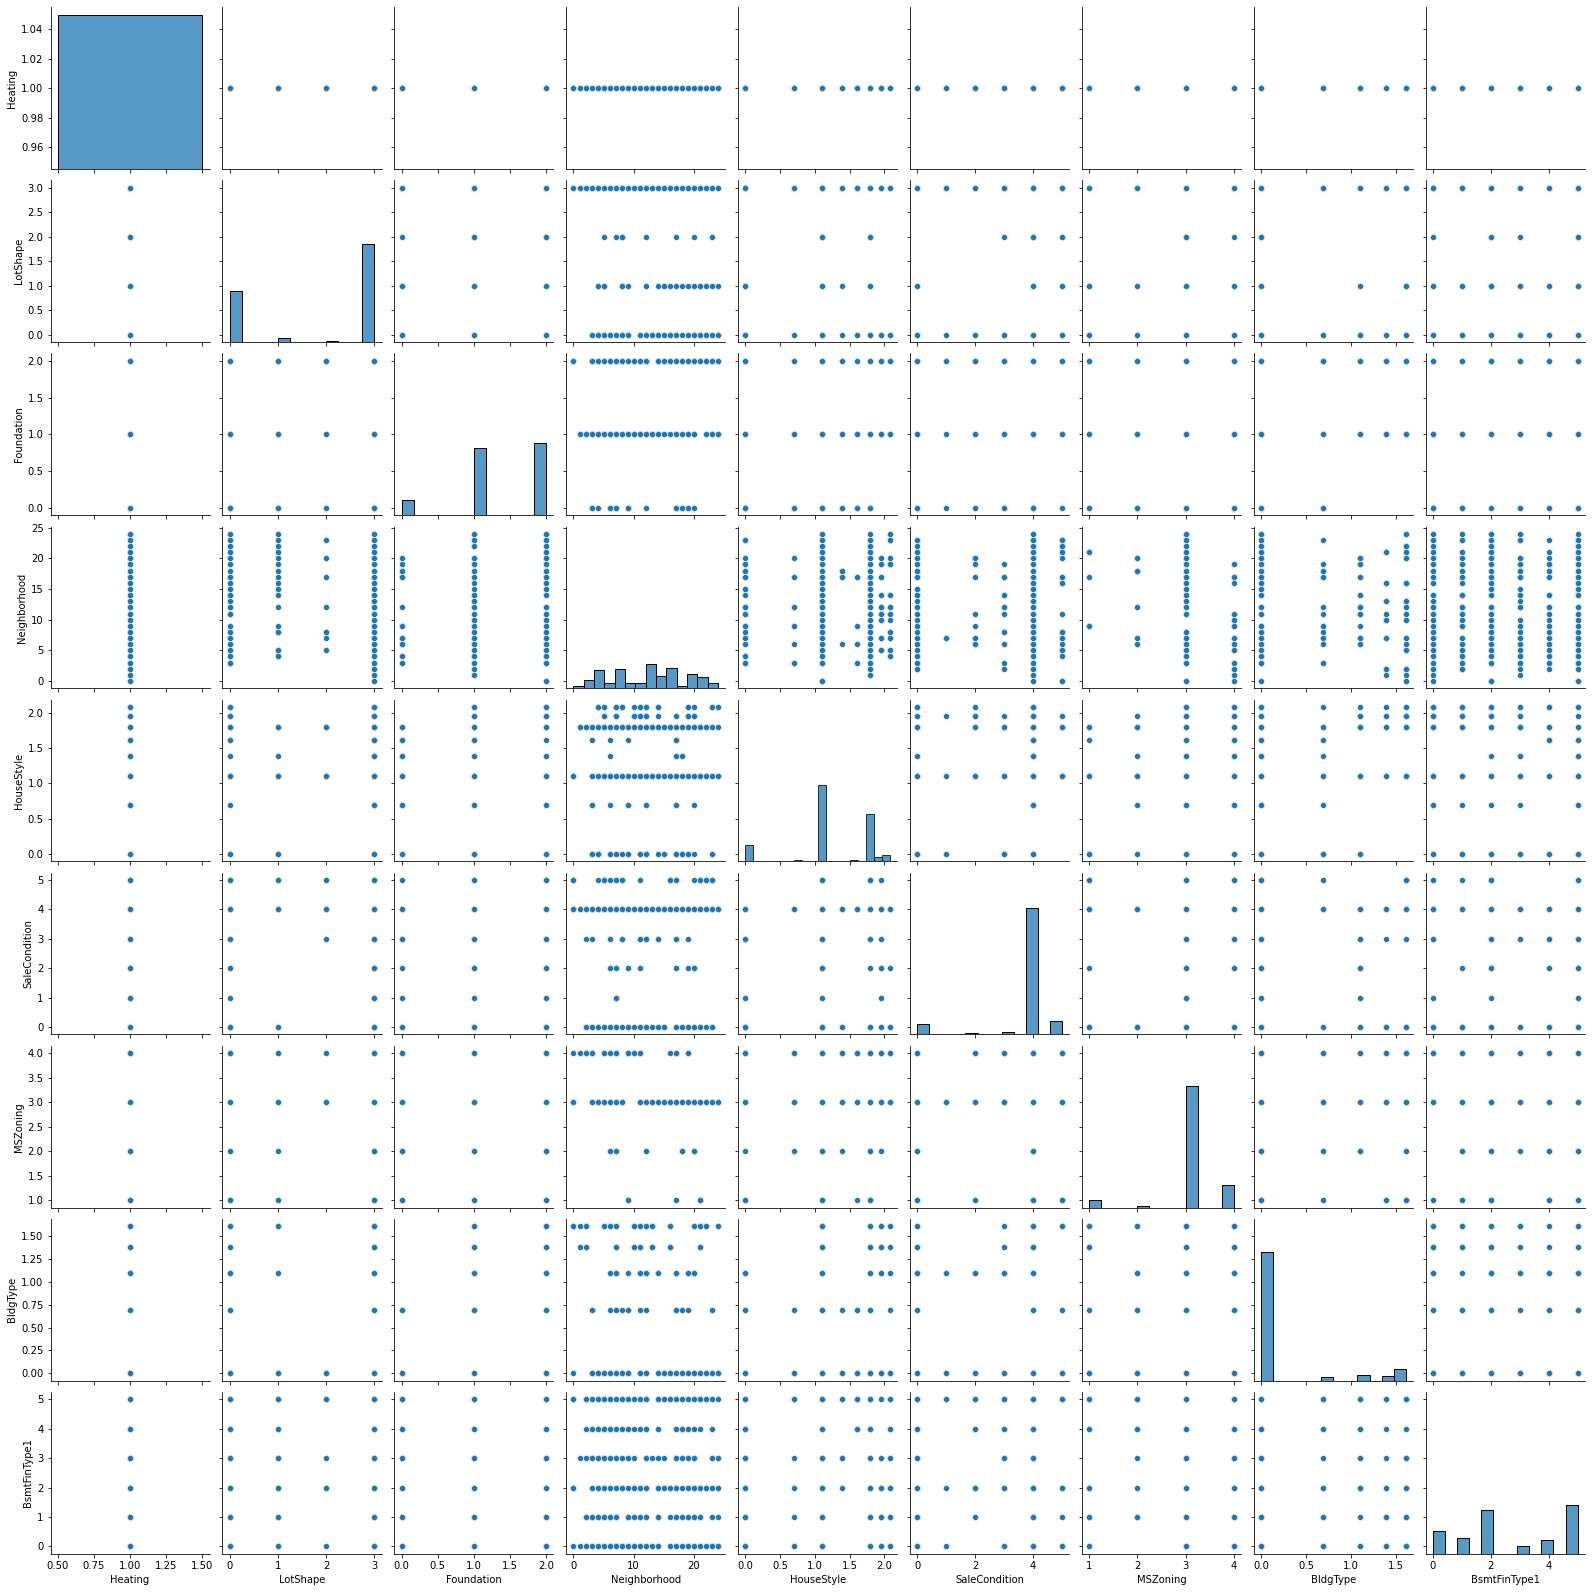

In [66]:
# Plot a pair plot for categorical data
selected_cats = x_train[['Heating', 'LotShape', 'Foundation', 'Neighborhood', 'HouseStyle', 'SaleCondition', 
                        'MSZoning', 'BldgType', 'BsmtFinType1']]
sns.pairplot(selected_cats)

We can see that correlation amongst selected categorical features isnt strong and that is also a diserable result since the indenting for this data is modelling.

***Compile the selected numerical and categorical features***

In [67]:
# Compile separately the selected data for train and test sets
selected_train = pd.concat([num_vals, selected_cats], axis = 1)
selected_test = pd.concat([x_test[num_vals.columns], x_test[selected_cats.columns]], axis = 1)

In [68]:
# Check the shape of the selected train data
x_train = selected_train
x_train.shape

(1460, 14)

In [69]:
# Check the shape of the target variable
y_train = Y
y_train.shape

(1460, 1)

In [70]:
# Check the shape of the selected test data
x_test = selected_test
x_test.shape

(1459, 14)

<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:DodgerBlue; font-family:Times;color:#FFFFFF;font-size:150%;text-align:center;border-radius:1px 1px;">DATA TRAINING</p>

***Generate a machine learning model***

In [71]:
scorer = make_scorer(mean_squared_error, greater_is_better = False)
def rmse_CV_train(model):
    kf = KFold(5, shuffle = True, random_state = 4).get_n_splits(x_train.values)
    rmse = np.sqrt(-cross_val_score(model, selected_train, Y, scoring = "neg_mean_squared_error", cv = kf))
    return(rmse)
def rmse_CV_test(model):
    kf = KFold(5, shuffle = True, random_state = 4).get_n_splits(train_df.value)
    rmse = np.sqrt(-cross_val_score(model, x_test, y_test, scoring = "neg_mean_squared_error", cv = kf))
    return (rmse)

In [72]:
import xgboost as XGB
the_model = XGB.XGBRegressor(colsample_bytree = 0.4603, gamma = 0.0468, learning_rate = 0.05, max_depth = 3,
                            min_child_weight = 1.7817, n_estimators = 2200, reg_alpha = 0.4640, reg_lambda = 0.8571,
                            subsample = 0.5213, random_state = 7, nthread = -1)
the_model.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.4603,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0.0468, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=3, max_leaves=0,
             min_child_weight=1.7817, missing=nan, monotone_constraints='()',
             n_estimators=2200, n_jobs=-1, nthread=-1, num_parallel_tree=1,
             predictor='auto', random_state=7, reg_alpha=0.464, ...)

<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:DodgerBlue; font-family:Times;color:#FFFFFF;font-size:150%;text-align:center;border-radius:1px 1px;">DATA PREDICTIONS</p>

In [73]:
y_pred = np.floor(np.expm1(the_model.predict(x_test)))
y_pred

array([135822., 189477., 210506., ..., 158673., 169091., 188159.],
      dtype=float32)

<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:DodgerBlue; font-family:Times;color:#FFFFFF;font-size:150%;text-align:center;border-radius:1px 1px;">RESULTS SUBMISSION</p>

In [74]:
submission_df = pd.DataFrame()
submission_df['Id'] = test_df['Id']
submission_df['SalePrice'] = y_pred
submission_df.to_csv('submission_data.csv', index=False)